In [30]:
import pandas as pd
import torch
import numpy as np


In [860]:
#This method is cleaning the Boston property data

boston_data = pd.read_csv('/Users/kellyduncan/Downloads/fy19fullpropassess.csv', dtype={'ZIPCODE': 'str'})
boston_neighborhoods = pd.read_csv('/Users/kellyduncan/Downloads/boston_residential_property.csv')

#print(boston_data.head(10))
#boston_neighborhoods.head(10)

boston_final_draft = pd.concat([boston_data, boston_neighborhoods.add_suffix('_0')], join='inner', axis=1)
#print(boston_final_draft.columns)

boston_final = boston_final_draft[['neighborhood_0', 'full_address_0', 'LAND_SF','YR_BUILT','YR_REMOD', 'AV_LAND',\
                                  'AV_BLDG','AV_TOTAL', 'GROSS_TAX','LAND_SF','GROSS_AREA','LIVING_AREA','S_EXT_CND',\
                                  'U_INT_CND','LU','R_AC','U_AC','R_HEAT_TYP','U_HEAT_TYP']]
boston_final.head(10)

boston_final = boston_final.assign(AC=np.where(boston_final.U_AC.isnull(), boston_final.R_AC, boston_final.U_AC))
conditions = [
    (boston_final['AC'] == 'C') | (boston_final['AC'] == 'D'),
    (boston_final['AC'] == 'N')]
choices = ['Y','N']
boston_final['AC_final'] = np.select(conditions, choices, default=np.nan)
boston_final = boston_final.drop(columns=['U_AC','R_AC','AC'])
boston_final= boston_final.assign(HEAT_TYP=np.where(boston_final.U_HEAT_TYP.isnull(), boston_final.R_HEAT_TYP, boston_final.U_HEAT_TYP))
boston_final = boston_final.drop(columns=['U_HEAT_TYP','R_HEAT_TYP'])
boston_final['Tax_Exempt'] = np.where(boston_final['LU'].isin(['E','EA']),'True','False')
boston_final = boston_final.drop(columns=['LU'])
boston_final['PPSQFT'] = boston_final.AV_TOTAL/(boston_final.GROSS_AREA+1)
boston_final = boston_final.rename(columns={'neighborhood_0':'neighborhood', 'full_address_0':'full_address'})
boston_final.head(40)
boston_final.to_csv('/Users/kellyduncan/Downloads/boston_property_values.csv')

/Users/kellyduncan/python/ENV/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['PID', 'CM_ID', 'GIS_ID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF',
       'UNIT_NUM', 'ZIPCODE', 'PTYPE', 'LU', 'OWN_OCC', 'OWNER',
       'MAIL_ADDRESSEE', 'MAIL_ADDRESS', 'MAIL CS', 'MAIL_ZIPCODE', 'AV_LAND',
       'AV_BLDG', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF', 'YR_BUILT', 'YR_REMOD',
       'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS', 'STRUCTURE_CLASS',
       'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN', 'R_TOTAL_RMS', 'R_BDRMS',
       'R_FULL_BTH', 'R_HALF_BTH', 'R_BTH_STYLE', 'R_BTH_STYLE2',
       'R_BTH_STYLE3', 'R_KITCH', 'R_KITCH_STYLE', 'R_KITCH_STYLE2',
       'R_KITCH_STYLE3', 'R_HEAT_TYP', 'R_AC', 'R_FPLACE', 'R_EXT_CND',
       'R_OVRALL_CND', 'R_INT_CND', 'R_INT_FIN', 'R_VIEW', 'S_NUM_BLDG',
       'S_BLDG_STYL', 'S_UNIT_RES', 'S_UNIT_COM', 'S_UNIT_RC', 'S_EXT_FIN',
       'S_EXT_CND', 'U_BASE_FLOOR', 'U_NUM_PARK', 'U_CORNER', 'U_ORIENT',
       'U_TOT_RMS', 'U_BDRMS', 'U_FULL_BTH', 'U_HALF_BTH', 'U_BTH_STYLE',
       'U_BTH_STYLE2', 'U_BTH_STYLE3', 'U_KITCH_TYPE', 'U_KIT

In [630]:
#This method is playing around with the liquor license data
boston_licenses = pandas.read_csv('/Users/kellyduncan/Downloads/boston_licenses_final.txt')
boston_licenses.head(40)
#boston_licenses[~boston_licenses.LICCAT.eq('CLBMWR')].groupby(['LICCAT','neighborhood'])['BUSINESSNAME'].count().reset_index().head(40)
#boston_licenses[~boston_licenses.LICCAT.eq('CLBMWR')].groupby(['LICCAT','LICCATDESC'])['BUSINESSNAME'].count().reset_index().head(40)


,BUSINESSNAME,ISSDTTM,EXPDTTM,LICCAT,LICCATDESC,CAPACITY,STNO,Address,Location,Lat,Long,geometry,neighborhood
0,"SPEAK EASY CONCEPTS, LLC",11/27/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPAL,GOP All Alc.,520,25,Boylston PL,"(42.351899, -71.065829)",42.316248,-71.102627,POINT (-71.10262693843245 42.31624823260227),Jamaica Plain
1,"FROST GROUP, LLC",11/20/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPAL,GOP All Alc.,240,200,State ST,"(42.36003, -71.05319)",42.359488,-71.053154,POINT (-71.05315400000001 42.359488),Downtown
2,"EMANUEL ENTERPRISES, LLC",10/01/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPMWL,GOP Malt Wine Liq.,49,71,Meridian St,"(42.37195, -71.0388)",42.371963,-71.038805,POINT (-71.03880522704439 42.37196255),East Boston
3,25 CHARLES ON THE HILL LLC,11/20/2013 12:00:00 AM,12/31/2016 12:00:00 AM,INNAL,Inn. All Alc.,0,19,Charles ST,"(42.356811, -71.069554)",42.356813,-71.069562,POINT (-71.06956223915162 42.35681295),Beacon Hill
4,"SUYA JOINT, LLC",09/18/2015 12:00:00 AM,12/31/2016 12:00:00 AM,CV7ALN,CV7ALN - Neighborhood Restricted,84,185,Dudley ST,"(42.32832, -71.08196)",42.328465,-71.082149,POINT (-71.0821485 42.3284645),Roxbury
5,"GOURMET CHINA, INC.",11/25/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7MW,CV7 Malt Wine,48,23,Tyler St,"(42.350769, -71.060935)",42.246234,-71.124994,POINT (-71.12499364722144 42.24623370000001),Hyde Park
6,THE TWELVE BENS,11/29/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7AL,CV7 All Alc.,285,315,Adams ST,"(42.298605, -71.057578)",42.298611,-71.057467,POINT (-71.057467 42.298611),Dorchester
7,"HLC GROUP ENTERPRISES, LLC",11/15/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7AL,CV7 All Alc.,148,131,Dartmouth St,"(42.34682, -71.07543)",42.346710,-71.075396,POINT (-71.0753958 42.3467104),South End
8,"THE NEXT PLACE, LLC",11/29/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7AL,CV7 All Alc.,440,262,Friend ST,"(42.36457, -71.06144)",42.364652,-71.061379,POINT (-71.06137916326531 42.36465214285714),West End
9,"MASSACHUSETTS SPORTSERVICE, INC.",11/27/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7AL,CV7 All Alc.,19058,100,Legends WY,"(42.36629, -71.0622)",42.366290,-71.062226,POINT (-71.06222575726521 42.36628985),West End


In [631]:
#This method is for cleaning the liquor license data, and breaking down the licenses into categories
boston_licenses = pandas.read_csv('/Users/kellyduncan/Downloads/boston_licenses_final.txt')
boston_licenses.head(40)
boston_licenses[~boston_licenses.LICCAT.eq('CLBMWR')].groupby(['LICCAT','neighborhood'])['BUSINESSNAME'].count().reset_index().head(40)
boston_licenses[~boston_licenses.LICCAT.eq('CLBMWR')].groupby(['LICCAT','LICCATDESC'])['BUSINESSNAME'].count().reset_index().head(40)


boston_licenses[boston_licenses.LICCAT.eq('TAVAL')  ] # we are going to take these out as there are only 2 places in different neighborhoods
a = boston_licenses[~boston_licenses.LICCAT.eq('TAVAL')].LICCATDESC.str.split(expand = True,pat=' -')
a= a.assign(new_c = np.where(a[1].isnull(), a[0], a[1]))
#print(a)
new_a = a[0].str.rsplit(expand=True)
#new_a = new_a.rename(index={'Restrict.':np.nan},inplace=True)
a['ntype'] = new_a[[1,2,3,4]].fillna('').apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
#print('A: ', a.ntype[4])
a = a.assign(final_type = np.where(a.ntype.eq('   '),a.new_c.str.strip(), a.ntype.str.strip()))

boston_licenses['ltype'] = a.final_type
#print(boston_licenses.index)
#boston_licenses = boston_licenses.replace('All Alc. Restrict.','All Alc.')

boston_licenses = boston_licenses.replace('Malt & Wine', 'Malt Wine')
boston_licenses = boston_licenses.replace('Prem All Alcohol Rest', 'All Alc. Restrict.')
boston_licenses.head(10)
#print(boston_licenses.head(10))
boston_licenses.groupby(['ltype','neighborhood'])['BUSINESSNAME'].count().reset_index()
#boston_licenses[boston_licenses.ltype == 'Prem All Alcohol Rest']

full_liquor = pd.read_csv('/Users/kellyduncan/Downloads/liquor-licenses.csv')
full_liquor.groupby('LICCAT')['BUSINESSNAME'].count().reset_index()

,LICCAT,BUSINESSNAME
0,CLBAL,38
1,CLBALA,1
2,CLBALV,12
3,CLBMW,2
4,CLBMWR,1
5,CV7AL,547
6,CV7ALA,34
7,CV7ALN,20
8,CV7ALR,20
9,CV7MW,160


In [632]:
#This is creating Addresses to use TIGER DATA (Census Data) to get LatLong (bash program to pulld data from internet)
full_liquor = pd.read_csv('/Users/kellyduncan/Downloads/liquor-licenses.csv',dtype= {'ZIP' : 'str'})
full_liquor.groupby('LICCAT')['BUSINESSNAME'].count().reset_index()
clean_liquor = full_liquor[~full_liquor.LICCAT.isin(['FDPL','CLBAL','CLBALV','CLBALA','CLBMW',
                                                     'CLBMWR','TAVAL'])]
clean_liquor = clean_liquor[~clean_liquor.LICCAT.isin(['CV7ALA','CV7MWA','GOPALA'])]
clean_liquor.head(30)
clean_liquor['Full_Address'] = clean_liquor.STNO.fillna(1).astype(int).astype(str).fillna('').str.cat(clean_liquor.Address, sep =' ', na_rep ='')
clean_liquor
#clean_liquor.groupby(['LICCAT','LICCATDESC'])['BUSINESSNAME'].count().reset_index()
clean_liquor_long_lat = clean_liquor[['Full_Address', 'CITY','STATE','ZIP']]
clean_liquor_long_lat['ZIP']= clean_liquor_long_lat['ZIP'].apply(lambda x: '{0:0>5}'.format(x))
clean_liquor_long_lat
clean_liquor_long_lat.to_csv('/Users/kellyduncan/Downloads/liquor_for_long_lat.csv')

/Users/kellyduncan/python/ENV/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


    LICENSENO                      BUSINESSNAME DBANAME  \
0   LB-101572        NEW ENGLAND AQUARIUM CORP.     NaN   
1   LB-101576          SPEAK EASY CONCEPTS, LLC     NaN   
2   LB-101577                  FROST GROUP, LLC     NaN   
3   LB-101611          EMANUEL ENTERPRISES, LLC     NaN   
4   LB-101659        25 CHARLES ON THE HILL LLC     NaN   
7   LB-126366  ZAZ RESTAURANT & CATERING, CORP.     NaN   
9   LB-144135       HOMESTEAD BAKERY & CAFE LLC     NaN   
10  LB-144994                   SUYA JOINT, LLC     NaN   
12  LB-148028                               NaN     NaN   
43   LB-99604               GOURMET CHINA, INC.     NaN   

                                             COMMENTS  \
0   Outdoor Patio opening hours are 12:00 P.M. to ...   
1   PATIO HOURS: 12 NOON - 2:00 A.M. PATIO CONDITI...   
2                                                NONE   
3                                                NONE   
4   1.) ALCOHOL SERVICE ONLY WITH FOOD IN DINING A...   
7       

,key_0,LICENSENO,BUSINESSNAME,DBANAME,COMMENTS,LOCATIONCOMMENTS,ISSDTTM,EXPDTTM,LICSTATUS,LICCAT,...,STATE,ZIP,Location,Full_Address,0,5,Final_Lat,Final_Long,geometry,neighborhood
0,0,LB-101572,NEW ENGLAND AQUARIUM CORP.,NaN,Outdoor Patio opening hours are 12:00 P.M. to ...,IN WHOLE OF MAIN EXHIBIT BUILDING IN WHOLE OF...,11/27/2013 12:00:00 AM,12/31/2016 12:00:00 AM,Active,GOPAL,...,MA,2110,"(0.0, 0.0)",1 Central Wharf,0,"-71.0508,42.358902",42.358902,-71.0508,POINT (-71.05080 42.35890),Downtown
1,1,LB-101576,"SPEAK EASY CONCEPTS, LLC",NaN,PATIO HOURS: 12 NOON - 2:00 A.M. PATIO CONDITI...,ENTRANCE AND EXIT AT 120-124 BOYLSTON PLACE; I...,11/27/2013 12:00:00 AM,12/31/2016 12:00:00 AM,Active,GOPAL,...,MA,2116,"(42.351899, -71.065829)",25 Boylston PL,1,"-71.06593,42.35227",42.3519,-71.0658,POINT (-71.06583 42.35190),Downtown
2,2,LB-101577,"FROST GROUP, LLC",NaN,NONE,In two rooms on third level with main entrance...,11/20/2013 12:00:00 AM,12/31/2016 12:00:00 AM,Active,GOPAL,...,MA,2109,"(42.36003, -71.05319)",200 State ST,2,"-71.05322,42.359398",42.36,-71.0532,POINT (-71.05319 42.36003),Downtown
3,3,LB-101611,"EMANUEL ENTERPRISES, LLC",NaN,NONE,Entrance on first floor; one room on first fl...,10/01/2013 12:00:00 AM,12/31/2016 12:00:00 AM,Active,GOPMWL,...,MA,2128,"(42.37195, -71.0388)",71 Meridian St,3,"-71.03901,42.371914",42.3719,-71.0388,POINT (-71.03880 42.37195),East Boston
4,4,LB-101659,25 CHARLES ON THE HILL LLC,NaN,1.) ALCOHOL SERVICE ONLY WITH FOOD IN DINING A...,BOUTIQUE HOTEL INCLUDING THIRTEEN (13) GUEST R...,11/20/2013 12:00:00 AM,12/31/2016 12:00:00 AM,Active,INNAL,...,MA,2114,"(42.356811, -71.069554)",19 Charles ST,4,"-71.069664,42.356735",42.3568,-71.0696,POINT (-71.06955 42.35681),Beacon Hill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,143,LB-99070,"MARKETPLACE SALOON, INC.",AMES PLOW TAVERN,NONE,TWO EXITS AND ENTRANCE FROM NORTH AND SOUTH MA...,11/26/2013 12:00:00 AM,12/31/2016 12:00:00 AM,Active,CV7AL,...,MA,2109,"(42.360036, -71.056253)",294 Faneuil Hall Marketplace,143,NaN,42.36,-71.0563,POINT (-71.05625 42.36004),Downtown
96,144,LB-99296,AMRHEIN'S INCORPORATED,AMRHEIN'S,PATIO CONDITIONS: 1.) ALCOHOLIC BEVERAGES TO B...,80 84 WEST BROADWAY; 61 A STREET EMERGENCY EXI...,11/20/2013 12:00:00 AM,12/31/2016 12:00:00 AM,Active,CV7AL,...,MA,2127,"(0.0, 0.0)",80 W Broadway ST,144,NaN,NaN,NaN,POINT (nan nan),None
97,145,LB-99000,ANCHOVIES ACQUISITION LIMITED PARTNERSHIP,ANCHOVIES,NONE,Rear entrance to basement from yard; in one ro...,11/13/2013 12:00:00 AM,12/31/2016 12:00:00 AM,Active,CV7AL,...,MA,2116,"(42.344027, -71.077869)",433 Columbus AV,145,"-71.077705,42.34392",42.344,-71.0779,POINT (-71.07787 42.34403),South End
98,146,LB-99808,"ANGELA'S CAFE GROUP, INC.",ANGELA'S CAFÉ,A.) ALCOHOL WITH FOOD ONLY B.) NO BAR,IN ONE ROOM ON THE FIRST FLOOR; KITCHEN IN THE...,11/26/2013 12:00:00 AM,12/31/2016 12:00:00 AM,Active,CV7MWL,...,MA,2128,"(42.37853, -71.035)",131 Lexington ST,146,"-71.035095,42.378616",42.3785,-71.035,POINT (-71.03500 42.37853),East Boston


<Figure size 432x288 with 0 Axes>

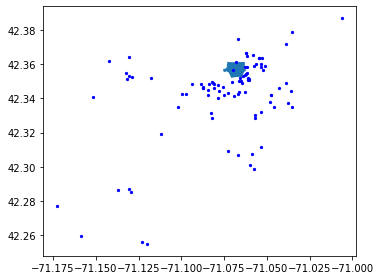

In [633]:
#This method connects the liquor licenses to a specific neighborhood
final_liquor = pd.read_csv('/Users/kellyduncan/Downloads/liquor_for_long_lat_final.csv', header=None)
print(clean_liquor.head(10))
print(len(final_liquor.index))
print(final_liquor.head(10))

final_liquor_o= clean_liquor.merge(final_liquor[[0,5]],  how='outer', left_index=True, right_on=final_liquor[0])
final_liquor_o
new = final_liquor_o[5].str.split(",", n = 1, expand = True)
final_liquor_o['Long']=new[0]
final_liquor_o['Lat'] = new[1]
new_b = final_liquor_o['Location'].str.split(",",n=1,expand=True)
print(new_b)
final_liquor_o['Lat1']=new_b[0].str.strip('(').astype('float')
final_liquor_o['Long1'] = new_b[1].str.strip(')').astype('float')

final_liquor_o = final_liquor_o.assign(Final_Lat=np.where(final_liquor_o.Lat1==0,final_liquor_o.Lat,final_liquor_o.Lat1))
final_liquor_o = final_liquor_o.assign(Final_Long=np.where(final_liquor_o.Long1==0,final_liquor_o.Long,final_liquor_o.Long1))
final_liquor_o = final_liquor_o.drop(columns=['Lat1','Long1','Lat','Long'])
print(final_liquor_o)


import shapely
import geopandas as gpd
from matplotlib import pyplot as plt
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'



plt.clf()



#gdf = geopandas.read_file('/Users/kellyduncan/Downloads/Boston_Neighborhoods-shp/Boston_Neighborhoods.shp') 
gdf = gpd.read_file('/Users/kellyduncan/Downloads/Boston_Neighborhoods.kml', driver='KML')

print(gdf.head(10))#print(gdf[gdf.Name.eq("Beacon Hill")])

gdf2 = gpd.GeoDataFrame(final_liquor_o, geometry=geopandas.points_from_xy(final_liquor_o.Final_Long, final_liquor_o.Final_Lat))
#print(gdf2.head(10))
#gdf2.plot()
#plt.show()
    

point = (-71.07136,42.35576)
point2 = (42.35576,-71.07136)

fig, ax = plt.subplots()

beacon_hill = gdf[gdf.Name.eq("Beacon Hill")]
print(beacon_hill)
beacon_hill.plot(ax=ax)

gdf2.head(100).plot(ax=ax, color='blue', markersize=5)
plt.tight_layout()

print(beacon_hill['geometry'])
new_point = shapely.geometry.Point(point)
beacon_hill.geometry.contains(new_point)
#new_point.within(beacon_hill['geometry'])
#shapely.geometry.shape(beacon_hill)
#print(gdf['geometry'])

gdf2['neighborhood'] = None
for index, row in gdf2.iterrows():
    for name in gdf['Name']:
        if gdf[gdf.Name.eq(name)].geometry.contains(row.geometry).bool():
            gdf2.at[index,'neighborhood'] = name
            break
    #if index > 100:
    #    break
gdf2.head(100)

In [634]:
#As there are not many liquor licenses without a neighborhood label, and there just aren't that many liquor licenses, I filled in the rest by hand
# gdf2[gdf2.neighborhood.isna()]

#print(gdf['Name'])
gdf_l = pd.DataFrame(gdf2)

gdf_l.loc[8,'neighborhood'] = 'Harbor Islands'
gdf_l.loc[1011,'neighborhood']='Downtown' #Perm Closed
gdf_l.loc[1013,'neighborhood']='Downtown' #Fanuiel Hall
gdf_l.loc[1000,'neighborhood'] = 'South Boston'

gdf_l.loc[981, 'neighborhood'] = 'Downtown'

gdf_l.loc[944,'neighborhood'] = 'Downtown'

gdf_l.loc[24,'neighborhood'] = 'South Boston'
gdf_l.loc[934, 'neighborhood'] = 'Dorchester' #closed bar
gdf_l.loc[920, 'neighborhood'] = 'Downtown' #closed
gdf_l.loc[915, 'neighborhood'] = 'Downtown'
gdf_l.loc[889, 'neighborhood'] = 'Brighton'
gdf_l.loc[830, 'neighborhood'] = 'Mission Hill'
gdf_l.loc[822, 'neighborhood'] = 'Downtown'
gdf_l.loc[89, 'neighborhood'] = 'South End'
gdf_l.loc[96, 'neighborhood'] = 'South Boston'
gdf_l.loc[101, 'neighborhood'] = 'Downtown'
gdf_l.loc[122, 'neighborhood'] = 'South Boston Waterfront'
gdf_l.loc[152, 'neighborhood'] = 'West Roxbury'
gdf_l.loc[169, 'neighborhood'] = 'Jamaica Plain'
gdf_l.loc[180, 'neighborhood'] = 'Downtown'
gdf_l.loc[185, 'neighborhood'] = 'Downtown'
gdf_l.loc[196, 'neighborhood'] = 'Jamaica Plain'
gdf_l.loc[239, 'neighborhood'] = 'Downtown'
gdf_l.loc[256, 'neighborhood'] = 'Back Bay'
gdf_l.loc[322, 'neighborhood'] = 'Downtown' #closed
gdf_l.loc[324, 'neighborhood'] = 'South End'
gdf_l.loc[340, 'neighborhood'] = 'South Boston Waterfront'
gdf_l.loc[345, 'neighborhood'] = 'Dorchester'
gdf_l.loc[352, 'neighborhood'] = 'Downtown'
gdf_l.loc[400, 'neighborhood'] = 'West End'
gdf_l.loc[818, 'neighborhood'] = 'Downtown'
gdf_l.loc[789, 'neighborhood'] = 'South Boston Waterfront'
gdf_l.loc[748, 'neighborhood'] = 'Jamaica Plain'
gdf_l.loc[742, 'neighborhood'] = 'South Boston Waterfront'
gdf_l.loc[738, 'neighborhood'] = 'Roslindale'
gdf_l.loc[728, 'neighborhood'] = 'Dorchester'
gdf_l.loc[679, 'neighborhood'] = 'South Boston Waterfront'
gdf_l.loc[659, 'neighborhood'] = 'West Roxbury'
gdf_l.loc[642, 'neighborhood'] = 'South End'
gdf_l.loc[628, 'neighborhood'] = 'North End'
gdf_l.loc[616, 'neighborhood'] = 'Downtown'
gdf_l.loc[603, 'neighborhood'] = 'Downtown'
gdf_l.loc[601, 'neighborhood'] = 'South Boston Waterfront'#closed
gdf_l.loc[403, 'neighborhood'] = 'Dorchester'
gdf_l.loc[455, 'neighborhood'] = 'Downtown'
gdf_l.loc[478, 'neighborhood'] = 'South Boston Waterfront'
gdf_l.loc[550, 'neighborhood'] = 'Downtown'
gdf_l.loc[589, 'neighborhood'] = 'Downtown'
gdf_l.loc[588, 'neighborhood'] = 'Downtown'
gdf_l.loc[572, 'neighborhood'] = 'North End'
gdf_l.loc[552, 'neighborhood'] = 'Downtown'



#gdf2[gdf2.neighborhood.isna()]

0                  Roslindale
1               Jamaica Plain
2                Mission Hill
3                    Longwood
4                 Bay Village
5            Leather District
6                   Chinatown
7                   North End
8                     Roxbury
9                   South End
10                   Back Bay
11                East Boston
12                Charlestown
13                   West End
14                Beacon Hill
15                   Downtown
16                     Fenway
17                   Brighton
18               West Roxbury
19                  Hyde Park
20                   Mattapan
21                 Dorchester
22    South Boston Waterfront
23               South Boston
24                    Allston
25             Harbor Islands
Name: Name, dtype: object


,key_0,LICENSENO,BUSINESSNAME,DBANAME,COMMENTS,LOCATIONCOMMENTS,ISSDTTM,EXPDTTM,LICSTATUS,LICCAT,...,STATE,ZIP,Location,Full_Address,0,5,Final_Lat,Final_Long,geometry,neighborhood


In [636]:
#More clean and aggregating the liquor license dat
boston_licenses = gdf_l[['BUSINESSNAME','ISSDTTM','EXPDTTM','LICCAT','LICCATDESC','CAPACITY','STNO','Address','Location',5,'Final_Lat','Final_Long','geometry','neighborhood']]
boston_licenses.head(10)
boston_licenses.groupby(['LICCAT','LICCATDESC'])['BUSINESSNAME'].count().reset_index()
a = boston_licenses.LICCATDESC.str.split(expand = True,pat=' -')
a.head(10)
a= a.assign(new_c = np.where(a[1].isnull(), a[0], a[1].str.cat(a[0], sep =" - ") ))
a.head(30)
new_a = a[0].str.rsplit(expand=True)
new_a.head(30)
#new_a = new_a.rename(index={'Restrict.':np.nan},inplace=True)
#new_a.head(30)
a['ntype'] = new_a[[1,2,3,4]].fillna('').apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
#print('A: ', a.ntype[4])
a.head(30)
a = a.assign(final_type = np.where(a.ntype.eq('   '),a.new_c.str.strip(), a.ntype.str.strip()))
a.head(30)

boston_licenses['ltype'] = a.final_type
#print(boston_licenses.index)
boston_licenses = boston_licenses.replace('All Alc. Restrict.','All Alc.')

boston_licenses = boston_licenses.replace('Malt & Wine', 'Malt Wine')
boston_licenses = boston_licenses.replace('Prem All Alcohol Rest', 'All Alc. Restrict.')
boston_licenses.head(10)
#print(boston_licenses.head(10))
boston_licenses.groupby(['ltype'])['BUSINESSNAME'].count().reset_index()
#boston_licenses[boston_licenses.ltype == 'Prem All Alcohol Rest']


boston_licenses.to_csv('/Users/kellyduncan/Downloads/liquor_licenses_full.csv')
#full_liquor = pd.read_csv('/Users/kellyduncan/Downloads/liquor-licenses.csv')
#full_liquor.groupby('LICCAT')['BUSINESSNAME'].count().reset_index()

A:  All Alc.  
                       BUSINESSNAME                 ISSDTTM  \
0        NEW ENGLAND AQUARIUM CORP.  11/27/2013 12:00:00 AM   
1          SPEAK EASY CONCEPTS, LLC  11/27/2013 12:00:00 AM   
2                  FROST GROUP, LLC  11/20/2013 12:00:00 AM   
3          EMANUEL ENTERPRISES, LLC  10/01/2013 12:00:00 AM   
4        25 CHARLES ON THE HILL LLC  11/20/2013 12:00:00 AM   
5  ZAZ RESTAURANT & CATERING, CORP.  05/19/2015 12:00:00 AM   
6       HOMESTEAD BAKERY & CAFE LLC  03/02/2016 12:00:00 AM   
7                   SUYA JOINT, LLC  09/18/2015 12:00:00 AM   
8                               NaN  10/07/2015 12:00:00 AM   
9               GOURMET CHINA, INC.  11/25/2013 12:00:00 AM   

                  EXPDTTM  LICCAT                        LICCATDESC  CAPACITY  \
0  12/31/2016 12:00:00 AM   GOPAL                      GOP All Alc.      2400   
1  12/31/2016 12:00:00 AM   GOPAL                      GOP All Alc.       520   
2  12/31/2016 12:00:00 AM   GOPAL               

/Users/kellyduncan/python/ENV/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Training = 30% of the instances for both sets [6,3,3,0,0,1] #6 output nodes (one type or more types at a time) Overall\

If we do all we take we take out the Neighborhood.
batch in odds only 0->1 in .1 % houses Tax Exempt or AC (average over batch, )

Test for accuracy

Tensorflow/Keras
Backprop 

30% of each data in each neighborhood
Batch the training data for property values, dynamic
First run is going to be based on all non-neighboorhod licenses

[variables input that are above -> number of licenses out, one node output]
Test 10% of each data
See accuracy, like in homework (stdev away (mean squared error))

Run CNN
Same information

Try for extra output nodes.



In [939]:
#First import of tensorflow, after reading documents, figure out there are things that I need to switch to categorical variables to make this work
#Also dealing with NANs to make tensorflow work
#This is more pre-processing
import tensorflow as tf
import pandas as pd

boston_final = pd.read_csv('/Users/kellyduncan/Downloads/boston_property_values.csv')
boston_licenses = pd.read_csv('/Users/kellyduncan/Downloads/liquor_licenses_full.csv')

batch_number = 10
#Initial Preprocessing to deal with cateogrical data

boston_final.head(10)
boston_final['HEAT_TYP'] = pd.Categorical(boston_final['HEAT_TYP'])
boston_final['HEAT_TYP'] = boston_final.HEAT_TYP.cat.codes
boston_final.head(10)

boston_final['U_INT_CND'] = pd.Categorical(boston_final['U_INT_CND'])
boston_final['U_INT_CND'] = boston_final.U_INT_CND.cat.codes

boston_final.head(10)


boston_final['AC_final'] = pd.Categorical(boston_final['AC_final'])
boston_final['AC_final'] = boston_final.AC_final.cat.codes
boston_final.head(10)

boston_final['Tax_Exempt'] = pd.Categorical(boston_final['Tax_Exempt'])
boston_final['Tax_Exempt'] = boston_final.Tax_Exempt.cat.codes
boston_final.head(10)

boston_final['YR_REMOD'].fillna(0, inplace=True)

#creating batches to make each neighborhood average amoung 10 values
boston_final = boston_final[boston_final.S_EXT_CND.isna()]
boston_final = boston_final[boston_final.full_address!='32 DERNE ST ']
boston_final = boston_final[boston_final.full_address !='10 BOWDOIN ST ']
boston_final = boston_final[~boston_final.full_address.str.contains("100 HUNTINGTON AV RETAIL ")]
boston_final = boston_final[~boston_final.full_address.str.contains("100 HUNTINGTON AV OFFICE ")]
boston_final = boston_final[boston_final.full_address != "244 MARLBOROUGH ST "]
boston_final = boston_final[~(boston_final.YR_BUILT.isna()) & ~(boston_final.GROSS_AREA.isna())]



boston_final =boston_final.drop(columns=['S_EXT_CND'])
boston_final[(boston_final.YR_BUILT.isna())]

boston_final_count = boston_final.groupby(['neighborhood'])['full_address'].count().reset_index().rename(columns={'full_address':'n_count'})
boston_final_count['Third_count']= (boston_final_count['n_count']/3).astype(int)
boston_final = boston_final.merge(boston_final_count[['n_count','Third_count']],  how='outer', left_on=boston_final['neighborhood'], right_on=boston_final_count['neighborhood'])
#print(boston_final[254:255])
boston_final[8500:8530]


,key_0,Unnamed: 0,neighborhood,full_address,LAND_SF,YR_BUILT,YR_REMOD,AV_LAND,AV_BLDG,AV_TOTAL,...,LAND_SF.1,GROSS_AREA,LIVING_AREA,U_INT_CND,AC_final,HEAT_TYP,Tax_Exempt,PPSQFT,n_count,Third_count
8500,Back Bay,49534,Back Bay,298 MARLBOROUGH ST 1,1228.0,1900.0,2000.0,0,955100,955100,...,1228.0,1228.0,1228.0,3,1,6,0,777.135883,7221.0,2407.0
8501,Back Bay,49535,Back Bay,298 MARLBOROUGH ST 2,445.0,1900.0,1985.0,0,421300,421300,...,445.0,445.0,445.0,0,0,6,0,944.618834,7221.0,2407.0
8502,Back Bay,49536,Back Bay,298 MARLBOROUGH ST 3,937.0,1900.0,1985.0,0,768600,768600,...,937.0,937.0,937.0,3,0,6,0,819.402985,7221.0,2407.0
8503,Back Bay,49537,Back Bay,298 MARLBOROUGH ST 4,1502.0,1900.0,1985.0,0,1290200,1290200,...,1502.0,1502.0,1502.0,3,0,6,0,858.416500,7221.0,2407.0
8504,Back Bay,49538,Back Bay,298 MARLBOROUGH ST 5,1200.0,1900.0,1985.0,0,858500,858500,...,1200.0,1200.0,1200.0,2,0,6,0,714.820983,7221.0,2407.0
8505,Back Bay,49539,Back Bay,298 MARLBOROUGH ST 6,874.0,1900.0,1985.0,0,805600,805600,...,874.0,874.0,874.0,0,0,6,0,920.685714,7221.0,2407.0
8506,Back Bay,49543,Back Bay,296 MARLBOROUGH ST,2688.0,1900.0,1999.0,1185100,1292900,2478000,...,2688.0,5934.0,4702.0,-1,-1,-1,0,417.523168,7221.0,2407.0
8507,Back Bay,49544,Back Bay,294 MARLBOROUGH ST,2688.0,1890.0,2014.0,1431000,4875000,6306000,...,2688.0,6012.0,5651.0,-1,1,6,0,1048.727757,7221.0,2407.0
8508,Back Bay,49545,Back Bay,292 MARLBOROUGH ST,2576.0,1890.0,2013.0,1389500,4448900,5838400,...,2576.0,5435.0,5088.0,-1,1,1,0,1074.025018,7221.0,2407.0
8509,Back Bay,49546,Back Bay,290 MARLBOROUGH ST,2016.0,1890.0,2013.0,1191200,3746800,4938000,...,2016.0,5104.0,4727.0,-1,1,1,0,967.286974,7221.0,2407.0


In [940]:
#This is batching our property data to deal with outliers, we batch by 10, as this takes forever to run,
#we didn't do any other batch levels.
#This also gets our training set of 30% of our property data

def get_rows(data_set, batch_number):
    return (data_set.iloc[pos:pos + batch_number] for pos in range(0, len(data_set)-1))

def data_subset(data_set, batch_number):
    #all data set finals should be mod 0 of batch number...
    columns_d = data_set.columns
    columns_data = ['neighborhood', 'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'AV_LAND', 'AV_BLDG',
       'AV_TOTAL', 'GROSS_TAX', 'LAND_SF.1', 'GROSS_AREA', 'LIVING_AREA',
       'U_INT_CND', 'AC_final', 'HEAT_TYP', 'Tax_Exempt', 'PPSQFT', 'n_count',
       'Third_count']
    new_data = pd.DataFrame(columns = columns_data)
   # print(new_data)
    test_data = pd.DataFrame(columns = columns_data)
    #print(test_data)
    for row in data_set['neighborhood'].unique():
        i = 0
        new_data_n = pd.DataFrame(columns = columns_d)
        test_data_n = pd.DataFrame(columns = columns_d)
        data_set_1 = data_set[data_set.neighborhood.eq(row)]
        for index1, row1 in data_set_1.iterrows():
            #print(i)
            #print(row1['Third_count'] - row1['Third_count']%batch_number , ', ',\
            #     (row1['Third_count'] - row1['Third_count']%batch_number + row1['n_count']/10) -\
            #            (row1['Third_count'] - row1['Third_count']%batch_number + row1['n_count'])/10%batch_number)
            if i < row1['Third_count'] - row1['Third_count']%batch_number:
                #print("here")
                #print(row1)
                new_data_n = new_data_n.append(row1, ignore_index = True)
                i+=1
            elif (i >= row1['Third_count'] - row1['Third_count']%batch_number) and \
                    (i < row1['Third_count'] - row1['Third_count']%batch_number + row1['n_count']/10 -\
                        (row1['Third_count'] - row1['Third_count']%batch_number + row1['n_count'])/10%batch_number):
                #print("here2")
                #print(row1)
                test_data_n = test_data_n.append(row1, ignore_index = True)
                i+=1
            else:
                break
        #print(new_data_n.dtypes)
        convert_dict = {'AV_LAND': int, 
                'AV_BLDG': int,
                'AV_TOTAL': int,
                'GROSS_TAX':int,
                'U_INT_CND':int, 
                'HEAT_TYP':int,
                'Tax_Exempt':int,
                'AC_final':int
               } 
        new_data_n = new_data_n.astype(convert_dict)
        test_data_n = test_data_n.astype(convert_dict)
        rows = get_rows(new_data_n,batch_number)
        rows_test = get_rows(test_data_n, batch_number)
        b = 0
        for row in rows:
            #print(row.groupby(['neighborhood']).mean().reset_index().shape)
            #print(new_data.shape)
            new_data_o = row.groupby(['neighborhood']).mean().reset_index()
            #print(new_data_o)
            #print(new_data_o.columns)
            if b%batch_number == 0:
                new_data = new_data.append(new_data_o)
            b+=1
        c=0
        for row in rows_test:
            test_data_o = row.groupby(['neighborhood']).mean().reset_index()
            #print(new_data_o.columns)
            if c%batch_number == 0:
                test_data = test_data.append(test_data_o)
            c+=1    
    #print(new_data.head(10))
    #print(new_data.groupby(['neighborhood'])['Third_count'].count())
    return new_data, test_data
    


 
batch_number = 10
#print(boston_final.dtypes)
 
data_subset, test_data_subset = data_subset(boston_final, batch_number)
#data_subset = data_subset
batched_data = data_subset
#batched_data_test = test_data_subset


(1, 18)
(0, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(1, 18)
(2, 18)
(1, 18)
(2, 18)
(1, 18)
(2, 18)
(1, 18)
(2, 18)
(1, 18)
(2, 18)
(1, 18)
(2, 18)
(1, 18)
(2, 18)
(1, 18)
(2, 18)
(1, 18)
(2, 18)
(1, 18)
(2, 18)
(1, 18)
(3, 18)
(1, 18)
(3, 18)
(1, 18)
(3, 18)
(1, 18)
(3, 18)
(1, 18)
(3, 18)
(1, 18)
(3, 18)
(1, 18)
(3, 18)
(1, 18)
(3, 18)
(1, 18)
(3, 18)
(1, 18)
(3, 18)
(1, 18)
(4, 18)
(1, 18)
(4, 18)
(1, 18)
(4, 18)
(1, 18)
(4, 18)
(1, 18)
(4, 18)
(1, 18)
(4, 18)
(1, 18)
(4, 18)
(1, 18)
(4, 18)
(1, 18)
(4, 18)
(1, 18)
(4, 18)
(1, 18)
(5, 18)
(1, 18)
(5, 18)
(1, 18)
(5, 18)
(1, 18)
(5, 18)
(1, 18)
(5, 18)
(1, 18)
(5, 18)
(1, 18)
(5, 18)
(1, 18)
(5, 18)
(1, 18)
(5, 18)
(1, 18)
(5, 18)
(1, 18)
(6, 18)
(1, 18)
(6, 18)
(1, 18)
(6, 18)
(1, 18)
(6, 18)
(1, 18)
(6, 18)
(1, 18)
(6, 18)
(1, 18)
(6, 18)
(1, 18)
(6, 18)
(1, 18)
(6, 18)
(1, 18)
(6, 18)
(1, 18)
(7, 18)
(1, 18)


(1, 18)
(51, 18)
(1, 18)
(52, 18)
(1, 18)
(52, 18)
(1, 18)
(52, 18)
(1, 18)
(52, 18)
(1, 18)
(52, 18)
(1, 18)
(52, 18)
(1, 18)
(52, 18)
(1, 18)
(52, 18)
(1, 18)
(52, 18)
(1, 18)
(52, 18)
(1, 18)
(53, 18)
(1, 18)
(53, 18)
(1, 18)
(53, 18)
(1, 18)
(53, 18)
(1, 18)
(53, 18)
(1, 18)
(53, 18)
(1, 18)
(53, 18)
(1, 18)
(53, 18)
(1, 18)
(53, 18)
(1, 18)
(53, 18)
(1, 18)
(54, 18)
(1, 18)
(54, 18)
(1, 18)
(54, 18)
(1, 18)
(54, 18)
(1, 18)
(54, 18)
(1, 18)
(54, 18)
(1, 18)
(54, 18)
(1, 18)
(54, 18)
(1, 18)
(54, 18)
(1, 18)
(54, 18)
(1, 18)
(55, 18)
(1, 18)
(55, 18)
(1, 18)
(55, 18)
(1, 18)
(55, 18)
(1, 18)
(55, 18)
(1, 18)
(55, 18)
(1, 18)
(55, 18)
(1, 18)
(55, 18)
(1, 18)
(55, 18)
(1, 18)
(55, 18)
(1, 18)
(56, 18)
(1, 18)
(56, 18)
(1, 18)
(56, 18)
(1, 18)
(56, 18)
(1, 18)
(56, 18)
(1, 18)
(56, 18)
(1, 18)
(56, 18)
(1, 18)
(56, 18)
(1, 18)
(56, 18)
(1, 18)
(56, 18)
(1, 18)
(57, 18)
(1, 18)
(57, 18)
(1, 18)
(57, 18)
(1, 18)
(57, 18)
(1, 18)
(57, 18)
(1, 18)
(57, 18)
(1, 18)
(57, 18)
(1, 18)
(57, 1

(1, 18)
(103, 18)
(1, 18)
(103, 18)
(1, 18)
(103, 18)
(1, 18)
(103, 18)
(1, 18)
(103, 18)
(1, 18)
(103, 18)
(1, 18)
(103, 18)
(1, 18)
(103, 18)
(1, 18)
(103, 18)
(1, 18)
(104, 18)
(1, 18)
(104, 18)
(1, 18)
(104, 18)
(1, 18)
(104, 18)
(1, 18)
(104, 18)
(1, 18)
(104, 18)
(1, 18)
(104, 18)
(1, 18)
(104, 18)
(1, 18)
(104, 18)
(1, 18)
(104, 18)
(1, 18)
(105, 18)
(1, 18)
(105, 18)
(1, 18)
(105, 18)
(1, 18)
(105, 18)
(1, 18)
(105, 18)
(1, 18)
(105, 18)
(1, 18)
(105, 18)
(1, 18)
(105, 18)
(1, 18)
(105, 18)
(1, 18)
(105, 18)
(1, 18)
(106, 18)
(1, 18)
(106, 18)
(1, 18)
(106, 18)
(1, 18)
(106, 18)
(1, 18)
(106, 18)
(1, 18)
(106, 18)
(1, 18)
(106, 18)
(1, 18)
(106, 18)
(1, 18)
(106, 18)
(1, 18)
(106, 18)
(1, 18)
(107, 18)
(1, 18)
(107, 18)
(1, 18)
(107, 18)
(1, 18)
(107, 18)
(1, 18)
(107, 18)
(1, 18)
(107, 18)
(1, 18)
(107, 18)
(1, 18)
(107, 18)
(1, 18)
(107, 18)
(1, 18)
(107, 18)
(1, 18)
(108, 18)
(1, 18)
(108, 18)
(1, 18)
(108, 18)
(1, 18)
(108, 18)
(1, 18)
(108, 18)
(1, 18)
(108, 18)
(1, 18)
(1

(1, 18)
(151, 18)
(1, 18)
(151, 18)
(1, 18)
(151, 18)
(1, 18)
(152, 18)
(1, 18)
(152, 18)
(1, 18)
(152, 18)
(1, 18)
(152, 18)
(1, 18)
(152, 18)
(1, 18)
(152, 18)
(1, 18)
(152, 18)
(1, 18)
(152, 18)
(1, 18)
(152, 18)
(1, 18)
(152, 18)
(1, 18)
(153, 18)
(1, 18)
(153, 18)
(1, 18)
(153, 18)
(1, 18)
(153, 18)
(1, 18)
(153, 18)
(1, 18)
(153, 18)
(1, 18)
(153, 18)
(1, 18)
(153, 18)
(1, 18)
(153, 18)
(1, 18)
(153, 18)
(1, 18)
(154, 18)
(1, 18)
(154, 18)
(1, 18)
(154, 18)
(1, 18)
(154, 18)
(1, 18)
(154, 18)
(1, 18)
(154, 18)
(1, 18)
(154, 18)
(1, 18)
(154, 18)
(1, 18)
(154, 18)
(1, 18)
(154, 18)
(1, 18)
(155, 18)
(1, 18)
(155, 18)
(1, 18)
(155, 18)
(1, 18)
(155, 18)
(1, 18)
(155, 18)
(1, 18)
(155, 18)
(1, 18)
(155, 18)
(1, 18)
(155, 18)
(1, 18)
(155, 18)
(1, 18)
(155, 18)
(1, 18)
(156, 18)
(1, 18)
(156, 18)
(1, 18)
(156, 18)
(1, 18)
(156, 18)
(1, 18)
(156, 18)
(1, 18)
(156, 18)
(1, 18)
(156, 18)
(1, 18)
(156, 18)
(1, 18)
(156, 18)
(1, 18)
(156, 18)
(1, 18)
(157, 18)
(1, 18)
(157, 18)
(1, 18)
(1

(1, 18)
(198, 18)
(1, 18)
(198, 18)
(1, 18)
(198, 18)
(1, 18)
(198, 18)
(1, 18)
(198, 18)
(1, 18)
(198, 18)
(1, 18)
(198, 18)
(1, 18)
(199, 18)
(1, 18)
(199, 18)
(1, 18)
(199, 18)
(1, 18)
(199, 18)
(1, 18)
(199, 18)
(1, 18)
(199, 18)
(1, 18)
(199, 18)
(1, 18)
(199, 18)
(1, 18)
(199, 18)
(1, 18)
(199, 18)
(1, 18)
(200, 18)
(1, 18)
(200, 18)
(1, 18)
(200, 18)
(1, 18)
(200, 18)
(1, 18)
(200, 18)
(1, 18)
(200, 18)
(1, 18)
(200, 18)
(1, 18)
(200, 18)
(1, 18)
(200, 18)
(1, 18)
(200, 18)
(1, 18)
(201, 18)
(1, 18)
(201, 18)
(1, 18)
(201, 18)
(1, 18)
(201, 18)
(1, 18)
(201, 18)
(1, 18)
(201, 18)
(1, 18)
(201, 18)
(1, 18)
(201, 18)
(1, 18)
(201, 18)
(1, 18)
(201, 18)
(1, 18)
(202, 18)
(1, 18)
(202, 18)
(1, 18)
(202, 18)
(1, 18)
(202, 18)
(1, 18)
(202, 18)
(1, 18)
(202, 18)
(1, 18)
(202, 18)
(1, 18)
(202, 18)
(1, 18)
(202, 18)
(1, 18)
(202, 18)
(1, 18)
(203, 18)
(1, 18)
(203, 18)
(1, 18)
(203, 18)
(1, 18)
(203, 18)
(1, 18)
(203, 18)
(1, 18)
(203, 18)
(1, 18)
(203, 18)
(1, 18)
(203, 18)
(1, 18)
(2

(1, 18)
(245, 18)
(1, 18)
(245, 18)
(1, 18)
(245, 18)
(1, 18)
(246, 18)
(1, 18)
(246, 18)
(1, 18)
(246, 18)
(1, 18)
(246, 18)
(1, 18)
(246, 18)
(1, 18)
(246, 18)
(1, 18)
(246, 18)
(1, 18)
(246, 18)
(1, 18)
(246, 18)
(1, 18)
(246, 18)
(1, 18)
(247, 18)
(1, 18)
(247, 18)
(1, 18)
(247, 18)
(1, 18)
(247, 18)
(1, 18)
(247, 18)
(1, 18)
(247, 18)
(1, 18)
(247, 18)
(1, 18)
(247, 18)
(1, 18)
(247, 18)
(1, 18)
(247, 18)
(1, 18)
(248, 18)
(1, 18)
(248, 18)
(1, 18)
(248, 18)
(1, 18)
(248, 18)
(1, 18)
(248, 18)
(1, 18)
(248, 18)
(1, 18)
(248, 18)
(1, 18)
(248, 18)
(1, 18)
(248, 18)
(1, 18)
(248, 18)
(1, 18)
(249, 18)
(1, 18)
(249, 18)
(1, 18)
(249, 18)
(1, 18)
(249, 18)
(1, 18)
(249, 18)
(1, 18)
(249, 18)
(1, 18)
(249, 18)
(1, 18)
(249, 18)
(1, 18)
(249, 18)
(1, 18)
(249, 18)
(1, 18)
(250, 18)
(1, 18)
(250, 18)
(1, 18)
(250, 18)
(1, 18)
(250, 18)
(1, 18)
(250, 18)
(1, 18)
(250, 18)
(1, 18)
(250, 18)
(1, 18)
(250, 18)
(1, 18)
(250, 18)
(1, 18)
(250, 18)
(1, 18)
(251, 18)
(1, 18)
(251, 18)
(1, 18)
(2

(1, 18)
(293, 18)
(1, 18)
(293, 18)
(1, 18)
(293, 18)
(1, 18)
(293, 18)
(1, 18)
(293, 18)
(1, 18)
(294, 18)
(1, 18)
(294, 18)
(1, 18)
(294, 18)
(1, 18)
(294, 18)
(1, 18)
(294, 18)
(1, 18)
(294, 18)
(1, 18)
(294, 18)
(1, 18)
(294, 18)
(1, 18)
(294, 18)
(1, 18)
(294, 18)
(1, 18)
(295, 18)
(1, 18)
(295, 18)
(1, 18)
(295, 18)
(1, 18)
(295, 18)
(1, 18)
(295, 18)
(1, 18)
(295, 18)
(1, 18)
(295, 18)
(1, 18)
(295, 18)
(1, 18)
(295, 18)
(1, 18)
(295, 18)
(1, 18)
(296, 18)
(1, 18)
(296, 18)
(1, 18)
(296, 18)
(1, 18)
(296, 18)
(1, 18)
(296, 18)
(1, 18)
(296, 18)
(1, 18)
(296, 18)
(1, 18)
(296, 18)
(1, 18)
(296, 18)
(1, 18)
(296, 18)
(1, 18)
(297, 18)
(1, 18)
(297, 18)
(1, 18)
(297, 18)
(1, 18)
(297, 18)
(1, 18)
(297, 18)
(1, 18)
(297, 18)
(1, 18)
(297, 18)
(1, 18)
(297, 18)
(1, 18)
(297, 18)
(1, 18)
(297, 18)
(1, 18)
(298, 18)
(1, 18)
(298, 18)
(1, 18)
(298, 18)
(1, 18)
(298, 18)
(1, 18)
(298, 18)
(1, 18)
(298, 18)
(1, 18)
(298, 18)
(1, 18)
(298, 18)
(1, 18)
(298, 18)
(1, 18)
(298, 18)
(1, 18)
(2

(1, 18)
(342, 18)
(1, 18)
(342, 18)
(1, 18)
(342, 18)
(1, 18)
(342, 18)
(1, 18)
(342, 18)
(1, 18)
(342, 18)
(1, 18)
(342, 18)
(1, 18)
(342, 18)
(1, 18)
(342, 18)
(1, 18)
(343, 18)
(1, 18)
(343, 18)
(1, 18)
(343, 18)
(1, 18)
(343, 18)
(1, 18)
(343, 18)
(1, 18)
(343, 18)
(1, 18)
(343, 18)
(1, 18)
(343, 18)
(1, 18)
(343, 18)
(1, 18)
(343, 18)
(1, 18)
(344, 18)
(1, 18)
(344, 18)
(1, 18)
(344, 18)
(1, 18)
(344, 18)
(1, 18)
(344, 18)
(1, 18)
(344, 18)
(1, 18)
(344, 18)
(1, 18)
(344, 18)
(1, 18)
(344, 18)
(1, 18)
(344, 18)
(1, 18)
(345, 18)
(1, 18)
(345, 18)
(1, 18)
(345, 18)
(1, 18)
(345, 18)
(1, 18)
(345, 18)
(1, 18)
(345, 18)
(1, 18)
(345, 18)
(1, 18)
(345, 18)
(1, 18)
(345, 18)
(1, 18)
(345, 18)
(1, 18)
(346, 18)
(1, 18)
(346, 18)
(1, 18)
(346, 18)
(1, 18)
(346, 18)
(1, 18)
(346, 18)
(1, 18)
(346, 18)
(1, 18)
(346, 18)
(1, 18)
(346, 18)
(1, 18)
(346, 18)
(1, 18)
(346, 18)
(1, 18)
(347, 18)
(1, 18)
(347, 18)
(1, 18)
(347, 18)
(1, 18)
(347, 18)
(1, 18)
(347, 18)
(1, 18)
(347, 18)
(1, 18)
(3

(1, 18)
(388, 18)
(1, 18)
(388, 18)
(1, 18)
(389, 18)
(1, 18)
(389, 18)
(1, 18)
(389, 18)
(1, 18)
(389, 18)
(1, 18)
(389, 18)
(1, 18)
(389, 18)
(1, 18)
(389, 18)
(1, 18)
(389, 18)
(1, 18)
(389, 18)
(1, 18)
(389, 18)
(1, 18)
(390, 18)
(1, 18)
(390, 18)
(1, 18)
(390, 18)
(1, 18)
(390, 18)
(1, 18)
(390, 18)
(1, 18)
(390, 18)
(1, 18)
(390, 18)
(1, 18)
(390, 18)
(1, 18)
(390, 18)
(1, 18)
(390, 18)
(1, 18)
(391, 18)
(1, 18)
(391, 18)
(1, 18)
(391, 18)
(1, 18)
(391, 18)
(1, 18)
(391, 18)
(1, 18)
(391, 18)
(1, 18)
(391, 18)
(1, 18)
(391, 18)
(1, 18)
(391, 18)
(1, 18)
(391, 18)
(1, 18)
(392, 18)
(1, 18)
(392, 18)
(1, 18)
(392, 18)
(1, 18)
(392, 18)
(1, 18)
(392, 18)
(1, 18)
(392, 18)
(1, 18)
(392, 18)
(1, 18)
(392, 18)
(1, 18)
(392, 18)
(1, 18)
(392, 18)
(1, 18)
(393, 18)
(1, 18)
(393, 18)
(1, 18)
(393, 18)
(1, 18)
(393, 18)
(1, 18)
(393, 18)
(1, 18)
(393, 18)
(1, 18)
(393, 18)
(1, 18)
(393, 18)
(1, 18)
(393, 18)
(1, 18)
(393, 18)
(1, 18)
(394, 18)
(1, 18)
(394, 18)
(1, 18)
(394, 18)
(1, 18)
(3

(1, 18)
(435, 18)
(1, 18)
(435, 18)
(1, 18)
(436, 18)
(1, 18)
(436, 18)
(1, 18)
(436, 18)
(1, 18)
(436, 18)
(1, 18)
(436, 18)
(1, 18)
(436, 18)
(1, 18)
(436, 18)
(1, 18)
(436, 18)
(1, 18)
(436, 18)
(1, 18)
(436, 18)
(1, 18)
(437, 18)
(1, 18)
(437, 18)
(1, 18)
(437, 18)
(1, 18)
(437, 18)
(1, 18)
(437, 18)
(1, 18)
(437, 18)
(1, 18)
(437, 18)
(1, 18)
(437, 18)
(1, 18)
(437, 18)
(1, 18)
(437, 18)
(1, 18)
(438, 18)
(1, 18)
(438, 18)
(1, 18)
(438, 18)
(1, 18)
(438, 18)
(1, 18)
(438, 18)
(1, 18)
(438, 18)
(1, 18)
(438, 18)
(1, 18)
(438, 18)
(1, 18)
(438, 18)
(1, 18)
(438, 18)
(1, 18)
(439, 18)
(1, 18)
(439, 18)
(1, 18)
(439, 18)
(1, 18)
(439, 18)
(1, 18)
(439, 18)
(1, 18)
(439, 18)
(1, 18)
(439, 18)
(1, 18)
(439, 18)
(1, 18)
(439, 18)
(1, 18)
(439, 18)
(1, 18)
(440, 18)
(1, 18)
(440, 18)
(1, 18)
(440, 18)
(1, 18)
(440, 18)
(1, 18)
(440, 18)
(1, 18)
(440, 18)
(1, 18)
(440, 18)
(1, 18)
(440, 18)
(1, 18)
(440, 18)
(1, 18)
(440, 18)
(1, 18)
(441, 18)
(1, 18)
(441, 18)
(1, 18)
(441, 18)
(1, 18)
(4

(1, 18)
(483, 18)
(1, 18)
(483, 18)
(1, 18)
(483, 18)
(1, 18)
(484, 18)
(1, 18)
(484, 18)
(1, 18)
(484, 18)
(1, 18)
(484, 18)
(1, 18)
(484, 18)
(1, 18)
(484, 18)
(1, 18)
(484, 18)
(1, 18)
(484, 18)
(1, 18)
(484, 18)
(1, 18)
(484, 18)
(1, 18)
(485, 18)
(1, 18)
(485, 18)
(1, 18)
(485, 18)
(1, 18)
(485, 18)
(1, 18)
(485, 18)
(1, 18)
(485, 18)
(1, 18)
(485, 18)
(1, 18)
(485, 18)
(1, 18)
(485, 18)
(1, 18)
(485, 18)
(1, 18)
(486, 18)
(1, 18)
(486, 18)
(1, 18)
(486, 18)
(1, 18)
(486, 18)
(1, 18)
(486, 18)
(1, 18)
(486, 18)
(1, 18)
(486, 18)
(1, 18)
(486, 18)
(1, 18)
(486, 18)
(1, 18)
(486, 18)
(1, 18)
(487, 18)
(1, 18)
(487, 18)
(1, 18)
(487, 18)
(1, 18)
(487, 18)
(1, 18)
(487, 18)
(1, 18)
(487, 18)
(1, 18)
(487, 18)
(1, 18)
(487, 18)
(1, 18)
(487, 18)
(1, 18)
(487, 18)
(1, 18)
(488, 18)
(1, 18)
(488, 18)
(1, 18)
(488, 18)
(1, 18)
(488, 18)
(1, 18)
(488, 18)
(1, 18)
(488, 18)
(1, 18)
(488, 18)
(1, 18)
(488, 18)
(1, 18)
(488, 18)
(1, 18)
(488, 18)
(1, 18)
(489, 18)
(1, 18)
(489, 18)
(1, 18)
(4

(1, 18)
(530, 18)
(1, 18)
(530, 18)
(1, 18)
(530, 18)
(1, 18)
(530, 18)
(1, 18)
(530, 18)
(1, 18)
(530, 18)
(1, 18)
(530, 18)
(1, 18)
(530, 18)
(1, 18)
(530, 18)
(1, 18)
(530, 18)
(1, 18)
(531, 18)
(1, 18)
(531, 18)
(1, 18)
(531, 18)
(1, 18)
(531, 18)
(1, 18)
(531, 18)
(1, 18)
(531, 18)
(1, 18)
(531, 18)
(1, 18)
(531, 18)
(1, 18)
(531, 18)
(1, 18)
(531, 18)
(1, 18)
(532, 18)
(1, 18)
(532, 18)
(1, 18)
(532, 18)
(1, 18)
(532, 18)
(1, 18)
(532, 18)
(1, 18)
(532, 18)
(1, 18)
(532, 18)
(1, 18)
(532, 18)
(1, 18)
(532, 18)
(1, 18)
(532, 18)
(1, 18)
(533, 18)
(1, 18)
(533, 18)
(1, 18)
(533, 18)
(1, 18)
(533, 18)
(1, 18)
(533, 18)
(1, 18)
(533, 18)
(1, 18)
(533, 18)
(1, 18)
(533, 18)
(1, 18)
(533, 18)
(1, 18)
(533, 18)
(1, 18)
(534, 18)
(1, 18)
(534, 18)
(1, 18)
(534, 18)
(1, 18)
(534, 18)
(1, 18)
(534, 18)
(1, 18)
(534, 18)
(1, 18)
(534, 18)
(1, 18)
(534, 18)
(1, 18)
(534, 18)
(1, 18)
(534, 18)
(1, 18)
(535, 18)
(1, 18)
(535, 18)
(1, 18)
(535, 18)
(1, 18)
(535, 18)
(1, 18)
(535, 18)
(1, 18)
(5

(1, 18)
(578, 18)
(1, 18)
(578, 18)
(1, 18)
(578, 18)
(1, 18)
(578, 18)
(1, 18)
(579, 18)
(1, 18)
(579, 18)
(1, 18)
(579, 18)
(1, 18)
(579, 18)
(1, 18)
(579, 18)
(1, 18)
(579, 18)
(1, 18)
(579, 18)
(1, 18)
(579, 18)
(1, 18)
(579, 18)
(1, 18)
(579, 18)
(1, 18)
(580, 18)
(1, 18)
(580, 18)
(1, 18)
(580, 18)
(1, 18)
(580, 18)
(1, 18)
(580, 18)
(1, 18)
(580, 18)
(1, 18)
(580, 18)
(1, 18)
(580, 18)
(1, 18)
(580, 18)
(1, 18)
(580, 18)
(1, 18)
(581, 18)
(1, 18)
(581, 18)
(1, 18)
(581, 18)
(1, 18)
(581, 18)
(1, 18)
(581, 18)
(1, 18)
(581, 18)
(1, 18)
(581, 18)
(1, 18)
(581, 18)
(1, 18)
(581, 18)
(1, 18)
(581, 18)
(1, 18)
(582, 18)
(1, 18)
(582, 18)
(1, 18)
(582, 18)
(1, 18)
(582, 18)
(1, 18)
(582, 18)
(1, 18)
(582, 18)
(1, 18)
(582, 18)
(1, 18)
(582, 18)
(1, 18)
(582, 18)
(1, 18)
(582, 18)
(1, 18)
(583, 18)
(1, 18)
(583, 18)
(1, 18)
(583, 18)
(1, 18)
(583, 18)
(1, 18)
(583, 18)
(1, 18)
(583, 18)
(1, 18)
(583, 18)
(1, 18)
(583, 18)
(1, 18)
(583, 18)
(1, 18)
(583, 18)
(1, 18)
(584, 18)
(1, 18)
(5

(1, 18)
(624, 18)
(1, 18)
(624, 18)
(1, 18)
(624, 18)
(1, 18)
(624, 18)
(1, 18)
(624, 18)
(1, 18)
(624, 18)
(1, 18)
(624, 18)
(1, 18)
(625, 18)
(1, 18)
(625, 18)
(1, 18)
(625, 18)
(1, 18)
(625, 18)
(1, 18)
(625, 18)
(1, 18)
(625, 18)
(1, 18)
(625, 18)
(1, 18)
(625, 18)
(1, 18)
(625, 18)
(1, 18)
(625, 18)
(1, 18)
(626, 18)
(1, 18)
(626, 18)
(1, 18)
(626, 18)
(1, 18)
(626, 18)
(1, 18)
(626, 18)
(1, 18)
(626, 18)
(1, 18)
(626, 18)
(1, 18)
(626, 18)
(1, 18)
(626, 18)
(1, 18)
(626, 18)
(1, 18)
(627, 18)
(1, 18)
(627, 18)
(1, 18)
(627, 18)
(1, 18)
(627, 18)
(1, 18)
(627, 18)
(1, 18)
(627, 18)
(1, 18)
(627, 18)
(1, 18)
(627, 18)
(1, 18)
(627, 18)
(1, 18)
(627, 18)
(1, 18)
(628, 18)
(1, 18)
(628, 18)
(1, 18)
(628, 18)
(1, 18)
(628, 18)
(1, 18)
(628, 18)
(1, 18)
(628, 18)
(1, 18)
(628, 18)
(1, 18)
(628, 18)
(1, 18)
(628, 18)
(1, 18)
(628, 18)
(1, 18)
(629, 18)
(1, 18)
(629, 18)
(1, 18)
(629, 18)
(1, 18)
(629, 18)
(1, 18)
(629, 18)
(1, 18)
(629, 18)
(1, 18)
(629, 18)
(1, 18)
(629, 18)
(1, 18)
(6

(1, 18)
(671, 18)
(1, 18)
(671, 18)
(1, 18)
(671, 18)
(1, 18)
(671, 18)
(1, 18)
(671, 18)
(1, 18)
(671, 18)
(1, 18)
(671, 18)
(1, 18)
(671, 18)
(1, 18)
(671, 18)
(1, 18)
(671, 18)
(1, 18)
(672, 18)
(1, 18)
(672, 18)
(1, 18)
(672, 18)
(1, 18)
(672, 18)
(1, 18)
(672, 18)
(1, 18)
(672, 18)
(1, 18)
(672, 18)
(1, 18)
(672, 18)
(1, 18)
(672, 18)
(1, 18)
(672, 18)
(1, 18)
(673, 18)
(1, 18)
(673, 18)
(1, 18)
(673, 18)
(1, 18)
(673, 18)
(1, 18)
(673, 18)
(1, 18)
(673, 18)
(1, 18)
(673, 18)
(1, 18)
(673, 18)
(1, 18)
(673, 18)
(1, 18)
(673, 18)
(1, 18)
(674, 18)
(1, 18)
(674, 18)
(1, 18)
(674, 18)
(1, 18)
(674, 18)
(1, 18)
(674, 18)
(1, 18)
(674, 18)
(1, 18)
(674, 18)
(1, 18)
(674, 18)
(1, 18)
(674, 18)
(1, 18)
(674, 18)
(1, 18)
(675, 18)
(1, 18)
(675, 18)
(1, 18)
(675, 18)
(1, 18)
(675, 18)
(1, 18)
(675, 18)
(1, 18)
(675, 18)
(1, 18)
(675, 18)
(1, 18)
(675, 18)
(1, 18)
(675, 18)
(1, 18)
(675, 18)
(1, 18)
(676, 18)
(1, 18)
(676, 18)
(1, 18)
(676, 18)
(1, 18)
(676, 18)
(1, 18)
(676, 18)
(1, 18)
(6

(1, 18)
(719, 18)
(1, 18)
(719, 18)
(1, 18)
(719, 18)
(1, 18)
(719, 18)
(1, 18)
(719, 18)
(1, 18)
(720, 18)
(1, 18)
(720, 18)
(1, 18)
(720, 18)
(1, 18)
(720, 18)
(1, 18)
(720, 18)
(1, 18)
(720, 18)
(1, 18)
(720, 18)
(1, 18)
(720, 18)
(1, 18)
(720, 18)
(1, 18)
(720, 18)
(1, 18)
(721, 18)
(1, 18)
(721, 18)
(1, 18)
(721, 18)
(1, 18)
(721, 18)
(1, 18)
(721, 18)
(1, 18)
(721, 18)
(1, 18)
(721, 18)
(1, 18)
(721, 18)
(1, 18)
(721, 18)
(1, 18)
(721, 18)
(1, 18)
(722, 18)
(1, 18)
(722, 18)
(1, 18)
(722, 18)
(1, 18)
(722, 18)
(1, 18)
(722, 18)
(1, 18)
(722, 18)
(1, 18)
(722, 18)
(1, 18)
(722, 18)
(1, 18)
(722, 18)
(1, 18)
(722, 18)
(1, 18)
(723, 18)
(1, 18)
(723, 18)
(1, 18)
(723, 18)
(1, 18)
(723, 18)
(1, 18)
(723, 18)
(1, 18)
(723, 18)
(1, 18)
(723, 18)
(1, 18)
(723, 18)
(1, 18)
(723, 18)
(1, 18)
(723, 18)
(1, 18)
(724, 18)
(1, 18)
(724, 18)
(1, 18)
(724, 18)
(1, 18)
(724, 18)
(1, 18)
(724, 18)
(1, 18)
(724, 18)
(1, 18)
(724, 18)
(1, 18)
(724, 18)
(1, 18)
(724, 18)
(1, 18)
(724, 18)
(1, 18)
(7

(1, 18)
(768, 18)
(1, 18)
(768, 18)
(1, 18)
(768, 18)
(1, 18)
(768, 18)
(1, 18)
(768, 18)
(1, 18)
(768, 18)
(1, 18)
(768, 18)
(1, 18)
(768, 18)
(1, 18)
(768, 18)
(1, 18)
(769, 18)
(1, 18)
(769, 18)
(1, 18)
(769, 18)
(1, 18)
(769, 18)
(1, 18)
(769, 18)
(1, 18)
(769, 18)
(1, 18)
(769, 18)
(1, 18)
(769, 18)
(1, 18)
(769, 18)
(1, 18)
(769, 18)
(1, 18)
(770, 18)
(1, 18)
(770, 18)
(1, 18)
(770, 18)
(1, 18)
(770, 18)
(1, 18)
(770, 18)
(1, 18)
(770, 18)
(1, 18)
(770, 18)
(1, 18)
(770, 18)
(1, 18)
(770, 18)
(1, 18)
(770, 18)
(1, 18)
(771, 18)
(1, 18)
(771, 18)
(1, 18)
(771, 18)
(1, 18)
(771, 18)
(1, 18)
(771, 18)
(1, 18)
(771, 18)
(1, 18)
(771, 18)
(1, 18)
(771, 18)
(1, 18)
(771, 18)
(1, 18)
(771, 18)
(1, 18)
(772, 18)
(1, 18)
(772, 18)
(1, 18)
(772, 18)
(1, 18)
(772, 18)
(1, 18)
(772, 18)
(1, 18)
(772, 18)
(1, 18)
(772, 18)
(1, 18)
(772, 18)
(1, 18)
(772, 18)
(1, 18)
(772, 18)
(1, 18)
(773, 18)
(1, 18)
(773, 18)
(1, 18)
(773, 18)
(1, 18)
(773, 18)
(1, 18)
(773, 18)
(1, 18)
(773, 18)
(1, 18)
(7

(1, 18)
(816, 18)
(1, 18)
(816, 18)
(1, 18)
(816, 18)
(1, 18)
(816, 18)
(1, 18)
(816, 18)
(1, 18)
(816, 18)
(1, 18)
(817, 18)
(1, 18)
(817, 18)
(1, 18)
(817, 18)
(1, 18)
(817, 18)
(1, 18)
(817, 18)
(1, 18)
(817, 18)
(1, 18)
(817, 18)
(1, 18)
(817, 18)
(1, 18)
(817, 18)
(1, 18)
(817, 18)
(1, 18)
(818, 18)
(1, 18)
(818, 18)
(1, 18)
(818, 18)
(1, 18)
(818, 18)
(1, 18)
(818, 18)
(1, 18)
(818, 18)
(1, 18)
(818, 18)
(1, 18)
(818, 18)
(1, 18)
(818, 18)
(1, 18)
(818, 18)
(1, 18)
(819, 18)
(1, 18)
(819, 18)
(1, 18)
(819, 18)
(1, 18)
(819, 18)
(1, 18)
(819, 18)
(1, 18)
(819, 18)
(1, 18)
(819, 18)
(1, 18)
(819, 18)
(1, 18)
(819, 18)
(1, 18)
(819, 18)
(1, 18)
(820, 18)
(1, 18)
(820, 18)
(1, 18)
(820, 18)
(1, 18)
(820, 18)
(1, 18)
(820, 18)
(1, 18)
(820, 18)
(1, 18)
(820, 18)
(1, 18)
(820, 18)
(1, 18)
(820, 18)
(1, 18)
(820, 18)
(1, 18)
(821, 18)
(1, 18)
(821, 18)
(1, 18)
(821, 18)
(1, 18)
(821, 18)
(1, 18)
(821, 18)
(1, 18)
(821, 18)
(1, 18)
(821, 18)
(1, 18)
(821, 18)
(1, 18)
(821, 18)
(1, 18)
(8

(1, 18)
(863, 18)
(1, 18)
(863, 18)
(1, 18)
(863, 18)
(1, 18)
(863, 18)
(1, 18)
(863, 18)
(1, 18)
(863, 18)
(1, 18)
(864, 18)
(1, 18)
(864, 18)
(1, 18)
(864, 18)
(1, 18)
(864, 18)
(1, 18)
(864, 18)
(1, 18)
(864, 18)
(1, 18)
(864, 18)
(1, 18)
(864, 18)
(1, 18)
(864, 18)
(1, 18)
(864, 18)
(1, 18)
(865, 18)
(1, 18)
(865, 18)
(1, 18)
(865, 18)
(1, 18)
(865, 18)
(1, 18)
(865, 18)
(1, 18)
(865, 18)
(1, 18)
(865, 18)
(1, 18)
(865, 18)
(1, 18)
(865, 18)
(1, 18)
(865, 18)
(1, 18)
(866, 18)
(1, 18)
(866, 18)
(1, 18)
(866, 18)
(1, 18)
(866, 18)
(1, 18)
(866, 18)
(1, 18)
(866, 18)
(1, 18)
(866, 18)
(1, 18)
(866, 18)
(1, 18)
(866, 18)
(1, 18)
(866, 18)
(1, 18)
(867, 18)
(1, 18)
(867, 18)
(1, 18)
(867, 18)
(1, 18)
(867, 18)
(1, 18)
(867, 18)
(1, 18)
(867, 18)
(1, 18)
(867, 18)
(1, 18)
(867, 18)
(1, 18)
(867, 18)
(1, 18)
(867, 18)
(1, 18)
(868, 18)
(1, 18)
(868, 18)
(1, 18)
(868, 18)
(1, 18)
(868, 18)
(1, 18)
(868, 18)
(1, 18)
(868, 18)
(1, 18)
(868, 18)
(1, 18)
(868, 18)
(1, 18)
(868, 18)
(1, 18)
(8

(1, 18)
(910, 18)
(1, 18)
(910, 18)
(1, 18)
(910, 18)
(1, 18)
(910, 18)
(1, 18)
(910, 18)
(1, 18)
(910, 18)
(1, 18)
(911, 18)
(1, 18)
(911, 18)
(1, 18)
(911, 18)
(1, 18)
(911, 18)
(1, 18)
(911, 18)
(1, 18)
(911, 18)
(1, 18)
(911, 18)
(1, 18)
(911, 18)
(1, 18)
(911, 18)
(1, 18)
(911, 18)
(1, 18)
(912, 18)
(1, 18)
(912, 18)
(1, 18)
(912, 18)
(1, 18)
(912, 18)
(1, 18)
(912, 18)
(1, 18)
(912, 18)
(1, 18)
(912, 18)
(1, 18)
(912, 18)
(1, 18)
(912, 18)
(1, 18)
(912, 18)
(1, 18)
(913, 18)
(1, 18)
(913, 18)
(1, 18)
(913, 18)
(1, 18)
(913, 18)
(1, 18)
(913, 18)
(1, 18)
(913, 18)
(1, 18)
(913, 18)
(1, 18)
(913, 18)
(1, 18)
(913, 18)
(1, 18)
(913, 18)
(1, 18)
(914, 18)
(1, 18)
(914, 18)
(1, 18)
(914, 18)
(1, 18)
(914, 18)
(1, 18)
(914, 18)
(1, 18)
(914, 18)
(1, 18)
(914, 18)
(1, 18)
(914, 18)
(1, 18)
(914, 18)
(1, 18)
(914, 18)
(1, 18)
(915, 18)
(1, 18)
(915, 18)
(1, 18)
(915, 18)
(1, 18)
(915, 18)
(1, 18)
(915, 18)
(1, 18)
(915, 18)
(1, 18)
(915, 18)
(1, 18)
(915, 18)
(1, 18)
(915, 18)
(1, 18)
(9

(1, 18)
(956, 18)
(1, 18)
(956, 18)
(1, 18)
(956, 18)
(1, 18)
(957, 18)
(1, 18)
(957, 18)
(1, 18)
(957, 18)
(1, 18)
(957, 18)
(1, 18)
(957, 18)
(1, 18)
(957, 18)
(1, 18)
(957, 18)
(1, 18)
(957, 18)
(1, 18)
(957, 18)
(1, 18)
(957, 18)
(1, 18)
(958, 18)
(1, 18)
(958, 18)
(1, 18)
(958, 18)
(1, 18)
(958, 18)
(1, 18)
(958, 18)
(1, 18)
(958, 18)
(1, 18)
(958, 18)
(1, 18)
(958, 18)
(1, 18)
(958, 18)
(1, 18)
(958, 18)
(1, 18)
(959, 18)
(1, 18)
(959, 18)
(1, 18)
(959, 18)
(1, 18)
(959, 18)
(1, 18)
(959, 18)
(1, 18)
(959, 18)
(1, 18)
(959, 18)
(1, 18)
(959, 18)
(1, 18)
(959, 18)
(1, 18)
(959, 18)
(1, 18)
(960, 18)
(1, 18)
(960, 18)
(1, 18)
(960, 18)
(1, 18)
(960, 18)
(1, 18)
(960, 18)
(1, 18)
(960, 18)
(1, 18)
(960, 18)
(1, 18)
(960, 18)
(1, 18)
(960, 18)
(1, 18)
(960, 18)
(1, 18)
(961, 18)
(1, 18)
(961, 18)
(1, 18)
(961, 18)
(1, 18)
(961, 18)
(1, 18)
(961, 18)
(1, 18)
(961, 18)
(1, 18)
(961, 18)
(1, 18)
(961, 18)
(1, 18)
(961, 18)
(1, 18)
(961, 18)
(1, 18)
(962, 18)
(1, 18)
(962, 18)
(1, 18)
(9

(1, 18)
(1002, 18)
(1, 18)
(1003, 18)
(1, 18)
(1003, 18)
(1, 18)
(1003, 18)
(1, 18)
(1003, 18)
(1, 18)
(1003, 18)
(1, 18)
(1003, 18)
(1, 18)
(1003, 18)
(1, 18)
(1003, 18)
(1, 18)
(1003, 18)
(1, 18)
(1003, 18)
(1, 18)
(1004, 18)
(1, 18)
(1004, 18)
(1, 18)
(1004, 18)
(1, 18)
(1004, 18)
(1, 18)
(1004, 18)
(1, 18)
(1004, 18)
(1, 18)
(1004, 18)
(1, 18)
(1004, 18)
(1, 18)
(1004, 18)
(1, 18)
(1004, 18)
(1, 18)
(1005, 18)
(1, 18)
(1005, 18)
(1, 18)
(1005, 18)
(1, 18)
(1005, 18)
(1, 18)
(1005, 18)
(1, 18)
(1005, 18)
(1, 18)
(1005, 18)
(1, 18)
(1005, 18)
(1, 18)
(1005, 18)
(1, 18)
(1005, 18)
(1, 18)
(1006, 18)
(1, 18)
(1006, 18)
(1, 18)
(1006, 18)
(1, 18)
(1006, 18)
(1, 18)
(1006, 18)
(1, 18)
(1006, 18)
(1, 18)
(1006, 18)
(1, 18)
(1006, 18)
(1, 18)
(1006, 18)
(1, 18)
(1006, 18)
(1, 18)
(1007, 18)
(1, 18)
(1007, 18)
(1, 18)
(1007, 18)
(1, 18)
(1007, 18)
(1, 18)
(1007, 18)
(1, 18)
(1007, 18)
(1, 18)
(1007, 18)
(1, 18)
(1007, 18)
(1, 18)
(1007, 18)
(1, 18)
(1007, 18)
(1, 18)
(1008, 18)
(1, 18)
(100

(1, 18)
(1049, 18)
(1, 18)
(1049, 18)
(1, 18)
(1049, 18)
(1, 18)
(1049, 18)
(1, 18)
(1049, 18)
(1, 18)
(1049, 18)
(1, 18)
(1049, 18)
(1, 18)
(1050, 18)
(1, 18)
(1050, 18)
(1, 18)
(1050, 18)
(1, 18)
(1050, 18)
(1, 18)
(1050, 18)
(1, 18)
(1050, 18)
(1, 18)
(1050, 18)
(1, 18)
(1050, 18)
(1, 18)
(1050, 18)
(1, 18)
(1050, 18)
(1, 18)
(1051, 18)
(1, 18)
(1051, 18)
(1, 18)
(1051, 18)
(1, 18)
(1051, 18)
(1, 18)
(1051, 18)
(1, 18)
(1051, 18)
(1, 18)
(1051, 18)
(1, 18)
(1051, 18)
(1, 18)
(1051, 18)
(1, 18)
(1051, 18)
(1, 18)
(1052, 18)
(1, 18)
(1052, 18)
(1, 18)
(1052, 18)
(1, 18)
(1052, 18)
(1, 18)
(1052, 18)
(1, 18)
(1052, 18)
(1, 18)
(1052, 18)
(1, 18)
(1052, 18)
(1, 18)
(1052, 18)
(1, 18)
(1052, 18)
(1, 18)
(1053, 18)
(1, 18)
(1053, 18)
(1, 18)
(1053, 18)
(1, 18)
(1053, 18)
(1, 18)
(1053, 18)
(1, 18)
(1053, 18)
(1, 18)
(1053, 18)
(1, 18)
(1053, 18)
(1, 18)
(1053, 18)
(1, 18)
(1053, 18)
(1, 18)
(1054, 18)
(1, 18)
(1054, 18)
(1, 18)
(1054, 18)
(1, 18)
(1054, 18)
(1, 18)
(1054, 18)
(1, 18)
(105

(1, 18)
(1094, 18)
(1, 18)
(1094, 18)
(1, 18)
(1094, 18)
(1, 18)
(1094, 18)
(1, 18)
(1094, 18)
(1, 18)
(1094, 18)
(1, 18)
(1094, 18)
(1, 18)
(1095, 18)
(1, 18)
(1095, 18)
(1, 18)
(1095, 18)
(1, 18)
(1095, 18)
(1, 18)
(1095, 18)
(1, 18)
(1095, 18)
(1, 18)
(1095, 18)
(1, 18)
(1095, 18)
(1, 18)
(1095, 18)
(1, 18)
(1095, 18)
(1, 18)
(1096, 18)
(1, 18)
(1096, 18)
(1, 18)
(1096, 18)
(1, 18)
(1096, 18)
(1, 18)
(1096, 18)
(1, 18)
(1096, 18)
(1, 18)
(1096, 18)
(1, 18)
(1096, 18)
(1, 18)
(1096, 18)
(1, 18)
(1096, 18)
(1, 18)
(1097, 18)
(1, 18)
(1097, 18)
(1, 18)
(1097, 18)
(1, 18)
(1097, 18)
(1, 18)
(1097, 18)
(1, 18)
(1097, 18)
(1, 18)
(1097, 18)
(1, 18)
(1097, 18)
(1, 18)
(1097, 18)
(1, 18)
(1097, 18)
(1, 18)
(1098, 18)
(1, 18)
(1098, 18)
(1, 18)
(1098, 18)
(1, 18)
(1098, 18)
(1, 18)
(1098, 18)
(1, 18)
(1098, 18)
(1, 18)
(1098, 18)
(1, 18)
(1098, 18)
(1, 18)
(1098, 18)
(1, 18)
(1098, 18)
(1, 18)
(1099, 18)
(1, 18)
(1099, 18)
(1, 18)
(1099, 18)
(1, 18)
(1099, 18)
(1, 18)
(1099, 18)
(1, 18)
(109

(1, 18)
(1140, 18)
(1, 18)
(1140, 18)
(1, 18)
(1140, 18)
(1, 18)
(1140, 18)
(1, 18)
(1140, 18)
(1, 18)
(1140, 18)
(1, 18)
(1140, 18)
(1, 18)
(1141, 18)
(1, 18)
(1141, 18)
(1, 18)
(1141, 18)
(1, 18)
(1141, 18)
(1, 18)
(1141, 18)
(1, 18)
(1141, 18)
(1, 18)
(1141, 18)
(1, 18)
(1141, 18)
(1, 18)
(1141, 18)
(1, 18)
(1141, 18)
(1, 18)
(1142, 18)
(1, 18)
(1142, 18)
(1, 18)
(1142, 18)
(1, 18)
(1142, 18)
(1, 18)
(1142, 18)
(1, 18)
(1142, 18)
(1, 18)
(1142, 18)
(1, 18)
(1142, 18)
(1, 18)
(1142, 18)
(1, 18)
(1142, 18)
(1, 18)
(1143, 18)
(1, 18)
(1143, 18)
(1, 18)
(1143, 18)
(1, 18)
(1143, 18)
(1, 18)
(1143, 18)
(1, 18)
(1143, 18)
(1, 18)
(1143, 18)
(1, 18)
(1143, 18)
(1, 18)
(1143, 18)
(1, 18)
(1143, 18)
(1, 18)
(1144, 18)
(1, 18)
(1144, 18)
(1, 18)
(1144, 18)
(1, 18)
(1144, 18)
(1, 18)
(1144, 18)
(1, 18)
(1144, 18)
(1, 18)
(1144, 18)
(1, 18)
(1144, 18)
(1, 18)
(1144, 18)
(1, 18)
(1144, 18)
(1, 18)
(1145, 18)
(1, 18)
(1145, 18)
(1, 18)
(1145, 18)
(1, 18)
(1145, 18)
(1, 18)
(1145, 18)
(1, 18)
(114

(1, 18)
(1185, 18)
(1, 18)
(1185, 18)
(1, 18)
(1185, 18)
(1, 18)
(1185, 18)
(1, 18)
(1186, 18)
(1, 18)
(1186, 18)
(1, 18)
(1186, 18)
(1, 18)
(1186, 18)
(1, 18)
(1186, 18)
(1, 18)
(1186, 18)
(1, 18)
(1186, 18)
(1, 18)
(1186, 18)
(1, 18)
(1186, 18)
(1, 18)
(1186, 18)
(1, 18)
(1187, 18)
(1, 18)
(1187, 18)
(1, 18)
(1187, 18)
(1, 18)
(1187, 18)
(1, 18)
(1187, 18)
(1, 18)
(1187, 18)
(1, 18)
(1187, 18)
(1, 18)
(1187, 18)
(1, 18)
(1187, 18)
(1, 18)
(1187, 18)
(1, 18)
(1188, 18)
(1, 18)
(1188, 18)
(1, 18)
(1188, 18)
(1, 18)
(1188, 18)
(1, 18)
(1188, 18)
(1, 18)
(1188, 18)
(1, 18)
(1188, 18)
(1, 18)
(1188, 18)
(1, 18)
(1188, 18)
(1, 18)
(1188, 18)
(1, 18)
(1189, 18)
(1, 18)
(1189, 18)
(1, 18)
(1189, 18)
(1, 18)
(1189, 18)
(1, 18)
(1189, 18)
(1, 18)
(1189, 18)
(1, 18)
(1189, 18)
(1, 18)
(1189, 18)
(1, 18)
(1189, 18)
(1, 18)
(1189, 18)
(1, 18)
(1190, 18)
(1, 18)
(1190, 18)
(1, 18)
(1190, 18)
(1, 18)
(1190, 18)
(1, 18)
(1190, 18)
(1, 18)
(1190, 18)
(1, 18)
(1190, 18)
(1, 18)
(1190, 18)
(1, 18)
(119

(1, 18)
(1230, 18)
(1, 18)
(1230, 18)
(1, 18)
(1231, 18)
(1, 18)
(1231, 18)
(1, 18)
(1231, 18)
(1, 18)
(1231, 18)
(1, 18)
(1231, 18)
(1, 18)
(1231, 18)
(1, 18)
(1231, 18)
(1, 18)
(1231, 18)
(1, 18)
(1231, 18)
(1, 18)
(1231, 18)
(1, 18)
(1232, 18)
(1, 18)
(1232, 18)
(1, 18)
(1232, 18)
(1, 18)
(1232, 18)
(1, 18)
(1232, 18)
(1, 18)
(1232, 18)
(1, 18)
(1232, 18)
(1, 18)
(1232, 18)
(1, 18)
(1232, 18)
(1, 18)
(1232, 18)
(1, 18)
(1233, 18)
(1, 18)
(1233, 18)
(1, 18)
(1233, 18)
(1, 18)
(1233, 18)
(1, 18)
(1233, 18)
(1, 18)
(1233, 18)
(1, 18)
(1233, 18)
(1, 18)
(1233, 18)
(1, 18)
(1233, 18)
(1, 18)
(1233, 18)
(1, 18)
(1234, 18)
(1, 18)
(1234, 18)
(1, 18)
(1234, 18)
(1, 18)
(1234, 18)
(1, 18)
(1234, 18)
(1, 18)
(1234, 18)
(1, 18)
(1234, 18)
(1, 18)
(1234, 18)
(1, 18)
(1234, 18)
(1, 18)
(1234, 18)
(1, 18)
(1235, 18)
(1, 18)
(1235, 18)
(1, 18)
(1235, 18)
(1, 18)
(1235, 18)
(1, 18)
(1235, 18)
(1, 18)
(1235, 18)
(1, 18)
(1235, 18)
(1, 18)
(1235, 18)
(1, 18)
(1235, 18)
(1, 18)
(1235, 18)
(1, 18)
(123

(1, 18)
(1276, 18)
(1, 18)
(1277, 18)
(1, 18)
(1277, 18)
(1, 18)
(1277, 18)
(1, 18)
(1277, 18)
(1, 18)
(1277, 18)
(1, 18)
(1277, 18)
(1, 18)
(1277, 18)
(1, 18)
(1277, 18)
(1, 18)
(1277, 18)
(1, 18)
(1277, 18)
(1, 18)
(1278, 18)
(1, 18)
(1278, 18)
(1, 18)
(1278, 18)
(1, 18)
(1278, 18)
(1, 18)
(1278, 18)
(1, 18)
(1278, 18)
(1, 18)
(1278, 18)
(1, 18)
(1278, 18)
(1, 18)
(1278, 18)
(1, 18)
(1278, 18)
(1, 18)
(1279, 18)
(1, 18)
(1279, 18)
(1, 18)
(1279, 18)
(1, 18)
(1279, 18)
(1, 18)
(1279, 18)
(1, 18)
(1279, 18)
(1, 18)
(1279, 18)
(1, 18)
(1279, 18)
(1, 18)
(1279, 18)
(1, 18)
(1279, 18)
(1, 18)
(1280, 18)
(1, 18)
(1280, 18)
(1, 18)
(1280, 18)
(1, 18)
(1280, 18)
(1, 18)
(1280, 18)
(1, 18)
(1280, 18)
(1, 18)
(1280, 18)
(1, 18)
(1280, 18)
(1, 18)
(1280, 18)
(1, 18)
(1280, 18)
(1, 18)
(1281, 18)
(1, 18)
(1281, 18)
(1, 18)
(1281, 18)
(1, 18)
(1281, 18)
(1, 18)
(1281, 18)
(1, 18)
(1281, 18)
(1, 18)
(1281, 18)
(1, 18)
(1281, 18)
(1, 18)
(1281, 18)
(1, 18)
(1281, 18)
(1, 18)
(1282, 18)
(1, 18)
(128

(1, 18)
(1322, 18)
(1, 18)
(1322, 18)
(1, 18)
(1322, 18)
(1, 18)
(1323, 18)
(1, 18)
(1323, 18)
(1, 18)
(1323, 18)
(1, 18)
(1323, 18)
(1, 18)
(1323, 18)
(1, 18)
(1323, 18)
(1, 18)
(1323, 18)
(1, 18)
(1323, 18)
(1, 18)
(1323, 18)
(1, 18)
(1323, 18)
(1, 18)
(1324, 18)
(1, 18)
(1324, 18)
(1, 18)
(1324, 18)
(1, 18)
(1324, 18)
(1, 18)
(1324, 18)
(1, 18)
(1324, 18)
(1, 18)
(1324, 18)
(1, 18)
(1324, 18)
(1, 18)
(1324, 18)
(1, 18)
(1324, 18)
(1, 18)
(1325, 18)
(1, 18)
(1325, 18)
(1, 18)
(1325, 18)
(1, 18)
(1325, 18)
(1, 18)
(1325, 18)
(1, 18)
(1325, 18)
(1, 18)
(1325, 18)
(1, 18)
(1325, 18)
(1, 18)
(1325, 18)
(1, 18)
(1325, 18)
(1, 18)
(1326, 18)
(1, 18)
(1326, 18)
(1, 18)
(1326, 18)
(1, 18)
(1326, 18)
(1, 18)
(1326, 18)
(1, 18)
(1326, 18)
(1, 18)
(1326, 18)
(1, 18)
(1326, 18)
(1, 18)
(1326, 18)
(1, 18)
(1326, 18)
(1, 18)
(1327, 18)
(1, 18)
(1327, 18)
(1, 18)
(1327, 18)
(1, 18)
(1327, 18)
(1, 18)
(1327, 18)
(1, 18)
(1327, 18)
(1, 18)
(1327, 18)
(1, 18)
(1327, 18)
(1, 18)
(1327, 18)
(1, 18)
(132

(1, 18)
(1366, 18)
(1, 18)
(1367, 18)
(1, 18)
(1367, 18)
(1, 18)
(1367, 18)
(1, 18)
(1367, 18)
(1, 18)
(1367, 18)
(1, 18)
(1367, 18)
(1, 18)
(1367, 18)
(1, 18)
(1367, 18)
(1, 18)
(1367, 18)
(1, 18)
(1367, 18)
(1, 18)
(1368, 18)
(1, 18)
(1368, 18)
(1, 18)
(1368, 18)
(1, 18)
(1368, 18)
(1, 18)
(1368, 18)
(1, 18)
(1368, 18)
(1, 18)
(1368, 18)
(1, 18)
(1368, 18)
(1, 18)
(1368, 18)
(1, 18)
(1369, 18)
(1, 18)
(1369, 18)
(1, 18)
(1369, 18)
(1, 18)
(1369, 18)
(1, 18)
(1369, 18)
(1, 18)
(1369, 18)
(1, 18)
(1369, 18)
(1, 18)
(1369, 18)
(1, 18)
(1369, 18)
(1, 18)
(1369, 18)
(1, 18)
(1370, 18)
(1, 18)
(1370, 18)
(1, 18)
(1370, 18)
(1, 18)
(1370, 18)
(1, 18)
(1370, 18)
(1, 18)
(1370, 18)
(1, 18)
(1370, 18)
(1, 18)
(1370, 18)
(1, 18)
(1370, 18)
(1, 18)
(1370, 18)
(1, 18)
(1371, 18)
(1, 18)
(1371, 18)
(1, 18)
(1371, 18)
(1, 18)
(1371, 18)
(1, 18)
(1371, 18)
(1, 18)
(1371, 18)
(1, 18)
(1371, 18)
(1, 18)
(1371, 18)
(1, 18)
(1371, 18)
(1, 18)
(1371, 18)
(1, 18)
(1372, 18)
(1, 18)
(1372, 18)
(1, 18)
(137

(1, 18)
(1410, 18)
(1, 18)
(1410, 18)
(1, 18)
(1410, 18)
(1, 18)
(1410, 18)
(1, 18)
(1410, 18)
(1, 18)
(1410, 18)
(1, 18)
(1410, 18)
(1, 18)
(1411, 18)
(1, 18)
(1411, 18)
(1, 18)
(1411, 18)
(1, 18)
(1411, 18)
(1, 18)
(1411, 18)
(1, 18)
(1411, 18)
(1, 18)
(1411, 18)
(1, 18)
(1411, 18)
(1, 18)
(1411, 18)
(1, 18)
(1411, 18)
(1, 18)
(1412, 18)
(1, 18)
(1412, 18)
(1, 18)
(1412, 18)
(1, 18)
(1412, 18)
(1, 18)
(1412, 18)
(1, 18)
(1412, 18)
(1, 18)
(1412, 18)
(1, 18)
(1412, 18)
(1, 18)
(1412, 18)
(1, 18)
(1412, 18)
(1, 18)
(1413, 18)
(1, 18)
(1413, 18)
(1, 18)
(1413, 18)
(1, 18)
(1413, 18)
(1, 18)
(1413, 18)
(1, 18)
(1413, 18)
(1, 18)
(1413, 18)
(1, 18)
(1413, 18)
(1, 18)
(1413, 18)
(1, 18)
(1413, 18)
(1, 18)
(1414, 18)
(1, 18)
(1414, 18)
(1, 18)
(1414, 18)
(1, 18)
(1414, 18)
(1, 18)
(1414, 18)
(1, 18)
(1414, 18)
(1, 18)
(1414, 18)
(1, 18)
(1414, 18)
(1, 18)
(1414, 18)
(1, 18)
(1414, 18)
(1, 18)
(1415, 18)
(1, 18)
(1415, 18)
(1, 18)
(1415, 18)
(1, 18)
(1415, 18)
(1, 18)
(1415, 18)
(1, 18)
(141

(1, 18)
(1457, 18)
(1, 18)
(1457, 18)
(1, 18)
(1457, 18)
(1, 18)
(1457, 18)
(1, 18)
(1457, 18)
(1, 18)
(1457, 18)
(1, 18)
(1457, 18)
(1, 18)
(1457, 18)
(1, 18)
(1457, 18)
(1, 18)
(1458, 18)
(1, 18)
(1458, 18)
(1, 18)
(1458, 18)
(1, 18)
(1458, 18)
(1, 18)
(1458, 18)
(1, 18)
(1458, 18)
(1, 18)
(1458, 18)
(1, 18)
(1458, 18)
(1, 18)
(1458, 18)
(1, 18)
(1458, 18)
(1, 18)
(1459, 18)
(1, 18)
(1459, 18)
(1, 18)
(1459, 18)
(1, 18)
(1459, 18)
(1, 18)
(1459, 18)
(1, 18)
(1459, 18)
(1, 18)
(1459, 18)
(1, 18)
(1459, 18)
(1, 18)
(1459, 18)
(1, 18)
(1459, 18)
(1, 18)
(1460, 18)
(1, 18)
(1460, 18)
(1, 18)
(1460, 18)
(1, 18)
(1460, 18)
(1, 18)
(1460, 18)
(1, 18)
(1460, 18)
(1, 18)
(1460, 18)
(1, 18)
(1460, 18)
(1, 18)
(1460, 18)
(1, 18)
(1460, 18)
(1, 18)
(1461, 18)
(1, 18)
(1461, 18)
(1, 18)
(1461, 18)
(1, 18)
(1461, 18)
(1, 18)
(1461, 18)
(1, 18)
(1461, 18)
(1, 18)
(1461, 18)
(1, 18)
(1461, 18)
(1, 18)
(1461, 18)
(1, 18)
(1461, 18)
(1, 18)
(1462, 18)
(1, 18)
(1462, 18)
(1, 18)
(1462, 18)
(1, 18)
(146

(1, 18)
(1503, 18)
(1, 18)
(1503, 18)
(1, 18)
(1503, 18)
(1, 18)
(1503, 18)
(1, 18)
(1503, 18)
(1, 18)
(1504, 18)
(1, 18)
(1504, 18)
(1, 18)
(1504, 18)
(1, 18)
(1504, 18)
(1, 18)
(1504, 18)
(1, 18)
(1504, 18)
(1, 18)
(1504, 18)
(1, 18)
(1504, 18)
(1, 18)
(1504, 18)
(1, 18)
(1504, 18)
(1, 18)
(1505, 18)
(1, 18)
(1505, 18)
(1, 18)
(1505, 18)
(1, 18)
(1505, 18)
(1, 18)
(1505, 18)
(1, 18)
(1505, 18)
(1, 18)
(1505, 18)
(1, 18)
(1505, 18)
(1, 18)
(1505, 18)
(1, 18)
(1505, 18)
(1, 18)
(1506, 18)
(1, 18)
(1506, 18)
(1, 18)
(1506, 18)
(1, 18)
(1506, 18)
(1, 18)
(1506, 18)
(1, 18)
(1506, 18)
(1, 18)
(1506, 18)
(1, 18)
(1506, 18)
(1, 18)
(1506, 18)
(1, 18)
(1506, 18)
(1, 18)
(1507, 18)
(1, 18)
(1507, 18)
(1, 18)
(1507, 18)
(1, 18)
(1507, 18)
(1, 18)
(1507, 18)
(1, 18)
(1507, 18)
(1, 18)
(1507, 18)
(1, 18)
(1507, 18)
(1, 18)
(1507, 18)
(1, 18)
(1507, 18)
(1, 18)
(1508, 18)
(1, 18)
(1508, 18)
(1, 18)
(1508, 18)
(1, 18)
(1508, 18)
(1, 18)
(1508, 18)
(1, 18)
(1508, 18)
(1, 18)
(1508, 18)
(1, 18)
(150

(1, 18)
(1550, 18)
(1, 18)
(1550, 18)
(1, 18)
(1550, 18)
(1, 18)
(1550, 18)
(1, 18)
(1550, 18)
(1, 18)
(1550, 18)
(1, 18)
(1550, 18)
(1, 18)
(1550, 18)
(1, 18)
(1550, 18)
(1, 18)
(1550, 18)
(1, 18)
(1551, 18)
(1, 18)
(1551, 18)
(1, 18)
(1551, 18)
(1, 18)
(1551, 18)
(1, 18)
(1551, 18)
(1, 18)
(1551, 18)
(1, 18)
(1551, 18)
(1, 18)
(1551, 18)
(1, 18)
(1551, 18)
(1, 18)
(1551, 18)
(1, 18)
(1552, 18)
(1, 18)
(1552, 18)
(1, 18)
(1552, 18)
(1, 18)
(1552, 18)
(1, 18)
(1552, 18)
(1, 18)
(1552, 18)
(1, 18)
(1552, 18)
(1, 18)
(1552, 18)
(1, 18)
(1552, 18)
(1, 18)
(1552, 18)
(1, 18)
(1553, 18)
(1, 18)
(1553, 18)
(1, 18)
(1553, 18)
(1, 18)
(1553, 18)
(1, 18)
(1553, 18)
(1, 18)
(1553, 18)
(1, 18)
(1553, 18)
(1, 18)
(1553, 18)
(1, 18)
(1553, 18)
(1, 18)
(1553, 18)
(1, 18)
(1554, 18)
(1, 18)
(1554, 18)
(1, 18)
(1554, 18)
(1, 18)
(1554, 18)
(1, 18)
(1554, 18)
(1, 18)
(1554, 18)
(1, 18)
(1554, 18)
(1, 18)
(1554, 18)
(1, 18)
(1554, 18)
(1, 18)
(1554, 18)
(1, 18)
(1555, 18)
(1, 18)
(1555, 18)
(1, 18)
(155

(1, 18)
(1596, 18)
(1, 18)
(1596, 18)
(1, 18)
(1596, 18)
(1, 18)
(1597, 18)
(1, 18)
(1597, 18)
(1, 18)
(1597, 18)
(1, 18)
(1597, 18)
(1, 18)
(1597, 18)
(1, 18)
(1597, 18)
(1, 18)
(1597, 18)
(1, 18)
(1597, 18)
(1, 18)
(1597, 18)
(1, 18)
(1597, 18)
(1, 18)
(1598, 18)
(1, 18)
(1598, 18)
(1, 18)
(1598, 18)
(1, 18)
(1598, 18)
(1, 18)
(1598, 18)
(1, 18)
(1598, 18)
(1, 18)
(1598, 18)
(1, 18)
(1598, 18)
(1, 18)
(1598, 18)
(1, 18)
(1598, 18)
(1, 18)
(1599, 18)
(1, 18)
(1599, 18)
(1, 18)
(1599, 18)
(1, 18)
(1599, 18)
(1, 18)
(1599, 18)
(1, 18)
(1599, 18)
(1, 18)
(1599, 18)
(1, 18)
(1599, 18)
(1, 18)
(1599, 18)
(1, 18)
(1599, 18)
(1, 18)
(1600, 18)
(1, 18)
(1600, 18)
(1, 18)
(1600, 18)
(1, 18)
(1600, 18)
(1, 18)
(1600, 18)
(1, 18)
(1600, 18)
(1, 18)
(1600, 18)
(1, 18)
(1600, 18)
(1, 18)
(1600, 18)
(1, 18)
(1600, 18)
(1, 18)
(1601, 18)
(1, 18)
(1601, 18)
(1, 18)
(1601, 18)
(1, 18)
(1601, 18)
(1, 18)
(1601, 18)
(1, 18)
(1601, 18)
(1, 18)
(1601, 18)
(1, 18)
(1601, 18)
(1, 18)
(1601, 18)
(1, 18)
(160

(1, 18)
(1640, 18)
(1, 18)
(1640, 18)
(1, 18)
(1640, 18)
(1, 18)
(1641, 18)
(1, 18)
(1641, 18)
(1, 18)
(1641, 18)
(1, 18)
(1641, 18)
(1, 18)
(1641, 18)
(1, 18)
(1641, 18)
(1, 18)
(1641, 18)
(1, 18)
(1641, 18)
(1, 18)
(1641, 18)
(1, 18)
(1641, 18)
(1, 18)
(1642, 18)
(1, 18)
(1642, 18)
(1, 18)
(1642, 18)
(1, 18)
(1642, 18)
(1, 18)
(1642, 18)
(1, 18)
(1642, 18)
(1, 18)
(1642, 18)
(1, 18)
(1642, 18)
(1, 18)
(1642, 18)
(1, 18)
(1642, 18)
(1, 18)
(1643, 18)
(1, 18)
(1643, 18)
(1, 18)
(1643, 18)
(1, 18)
(1643, 18)
(1, 18)
(1643, 18)
(1, 18)
(1643, 18)
(1, 18)
(1643, 18)
(1, 18)
(1643, 18)
(1, 18)
(1643, 18)
(1, 18)
(1643, 18)
(1, 18)
(1644, 18)
(1, 18)
(1644, 18)
(1, 18)
(1644, 18)
(1, 18)
(1644, 18)
(1, 18)
(1644, 18)
(1, 18)
(1644, 18)
(1, 18)
(1644, 18)
(1, 18)
(1644, 18)
(1, 18)
(1644, 18)
(1, 18)
(1644, 18)
(1, 18)
(1645, 18)
(1, 18)
(1645, 18)
(1, 18)
(1645, 18)
(1, 18)
(1645, 18)
(1, 18)
(1645, 18)
(1, 18)
(1645, 18)
(1, 18)
(1645, 18)
(1, 18)
(1645, 18)
(1, 18)
(1645, 18)
(1, 18)
(164

(1, 18)
(1684, 18)
(1, 18)
(1684, 18)
(1, 18)
(1684, 18)
(1, 18)
(1684, 18)
(1, 18)
(1684, 18)
(1, 18)
(1685, 18)
(1, 18)
(1685, 18)
(1, 18)
(1685, 18)
(1, 18)
(1685, 18)
(1, 18)
(1685, 18)
(1, 18)
(1685, 18)
(1, 18)
(1685, 18)
(1, 18)
(1685, 18)
(1, 18)
(1685, 18)
(1, 18)
(1686, 18)
(1, 18)
(1686, 18)
(1, 18)
(1686, 18)
(1, 18)
(1686, 18)
(1, 18)
(1686, 18)
(1, 18)
(1686, 18)
(1, 18)
(1686, 18)
(1, 18)
(1686, 18)
(1, 18)
(1686, 18)
(1, 18)
(1686, 18)
(1, 18)
(1687, 18)
(1, 18)
(1687, 18)
(1, 18)
(1687, 18)
(1, 18)
(1687, 18)
(1, 18)
(1687, 18)
(1, 18)
(1687, 18)
(1, 18)
(1687, 18)
(1, 18)
(1687, 18)
(1, 18)
(1687, 18)
(1, 18)
(1687, 18)
(1, 18)
(1688, 18)
(1, 18)
(1688, 18)
(1, 18)
(1688, 18)
(1, 18)
(1688, 18)
(1, 18)
(1688, 18)
(1, 18)
(1688, 18)
(1, 18)
(1688, 18)
(1, 18)
(1688, 18)
(1, 18)
(1688, 18)
(1, 18)
(1688, 18)
(1, 18)
(1689, 18)
(1, 18)
(1689, 18)
(1, 18)
(1689, 18)
(1, 18)
(1689, 18)
(1, 18)
(1689, 18)
(1, 18)
(1689, 18)
(1, 18)
(1689, 18)
(1, 18)
(1689, 18)
(1, 18)
(168

(1, 18)
(1728, 18)
(1, 18)
(1728, 18)
(1, 18)
(1728, 18)
(1, 18)
(1728, 18)
(1, 18)
(1729, 18)
(1, 18)
(1729, 18)
(1, 18)
(1729, 18)
(1, 18)
(1729, 18)
(1, 18)
(1729, 18)
(1, 18)
(1729, 18)
(1, 18)
(1729, 18)
(1, 18)
(1729, 18)
(1, 18)
(1729, 18)
(1, 18)
(1729, 18)
(1, 18)
(1730, 18)
(1, 18)
(1730, 18)
(1, 18)
(1730, 18)
(1, 18)
(1730, 18)
(1, 18)
(1730, 18)
(1, 18)
(1730, 18)
(1, 18)
(1730, 18)
(1, 18)
(1730, 18)
(1, 18)
(1730, 18)
(1, 18)
(1730, 18)
(1, 18)
(1731, 18)
(1, 18)
(1731, 18)
(1, 18)
(1731, 18)
(1, 18)
(1731, 18)
(1, 18)
(1731, 18)
(1, 18)
(1731, 18)
(1, 18)
(1731, 18)
(1, 18)
(1731, 18)
(1, 18)
(1731, 18)
(1, 18)
(1731, 18)
(1, 18)
(1732, 18)
(1, 18)
(1732, 18)
(1, 18)
(1732, 18)
(1, 18)
(1732, 18)
(1, 18)
(1732, 18)
(1, 18)
(1732, 18)
(1, 18)
(1732, 18)
(1, 18)
(1732, 18)
(1, 18)
(1732, 18)
(1, 18)
(1732, 18)
(1, 18)
(1733, 18)
(1, 18)
(1733, 18)
(1, 18)
(1733, 18)
(1, 18)
(1733, 18)
(1, 18)
(1733, 18)
(1, 18)
(1733, 18)
(1, 18)
(1733, 18)
(1, 18)
(1733, 18)
(1, 18)
(173

(1, 18)
(1775, 18)
(1, 18)
(1775, 18)
(1, 18)
(1775, 18)
(1, 18)
(1775, 18)
(1, 18)
(1775, 18)
(1, 18)
(1775, 18)
(1, 18)
(1775, 18)
(1, 18)
(1776, 18)
(1, 18)
(1776, 18)
(1, 18)
(1776, 18)
(1, 18)
(1776, 18)
(1, 18)
(1776, 18)
(1, 18)
(1776, 18)
(1, 18)
(1776, 18)
(1, 18)
(1776, 18)
(1, 18)
(1776, 18)
(1, 18)
(1776, 18)
(1, 18)
(1777, 18)
(1, 18)
(1777, 18)
(1, 18)
(1777, 18)
(1, 18)
(1777, 18)
(1, 18)
(1777, 18)
(1, 18)
(1777, 18)
(1, 18)
(1777, 18)
(1, 18)
(1777, 18)
(1, 18)
(1777, 18)
(1, 18)
(1777, 18)
(1, 18)
(1778, 18)
(1, 18)
(1778, 18)
(1, 18)
(1778, 18)
(1, 18)
(1778, 18)
(1, 18)
(1778, 18)
(1, 18)
(1778, 18)
(1, 18)
(1778, 18)
(1, 18)
(1778, 18)
(1, 18)
(1778, 18)
(1, 18)
(1778, 18)
(1, 18)
(1779, 18)
(1, 18)
(1779, 18)
(1, 18)
(1779, 18)
(1, 18)
(1779, 18)
(1, 18)
(1779, 18)
(1, 18)
(1779, 18)
(1, 18)
(1779, 18)
(1, 18)
(1779, 18)
(1, 18)
(1779, 18)
(1, 18)
(1779, 18)
(1, 18)
(1780, 18)
(1, 18)
(1780, 18)
(1, 18)
(1780, 18)
(1, 18)
(1780, 18)
(1, 18)
(1780, 18)
(1, 18)
(178

(1, 18)
(1819, 18)
(1, 18)
(1819, 18)
(1, 18)
(1819, 18)
(1, 18)
(1819, 18)
(1, 18)
(1819, 18)
(1, 18)
(1819, 18)
(1, 18)
(1819, 18)
(1, 18)
(1819, 18)
(1, 18)
(1820, 18)
(1, 18)
(1820, 18)
(1, 18)
(1820, 18)
(1, 18)
(1820, 18)
(1, 18)
(1820, 18)
(1, 18)
(1820, 18)
(1, 18)
(1820, 18)
(1, 18)
(1820, 18)
(1, 18)
(1820, 18)
(1, 18)
(1820, 18)
(1, 18)
(1821, 18)
(1, 18)
(1821, 18)
(1, 18)
(1821, 18)
(1, 18)
(1821, 18)
(1, 18)
(1821, 18)
(1, 18)
(1821, 18)
(1, 18)
(1821, 18)
(1, 18)
(1821, 18)
(1, 18)
(1821, 18)
(1, 18)
(1821, 18)
(1, 18)
(1822, 18)
(1, 18)
(1822, 18)
(1, 18)
(1822, 18)
(1, 18)
(1822, 18)
(1, 18)
(1822, 18)
(1, 18)
(1822, 18)
(1, 18)
(1822, 18)
(1, 18)
(1822, 18)
(1, 18)
(1822, 18)
(1, 18)
(1822, 18)
(1, 18)
(1823, 18)
(1, 18)
(1823, 18)
(1, 18)
(1823, 18)
(1, 18)
(1823, 18)
(1, 18)
(1823, 18)
(1, 18)
(1823, 18)
(1, 18)
(1823, 18)
(1, 18)
(1823, 18)
(1, 18)
(1823, 18)
(1, 18)
(1823, 18)
(1, 18)
(1824, 18)
(1, 18)
(1824, 18)
(1, 18)
(1824, 18)
(1, 18)
(1824, 18)
(1, 18)
(182

(1, 18)
(1863, 18)
(1, 18)
(1863, 18)
(1, 18)
(1864, 18)
(1, 18)
(1864, 18)
(1, 18)
(1864, 18)
(1, 18)
(1864, 18)
(1, 18)
(1864, 18)
(1, 18)
(1864, 18)
(1, 18)
(1864, 18)
(1, 18)
(1864, 18)
(1, 18)
(1864, 18)
(1, 18)
(1864, 18)
(1, 18)
(1865, 18)
(1, 18)
(1865, 18)
(1, 18)
(1865, 18)
(1, 18)
(1865, 18)
(1, 18)
(1865, 18)
(1, 18)
(1865, 18)
(1, 18)
(1865, 18)
(1, 18)
(1865, 18)
(1, 18)
(1865, 18)
(1, 18)
(1865, 18)
(1, 18)
(1866, 18)
(1, 18)
(1866, 18)
(1, 18)
(1866, 18)
(1, 18)
(1866, 18)
(1, 18)
(1866, 18)
(1, 18)
(1866, 18)
(1, 18)
(1866, 18)
(1, 18)
(1866, 18)
(1, 18)
(1866, 18)
(1, 18)
(1866, 18)
(1, 18)
(1867, 18)
(1, 18)
(1867, 18)
(1, 18)
(1867, 18)
(1, 18)
(1867, 18)
(1, 18)
(1867, 18)
(1, 18)
(1867, 18)
(1, 18)
(1867, 18)
(1, 18)
(1867, 18)
(1, 18)
(1867, 18)
(1, 18)
(1867, 18)
(1, 18)
(1868, 18)
(1, 18)
(1868, 18)
(1, 18)
(1868, 18)
(1, 18)
(1868, 18)
(1, 18)
(1868, 18)
(1, 18)
(1868, 18)
(1, 18)
(1868, 18)
(1, 18)
(1868, 18)
(1, 18)
(1868, 18)
(1, 18)
(1868, 18)
(1, 18)
(186

(1, 18)
(1910, 18)
(1, 18)
(1910, 18)
(1, 18)
(1910, 18)
(1, 18)
(1910, 18)
(1, 18)
(1910, 18)
(1, 18)
(1910, 18)
(1, 18)
(1910, 18)
(1, 18)
(1910, 18)
(1, 18)
(1910, 18)
(1, 18)
(1911, 18)
(1, 18)
(1911, 18)
(1, 18)
(1911, 18)
(1, 18)
(1911, 18)
(1, 18)
(1911, 18)
(1, 18)
(1911, 18)
(1, 18)
(1911, 18)
(1, 18)
(1911, 18)
(1, 18)
(1911, 18)
(1, 18)
(1911, 18)
(1, 18)
(1912, 18)
(1, 18)
(1912, 18)
(1, 18)
(1912, 18)
(1, 18)
(1912, 18)
(1, 18)
(1912, 18)
(1, 18)
(1912, 18)
(1, 18)
(1912, 18)
(1, 18)
(1912, 18)
(1, 18)
(1912, 18)
(1, 18)
(1912, 18)
(1, 18)
(1913, 18)
(1, 18)
(1913, 18)
(1, 18)
(1913, 18)
(1, 18)
(1913, 18)
(1, 18)
(1913, 18)
(1, 18)
(1913, 18)
(1, 18)
(1913, 18)
(1, 18)
(1913, 18)
(1, 18)
(1913, 18)
(1, 18)
(1914, 18)
(1, 18)
(1914, 18)
(1, 18)
(1914, 18)
(1, 18)
(1914, 18)
(1, 18)
(1914, 18)
(1, 18)
(1914, 18)
(1, 18)
(1914, 18)
(1, 18)
(1914, 18)
(1, 18)
(1914, 18)
(1, 18)
(1914, 18)
(1, 18)
(1915, 18)
(1, 18)
(1915, 18)
(1, 18)
(1915, 18)
(1, 18)
(1915, 18)
(1, 18)
(191

(1, 18)
(1953, 18)
(1, 18)
(1953, 18)
(1, 18)
(1953, 18)
(1, 18)
(1953, 18)
(1, 18)
(1953, 18)
(1, 18)
(1953, 18)
(1, 18)
(1954, 18)
(1, 18)
(1954, 18)
(1, 18)
(1954, 18)
(1, 18)
(1954, 18)
(1, 18)
(1954, 18)
(1, 18)
(1954, 18)
(1, 18)
(1954, 18)
(1, 18)
(1954, 18)
(1, 18)
(1954, 18)
(1, 18)
(1954, 18)
(1, 18)
(1955, 18)
(1, 18)
(1955, 18)
(1, 18)
(1955, 18)
(1, 18)
(1955, 18)
(1, 18)
(1955, 18)
(1, 18)
(1955, 18)
(1, 18)
(1955, 18)
(1, 18)
(1955, 18)
(1, 18)
(1955, 18)
(1, 18)
(1955, 18)
(1, 18)
(1956, 18)
(1, 18)
(1956, 18)
(1, 18)
(1956, 18)
(1, 18)
(1956, 18)
(1, 18)
(1956, 18)
(1, 18)
(1956, 18)
(1, 18)
(1956, 18)
(1, 18)
(1956, 18)
(1, 18)
(1956, 18)
(1, 18)
(1956, 18)
(1, 18)
(1957, 18)
(1, 18)
(1957, 18)
(1, 18)
(1957, 18)
(1, 18)
(1957, 18)
(1, 18)
(1957, 18)
(1, 18)
(1957, 18)
(1, 18)
(1957, 18)
(1, 18)
(1957, 18)
(1, 18)
(1957, 18)
(1, 18)
(1957, 18)
(1, 18)
(1958, 18)
(1, 18)
(1958, 18)
(1, 18)
(1958, 18)
(1, 18)
(1958, 18)
(1, 18)
(1958, 18)
(1, 18)
(1958, 18)
(1, 18)
(195

(1, 18)
(2000, 18)
(1, 18)
(2000, 18)
(1, 18)
(2000, 18)
(1, 18)
(2000, 18)
(1, 18)
(2000, 18)
(1, 18)
(2000, 18)
(1, 18)
(2000, 18)
(1, 18)
(2000, 18)
(1, 18)
(2001, 18)
(1, 18)
(2001, 18)
(1, 18)
(2001, 18)
(1, 18)
(2001, 18)
(1, 18)
(2001, 18)
(1, 18)
(2001, 18)
(1, 18)
(2001, 18)
(1, 18)
(2001, 18)
(1, 18)
(2001, 18)
(1, 18)
(2001, 18)
(1, 18)
(2002, 18)
(1, 18)
(2002, 18)
(1, 18)
(2002, 18)
(1, 18)
(2002, 18)
(1, 18)
(2002, 18)
(1, 18)
(2002, 18)
(1, 18)
(2002, 18)
(1, 18)
(2002, 18)
(1, 18)
(2002, 18)
(1, 18)
(2002, 18)
(1, 18)
(2003, 18)
(1, 18)
(2003, 18)
(1, 18)
(2003, 18)
(1, 18)
(2003, 18)
(1, 18)
(2003, 18)
(1, 18)
(2003, 18)
(1, 18)
(2003, 18)
(1, 18)
(2003, 18)
(1, 18)
(2003, 18)
(1, 18)
(2003, 18)
(1, 18)
(2004, 18)
(1, 18)
(2004, 18)
(1, 18)
(2004, 18)
(1, 18)
(2004, 18)
(1, 18)
(2004, 18)
(1, 18)
(2004, 18)
(1, 18)
(2004, 18)
(1, 18)
(2004, 18)
(1, 18)
(2004, 18)
(1, 18)
(2004, 18)
(1, 18)
(2005, 18)
(1, 18)
(2005, 18)
(1, 18)
(2005, 18)
(1, 18)
(2005, 18)
(1, 18)
(200

(1, 18)
(2046, 18)
(1, 18)
(2047, 18)
(1, 18)
(2047, 18)
(1, 18)
(2047, 18)
(1, 18)
(2047, 18)
(1, 18)
(2047, 18)
(1, 18)
(2047, 18)
(1, 18)
(2047, 18)
(1, 18)
(2047, 18)
(1, 18)
(2047, 18)
(1, 18)
(2047, 18)
(1, 18)
(2048, 18)
(1, 18)
(2048, 18)
(1, 18)
(2048, 18)
(1, 18)
(2048, 18)
(1, 18)
(2048, 18)
(1, 18)
(2048, 18)
(1, 18)
(2048, 18)
(1, 18)
(2048, 18)
(1, 18)
(2048, 18)
(1, 18)
(2048, 18)
(1, 18)
(2049, 18)
(1, 18)
(2049, 18)
(1, 18)
(2049, 18)
(1, 18)
(2049, 18)
(1, 18)
(2049, 18)
(1, 18)
(2049, 18)
(1, 18)
(2049, 18)
(1, 18)
(2049, 18)
(1, 18)
(2049, 18)
(1, 18)
(2049, 18)
(1, 18)
(2050, 18)
(1, 18)
(2050, 18)
(1, 18)
(2050, 18)
(1, 18)
(2050, 18)
(1, 18)
(2050, 18)
(1, 18)
(2050, 18)
(1, 18)
(2050, 18)
(1, 18)
(2050, 18)
(1, 18)
(2050, 18)
(1, 18)
(2050, 18)
(1, 18)
(2051, 18)
(1, 18)
(2051, 18)
(1, 18)
(2051, 18)
(1, 18)
(2051, 18)
(1, 18)
(2051, 18)
(1, 18)
(2051, 18)
(1, 18)
(2051, 18)
(1, 18)
(2051, 18)
(1, 18)
(2051, 18)
(1, 18)
(2051, 18)
(1, 18)
(2052, 18)
(1, 18)
(205

(1, 18)
(2093, 18)
(1, 18)
(2093, 18)
(1, 18)
(2093, 18)
(1, 18)
(2093, 18)
(1, 18)
(2093, 18)
(1, 18)
(2093, 18)
(1, 18)
(2093, 18)
(1, 18)
(2093, 18)
(1, 18)
(2094, 18)
(1, 18)
(2094, 18)
(1, 18)
(2094, 18)
(1, 18)
(2094, 18)
(1, 18)
(2094, 18)
(1, 18)
(2094, 18)
(1, 18)
(2094, 18)
(1, 18)
(2094, 18)
(1, 18)
(2094, 18)
(1, 18)
(2094, 18)
(1, 18)
(2095, 18)
(1, 18)
(2095, 18)
(1, 18)
(2095, 18)
(1, 18)
(2095, 18)
(1, 18)
(2095, 18)
(1, 18)
(2095, 18)
(1, 18)
(2095, 18)
(1, 18)
(2095, 18)
(1, 18)
(2095, 18)
(1, 18)
(2095, 18)
(1, 18)
(2096, 18)
(1, 18)
(2096, 18)
(1, 18)
(2096, 18)
(1, 18)
(2096, 18)
(1, 18)
(2096, 18)
(1, 18)
(2096, 18)
(1, 18)
(2096, 18)
(1, 18)
(2096, 18)
(1, 18)
(2096, 18)
(1, 18)
(2096, 18)
(1, 18)
(2097, 18)
(1, 18)
(2097, 18)
(1, 18)
(2097, 18)
(1, 18)
(2097, 18)
(1, 18)
(2097, 18)
(1, 18)
(2097, 18)
(1, 18)
(2097, 18)
(1, 18)
(2097, 18)
(1, 18)
(2097, 18)
(1, 18)
(2097, 18)
(1, 18)
(2098, 18)
(1, 18)
(2098, 18)
(1, 18)
(2098, 18)
(1, 18)
(2098, 18)
(1, 18)
(209

(1, 18)
(2136, 18)
(1, 18)
(2136, 18)
(1, 18)
(2136, 18)
(1, 18)
(2136, 18)
(1, 18)
(2136, 18)
(1, 18)
(2136, 18)
(1, 18)
(2136, 18)
(1, 18)
(2137, 18)
(1, 18)
(2137, 18)
(1, 18)
(2137, 18)
(1, 18)
(2137, 18)
(1, 18)
(2137, 18)
(1, 18)
(2137, 18)
(1, 18)
(2137, 18)
(1, 18)
(2137, 18)
(1, 18)
(2137, 18)
(1, 18)
(2137, 18)
(1, 18)
(2138, 18)
(1, 18)
(2138, 18)
(1, 18)
(2138, 18)
(1, 18)
(2138, 18)
(1, 18)
(2138, 18)
(1, 18)
(2138, 18)
(1, 18)
(2138, 18)
(1, 18)
(2138, 18)
(1, 18)
(2138, 18)
(1, 18)
(2138, 18)
(1, 18)
(2139, 18)
(1, 18)
(2139, 18)
(1, 18)
(2139, 18)
(1, 18)
(2139, 18)
(1, 18)
(2139, 18)
(1, 18)
(2139, 18)
(1, 18)
(2139, 18)
(1, 18)
(2139, 18)
(1, 18)
(2139, 18)
(1, 18)
(2139, 18)
(1, 18)
(2140, 18)
(1, 18)
(2140, 18)
(1, 18)
(2140, 18)
(1, 18)
(2140, 18)
(1, 18)
(2140, 18)
(1, 18)
(2140, 18)
(1, 18)
(2140, 18)
(1, 18)
(2140, 18)
(1, 18)
(2140, 18)
(1, 18)
(2140, 18)
(1, 18)
(2141, 18)
(1, 18)
(2141, 18)
(1, 18)
(2141, 18)
(1, 18)
(2141, 18)
(1, 18)
(2141, 18)
(1, 18)
(214

(1, 18)
(2181, 18)
(1, 18)
(2181, 18)
(1, 18)
(2181, 18)
(1, 18)
(2181, 18)
(1, 18)
(2181, 18)
(1, 18)
(2181, 18)
(1, 18)
(2181, 18)
(1, 18)
(2182, 18)
(1, 18)
(2182, 18)
(1, 18)
(2182, 18)
(1, 18)
(2182, 18)
(1, 18)
(2182, 18)
(1, 18)
(2182, 18)
(1, 18)
(2182, 18)
(1, 18)
(2182, 18)
(1, 18)
(2182, 18)
(1, 18)
(2182, 18)
(1, 18)
(2183, 18)
(1, 18)
(2183, 18)
(1, 18)
(2183, 18)
(1, 18)
(2183, 18)
(1, 18)
(2183, 18)
(1, 18)
(2183, 18)
(1, 18)
(2183, 18)
(1, 18)
(2183, 18)
(1, 18)
(2183, 18)
(1, 18)
(2183, 18)
(1, 18)
(2184, 18)
(1, 18)
(2184, 18)
(1, 18)
(2184, 18)
(1, 18)
(2184, 18)
(1, 18)
(2184, 18)
(1, 18)
(2184, 18)
(1, 18)
(2184, 18)
(1, 18)
(2184, 18)
(1, 18)
(2184, 18)
(1, 18)
(2184, 18)
(1, 18)
(2185, 18)
(1, 18)
(2185, 18)
(1, 18)
(2185, 18)
(1, 18)
(2185, 18)
(1, 18)
(2185, 18)
(1, 18)
(2185, 18)
(1, 18)
(2185, 18)
(1, 18)
(2185, 18)
(1, 18)
(2185, 18)
(1, 18)
(2185, 18)
(1, 18)
(2186, 18)
(1, 18)
(2186, 18)
(1, 18)
(2186, 18)
(1, 18)
(2186, 18)
(1, 18)
(2186, 18)
(1, 18)
(218

(1, 18)
(2227, 18)
(1, 18)
(2227, 18)
(1, 18)
(2227, 18)
(1, 18)
(2228, 18)
(1, 18)
(2228, 18)
(1, 18)
(2228, 18)
(1, 18)
(2228, 18)
(1, 18)
(2228, 18)
(1, 18)
(2228, 18)
(1, 18)
(2228, 18)
(1, 18)
(2228, 18)
(1, 18)
(2228, 18)
(1, 18)
(2228, 18)
(1, 18)
(2229, 18)
(1, 18)
(2229, 18)
(1, 18)
(2229, 18)
(1, 18)
(2229, 18)
(1, 18)
(2229, 18)
(1, 18)
(2229, 18)
(1, 18)
(2229, 18)
(1, 18)
(2229, 18)
(1, 18)
(2229, 18)
(1, 18)
(2229, 18)
(1, 18)
(2230, 18)
(1, 18)
(2230, 18)
(1, 18)
(2230, 18)
(1, 18)
(2230, 18)
(1, 18)
(2230, 18)
(1, 18)
(2230, 18)
(1, 18)
(2230, 18)
(1, 18)
(2230, 18)
(1, 18)
(2230, 18)
(1, 18)
(2230, 18)
(1, 18)
(2231, 18)
(1, 18)
(2231, 18)
(1, 18)
(2231, 18)
(1, 18)
(2231, 18)
(1, 18)
(2231, 18)
(1, 18)
(2231, 18)
(1, 18)
(2231, 18)
(1, 18)
(2231, 18)
(1, 18)
(2231, 18)
(1, 18)
(2231, 18)
(1, 18)
(2232, 18)
(1, 18)
(2232, 18)
(1, 18)
(2232, 18)
(1, 18)
(2232, 18)
(1, 18)
(2232, 18)
(1, 18)
(2232, 18)
(1, 18)
(2232, 18)
(1, 18)
(2232, 18)
(1, 18)
(2232, 18)
(1, 18)
(223

(1, 18)
(2273, 18)
(1, 18)
(2273, 18)
(1, 18)
(2274, 18)
(1, 18)
(2274, 18)
(1, 18)
(2274, 18)
(1, 18)
(2274, 18)
(1, 18)
(2274, 18)
(1, 18)
(2274, 18)
(1, 18)
(2274, 18)
(1, 18)
(2274, 18)
(1, 18)
(2274, 18)
(1, 18)
(2274, 18)
(1, 18)
(2275, 18)
(1, 18)
(2275, 18)
(1, 18)
(2275, 18)
(1, 18)
(2275, 18)
(1, 18)
(2275, 18)
(1, 18)
(2275, 18)
(1, 18)
(2275, 18)
(1, 18)
(2275, 18)
(1, 18)
(2275, 18)
(1, 18)
(2275, 18)
(1, 18)
(2276, 18)
(1, 18)
(2276, 18)
(1, 18)
(2276, 18)
(1, 18)
(2276, 18)
(1, 18)
(2276, 18)
(1, 18)
(2276, 18)
(1, 18)
(2276, 18)
(1, 18)
(2276, 18)
(1, 18)
(2276, 18)
(1, 18)
(2276, 18)
(1, 18)
(2277, 18)
(1, 18)
(2277, 18)
(1, 18)
(2277, 18)
(1, 18)
(2277, 18)
(1, 18)
(2277, 18)
(1, 18)
(2277, 18)
(1, 18)
(2277, 18)
(1, 18)
(2277, 18)
(1, 18)
(2277, 18)
(1, 18)
(2277, 18)
(1, 18)
(2278, 18)
(1, 18)
(2278, 18)
(1, 18)
(2278, 18)
(1, 18)
(2278, 18)
(1, 18)
(2278, 18)
(1, 18)
(2278, 18)
(1, 18)
(2278, 18)
(1, 18)
(2278, 18)
(1, 18)
(2278, 18)
(1, 18)
(2278, 18)
(1, 18)
(227

(1, 18)
(2320, 18)
(1, 18)
(2320, 18)
(1, 18)
(2320, 18)
(1, 18)
(2320, 18)
(1, 18)
(2320, 18)
(1, 18)
(2320, 18)
(1, 18)
(2320, 18)
(1, 18)
(2320, 18)
(1, 18)
(2321, 18)
(1, 18)
(2321, 18)
(1, 18)
(2321, 18)
(1, 18)
(2321, 18)
(1, 18)
(2321, 18)
(1, 18)
(2321, 18)
(1, 18)
(2321, 18)
(1, 18)
(2321, 18)
(1, 18)
(2321, 18)
(1, 18)
(2321, 18)
(1, 18)
(2322, 18)
(1, 18)
(2322, 18)
(1, 18)
(2322, 18)
(1, 18)
(2322, 18)
(1, 18)
(2322, 18)
(1, 18)
(2322, 18)
(1, 18)
(2322, 18)
(1, 18)
(2322, 18)
(1, 18)
(2322, 18)
(1, 18)
(2322, 18)
(1, 18)
(2323, 18)
(1, 18)
(2323, 18)
(1, 18)
(2323, 18)
(1, 18)
(2323, 18)
(1, 18)
(2323, 18)
(1, 18)
(2323, 18)
(1, 18)
(2323, 18)
(1, 18)
(2323, 18)
(1, 18)
(2323, 18)
(1, 18)
(2323, 18)
(1, 18)
(2324, 18)
(1, 18)
(2324, 18)
(1, 18)
(2324, 18)
(1, 18)
(2324, 18)
(1, 18)
(2324, 18)
(1, 18)
(2324, 18)
(1, 18)
(2324, 18)
(1, 18)
(2324, 18)
(1, 18)
(2324, 18)
(1, 18)
(2324, 18)
(1, 18)
(2325, 18)
(1, 18)
(2325, 18)
(1, 18)
(2325, 18)
(1, 18)
(2325, 18)
(1, 18)
(232

(1, 18)
(2367, 18)
(1, 18)
(2367, 18)
(1, 18)
(2367, 18)
(1, 18)
(2367, 18)
(1, 18)
(2367, 18)
(1, 18)
(2367, 18)
(1, 18)
(2367, 18)
(1, 18)
(2367, 18)
(1, 18)
(2367, 18)
(1, 18)
(2367, 18)
(1, 18)
(2368, 18)
(1, 18)
(2368, 18)
(1, 18)
(2368, 18)
(1, 18)
(2368, 18)
(1, 18)
(2368, 18)
(1, 18)
(2368, 18)
(1, 18)
(2368, 18)
(1, 18)
(2368, 18)
(1, 18)
(2368, 18)
(1, 18)
(2368, 18)
(1, 18)
(2369, 18)
(1, 18)
(2369, 18)
(1, 18)
(2369, 18)
(1, 18)
(2369, 18)
(1, 18)
(2369, 18)
(1, 18)
(2369, 18)
(1, 18)
(2369, 18)
(1, 18)
(2369, 18)
(1, 18)
(2369, 18)
(1, 18)
(2369, 18)
(1, 18)
(2370, 18)
(1, 18)
(2370, 18)
(1, 18)
(2370, 18)
(1, 18)
(2370, 18)
(1, 18)
(2370, 18)
(1, 18)
(2370, 18)
(1, 18)
(2370, 18)
(1, 18)
(2370, 18)
(1, 18)
(2370, 18)
(1, 18)
(2370, 18)
(1, 18)
(2371, 18)
(1, 18)
(2371, 18)
(1, 18)
(2371, 18)
(1, 18)
(2371, 18)
(1, 18)
(2371, 18)
(1, 18)
(2371, 18)
(1, 18)
(2371, 18)
(1, 18)
(2371, 18)
(1, 18)
(2371, 18)
(1, 18)
(2371, 18)
(1, 18)
(2372, 18)
(1, 18)
(2372, 18)
(1, 18)
(237

(1, 18)
(2410, 18)
(1, 18)
(2410, 18)
(1, 18)
(2410, 18)
(1, 18)
(2410, 18)
(1, 18)
(2410, 18)
(1, 18)
(2410, 18)
(1, 18)
(2410, 18)
(1, 18)
(2410, 18)
(1, 18)
(2410, 18)
(1, 18)
(2411, 18)
(1, 18)
(2411, 18)
(1, 18)
(2411, 18)
(1, 18)
(2411, 18)
(1, 18)
(2411, 18)
(1, 18)
(2411, 18)
(1, 18)
(2411, 18)
(1, 18)
(2411, 18)
(1, 18)
(2411, 18)
(1, 18)
(2411, 18)
(1, 18)
(2412, 18)
(1, 18)
(2412, 18)
(1, 18)
(2412, 18)
(1, 18)
(2412, 18)
(1, 18)
(2412, 18)
(1, 18)
(2412, 18)
(1, 18)
(2412, 18)
(1, 18)
(2412, 18)
(1, 18)
(2412, 18)
(1, 18)
(2412, 18)
(1, 18)
(2413, 18)
(1, 18)
(2413, 18)
(1, 18)
(2413, 18)
(1, 18)
(2413, 18)
(1, 18)
(2413, 18)
(1, 18)
(2413, 18)
(1, 18)
(2413, 18)
(1, 18)
(2413, 18)
(1, 18)
(2413, 18)
(1, 18)
(2413, 18)
(1, 18)
(2414, 18)
(1, 18)
(2414, 18)
(1, 18)
(2414, 18)
(1, 18)
(2414, 18)
(1, 18)
(2414, 18)
(1, 18)
(2414, 18)
(1, 18)
(2414, 18)
(1, 18)
(2414, 18)
(1, 18)
(2414, 18)
(1, 18)
(2414, 18)
(1, 18)
(2415, 18)
(1, 18)
(2415, 18)
(1, 18)
(2415, 18)
(1, 18)
(241

(1, 18)
(2456, 18)
(1, 18)
(2456, 18)
(1, 18)
(2456, 18)
(1, 18)
(2456, 18)
(1, 18)
(2457, 18)
(1, 18)
(2457, 18)
(1, 18)
(2457, 18)
(1, 18)
(2457, 18)
(1, 18)
(2457, 18)
(1, 18)
(2457, 18)
(1, 18)
(2457, 18)
(1, 18)
(2457, 18)
(1, 18)
(2457, 18)
(1, 18)
(2457, 18)
(1, 18)
(2458, 18)
(1, 18)
(2458, 18)
(1, 18)
(2458, 18)
(1, 18)
(2458, 18)
(1, 18)
(2458, 18)
(1, 18)
(2458, 18)
(1, 18)
(2458, 18)
(1, 18)
(2458, 18)
(1, 18)
(2458, 18)
(1, 18)
(2458, 18)
(1, 18)
(2459, 18)
(1, 18)
(2459, 18)
(1, 18)
(2459, 18)
(1, 18)
(2459, 18)
(1, 18)
(2459, 18)
(1, 18)
(2459, 18)
(1, 18)
(2459, 18)
(1, 18)
(2459, 18)
(1, 18)
(2459, 18)
(1, 18)
(2459, 18)
(1, 18)
(2460, 18)
(1, 18)
(2460, 18)
(1, 18)
(2460, 18)
(1, 18)
(2460, 18)
(1, 18)
(2460, 18)
(1, 18)
(2460, 18)
(1, 18)
(2460, 18)
(1, 18)
(2460, 18)
(1, 18)
(2460, 18)
(1, 18)
(2460, 18)
(1, 18)
(2461, 18)
(1, 18)
(2461, 18)
(1, 18)
(2461, 18)
(1, 18)
(2461, 18)
(1, 18)
(2461, 18)
(1, 18)
(2461, 18)
(1, 18)
(2461, 18)
(1, 18)
(2461, 18)
(1, 18)
(246

(1, 18)
(2501, 18)
(1, 18)
(2501, 18)
(1, 18)
(2501, 18)
(1, 18)
(2501, 18)
(1, 18)
(2501, 18)
(1, 18)
(2501, 18)
(1, 18)
(2501, 18)
(1, 18)
(2501, 18)
(1, 18)
(2502, 18)
(1, 18)
(2502, 18)
(1, 18)
(2502, 18)
(1, 18)
(2502, 18)
(1, 18)
(2502, 18)
(1, 18)
(2502, 18)
(1, 18)
(2502, 18)
(1, 18)
(2502, 18)
(1, 18)
(2502, 18)
(1, 18)
(2502, 18)
(1, 18)
(2503, 18)
(1, 18)
(2503, 18)
(1, 18)
(2503, 18)
(1, 18)
(2503, 18)
(1, 18)
(2503, 18)
(1, 18)
(2503, 18)
(1, 18)
(2503, 18)
(1, 18)
(2503, 18)
(1, 18)
(2503, 18)
(1, 18)
(2503, 18)
(1, 18)
(2504, 18)
(1, 18)
(2504, 18)
(1, 18)
(2504, 18)
(1, 18)
(2504, 18)
(1, 18)
(2504, 18)
(1, 18)
(2504, 18)
(1, 18)
(2504, 18)
(1, 18)
(2504, 18)
(1, 18)
(2504, 18)
(1, 18)
(2504, 18)
(1, 18)
(2505, 18)
(1, 18)
(2505, 18)
(1, 18)
(2505, 18)
(1, 18)
(2505, 18)
(1, 18)
(2505, 18)
(1, 18)
(2505, 18)
(1, 18)
(2505, 18)
(1, 18)
(2505, 18)
(1, 18)
(2505, 18)
(1, 18)
(2505, 18)
(1, 18)
(2506, 18)
(1, 18)
(2506, 18)
(1, 18)
(2506, 18)
(1, 18)
(2506, 18)
(1, 18)
(250

(1, 18)
(2544, 18)
(1, 18)
(2544, 18)
(1, 18)
(2544, 18)
(1, 18)
(2544, 18)
(1, 18)
(2544, 18)
(1, 18)
(2544, 18)
(1, 18)
(2544, 18)
(1, 18)
(2545, 18)
(1, 18)
(2545, 18)
(1, 18)
(2545, 18)
(1, 18)
(2545, 18)
(1, 18)
(2545, 18)
(1, 18)
(2545, 18)
(1, 18)
(2545, 18)
(1, 18)
(2545, 18)
(1, 18)
(2545, 18)
(1, 18)
(2545, 18)
(1, 18)
(2546, 18)
(1, 18)
(2546, 18)
(1, 18)
(2546, 18)
(1, 18)
(2546, 18)
(1, 18)
(2546, 18)
(1, 18)
(2546, 18)
(1, 18)
(2546, 18)
(1, 18)
(2546, 18)
(1, 18)
(2546, 18)
(1, 18)
(2546, 18)
(1, 18)
(2547, 18)
(1, 18)
(2547, 18)
(1, 18)
(2547, 18)
(1, 18)
(2547, 18)
(1, 18)
(2547, 18)
(1, 18)
(2547, 18)
(1, 18)
(2547, 18)
(1, 18)
(2547, 18)
(1, 18)
(2547, 18)
(1, 18)
(2547, 18)
(1, 18)
(2548, 18)
(1, 18)
(2548, 18)
(1, 18)
(2548, 18)
(1, 18)
(2548, 18)
(1, 18)
(2548, 18)
(1, 18)
(2548, 18)
(1, 18)
(2548, 18)
(1, 18)
(2548, 18)
(1, 18)
(2548, 18)
(1, 18)
(2548, 18)
(1, 18)
(2549, 18)
(1, 18)
(2549, 18)
(1, 18)
(2549, 18)
(1, 18)
(2549, 18)
(1, 18)
(2549, 18)
(1, 18)
(254

(1, 18)
(2590, 18)
(1, 18)
(2590, 18)
(1, 18)
(2590, 18)
(1, 18)
(2590, 18)
(1, 18)
(2590, 18)
(1, 18)
(2590, 18)
(1, 18)
(2590, 18)
(1, 18)
(2591, 18)
(1, 18)
(2591, 18)
(1, 18)
(2591, 18)
(1, 18)
(2591, 18)
(1, 18)
(2591, 18)
(1, 18)
(2591, 18)
(1, 18)
(2591, 18)
(1, 18)
(2591, 18)
(1, 18)
(2591, 18)
(1, 18)
(2591, 18)
(1, 18)
(2592, 18)
(1, 18)
(2592, 18)
(1, 18)
(2592, 18)
(1, 18)
(2592, 18)
(1, 18)
(2592, 18)
(1, 18)
(2592, 18)
(1, 18)
(2592, 18)
(1, 18)
(2592, 18)
(1, 18)
(2592, 18)
(1, 18)
(2592, 18)
(1, 18)
(2593, 18)
(1, 18)
(2593, 18)
(1, 18)
(2593, 18)
(1, 18)
(2593, 18)
(1, 18)
(2593, 18)
(1, 18)
(2593, 18)
(1, 18)
(2593, 18)
(1, 18)
(2593, 18)
(1, 18)
(2593, 18)
(1, 18)
(2593, 18)
(1, 18)
(2594, 18)
(1, 18)
(2594, 18)
(1, 18)
(2594, 18)
(1, 18)
(2594, 18)
(1, 18)
(2594, 18)
(1, 18)
(2594, 18)
(1, 18)
(2594, 18)
(1, 18)
(2594, 18)
(1, 18)
(2594, 18)
(1, 18)
(2594, 18)
(1, 18)
(2595, 18)
(1, 18)
(2595, 18)
(1, 18)
(2595, 18)
(1, 18)
(2595, 18)
(1, 18)
(2595, 18)
(1, 18)
(259

(1, 18)
(2633, 18)
(1, 18)
(2633, 18)
(1, 18)
(2634, 18)
(1, 18)
(2634, 18)
(1, 18)
(2634, 18)
(1, 18)
(2634, 18)
(1, 18)
(2634, 18)
(1, 18)
(2634, 18)
(1, 18)
(2634, 18)
(1, 18)
(2634, 18)
(1, 18)
(2634, 18)
(1, 18)
(2634, 18)
(1, 18)
(2635, 18)
(1, 18)
(2635, 18)
(1, 18)
(2635, 18)
(1, 18)
(2635, 18)
(1, 18)
(2635, 18)
(1, 18)
(2635, 18)
(1, 18)
(2635, 18)
(1, 18)
(2635, 18)
(1, 18)
(2635, 18)
(1, 18)
(2635, 18)
(1, 18)
(2636, 18)
(1, 18)
(2636, 18)
(1, 18)
(2636, 18)
(1, 18)
(2636, 18)
(1, 18)
(2636, 18)
(1, 18)
(2636, 18)
(1, 18)
(2636, 18)
(1, 18)
(2636, 18)
(1, 18)
(2636, 18)
(1, 18)
(2636, 18)
(1, 18)
(2637, 18)
(1, 18)
(2637, 18)
(1, 18)
(2637, 18)
(1, 18)
(2637, 18)
(1, 18)
(2637, 18)
(1, 18)
(2637, 18)
(1, 18)
(2637, 18)
(1, 18)
(2637, 18)
(1, 18)
(2637, 18)
(1, 18)
(2637, 18)
(1, 18)
(2638, 18)
(1, 18)
(2638, 18)
(1, 18)
(2638, 18)
(1, 18)
(2638, 18)
(1, 18)
(2638, 18)
(1, 18)
(2638, 18)
(1, 18)
(2638, 18)
(1, 18)
(2638, 18)
(1, 18)
(2638, 18)
(1, 18)
(2638, 18)
(1, 18)
(263

(1, 18)
(2680, 18)
(1, 18)
(2680, 18)
(1, 18)
(2680, 18)
(1, 18)
(2680, 18)
(1, 18)
(2680, 18)
(1, 18)
(2680, 18)
(1, 18)
(2681, 18)
(1, 18)
(2681, 18)
(1, 18)
(2681, 18)
(1, 18)
(2681, 18)
(1, 18)
(2681, 18)
(1, 18)
(2681, 18)
(1, 18)
(2681, 18)
(1, 18)
(2681, 18)
(1, 18)
(2681, 18)
(1, 18)
(2681, 18)
(1, 18)
(2682, 18)
(1, 18)
(2682, 18)
(1, 18)
(2682, 18)
(1, 18)
(2682, 18)
(1, 18)
(2682, 18)
(1, 18)
(2682, 18)
(1, 18)
(2682, 18)
(1, 18)
(2682, 18)
(1, 18)
(2682, 18)
(1, 18)
(2682, 18)
(1, 18)
(2683, 18)
(1, 18)
(2683, 18)
(1, 18)
(2683, 18)
(1, 18)
(2683, 18)
(1, 18)
(2683, 18)
(1, 18)
(2683, 18)
(1, 18)
(2683, 18)
(1, 18)
(2683, 18)
(1, 18)
(2683, 18)
(1, 18)
(2683, 18)
(1, 18)
(2684, 18)
(1, 18)
(2684, 18)
(1, 18)
(2684, 18)
(1, 18)
(2684, 18)
(1, 18)
(2684, 18)
(1, 18)
(2684, 18)
(1, 18)
(2684, 18)
(1, 18)
(2684, 18)
(1, 18)
(2684, 18)
(1, 18)
(2684, 18)
(1, 18)
(2685, 18)
(1, 18)
(2685, 18)
(1, 18)
(2685, 18)
(1, 18)
(2685, 18)
(1, 18)
(2685, 18)
(1, 18)
(2685, 18)
(1, 18)
(268

(1, 18)
(2726, 18)
(1, 18)
(2726, 18)
(1, 18)
(2726, 18)
(1, 18)
(2726, 18)
(1, 18)
(2726, 18)
(1, 18)
(2726, 18)
(1, 18)
(2727, 18)
(1, 18)
(2727, 18)
(1, 18)
(2727, 18)
(1, 18)
(2727, 18)
(1, 18)
(2727, 18)
(1, 18)
(2727, 18)
(1, 18)
(2727, 18)
(1, 18)
(2727, 18)
(1, 18)
(2727, 18)
(1, 18)
(2727, 18)
(1, 18)
(2728, 18)
(1, 18)
(2728, 18)
(1, 18)
(2728, 18)
(1, 18)
(2728, 18)
(1, 18)
(2728, 18)
(1, 18)
(2728, 18)
(1, 18)
(2728, 18)
(1, 18)
(2728, 18)
(1, 18)
(2728, 18)
(1, 18)
(2728, 18)
(1, 18)
(2729, 18)
(1, 18)
(2729, 18)
(1, 18)
(2729, 18)
(1, 18)
(2729, 18)
(1, 18)
(2729, 18)
(1, 18)
(2729, 18)
(1, 18)
(2729, 18)
(1, 18)
(2729, 18)
(1, 18)
(2729, 18)
(1, 18)
(2729, 18)
(1, 18)
(2730, 18)
(1, 18)
(2730, 18)
(1, 18)
(2730, 18)
(1, 18)
(2730, 18)
(1, 18)
(2730, 18)
(1, 18)
(2730, 18)
(1, 18)
(2730, 18)
(1, 18)
(2730, 18)
(1, 18)
(2730, 18)
(1, 18)
(2730, 18)
(1, 18)
(2731, 18)
(1, 18)
(2731, 18)
(1, 18)
(2731, 18)
(1, 18)
(2731, 18)
(1, 18)
(2731, 18)
(1, 18)
(2731, 18)
(1, 18)
(273

(1, 18)
(2772, 18)
(1, 18)
(2772, 18)
(1, 18)
(2772, 18)
(1, 18)
(2772, 18)
(1, 18)
(2772, 18)
(1, 18)
(2772, 18)
(1, 18)
(2772, 18)
(1, 18)
(2772, 18)
(1, 18)
(2773, 18)
(1, 18)
(2773, 18)
(1, 18)
(2773, 18)
(1, 18)
(2773, 18)
(1, 18)
(2773, 18)
(1, 18)
(2773, 18)
(1, 18)
(2773, 18)
(1, 18)
(2773, 18)
(1, 18)
(2773, 18)
(1, 18)
(2773, 18)
(1, 18)
(2774, 18)
(1, 18)
(2774, 18)
(1, 18)
(2774, 18)
(1, 18)
(2774, 18)
(1, 18)
(2774, 18)
(1, 18)
(2774, 18)
(1, 18)
(2774, 18)
(1, 18)
(2774, 18)
(1, 18)
(2774, 18)
(1, 18)
(2774, 18)
(1, 18)
(2775, 18)
(1, 18)
(2775, 18)
(1, 18)
(2775, 18)
(1, 18)
(2775, 18)
(1, 18)
(2775, 18)
(1, 18)
(2775, 18)
(1, 18)
(2775, 18)
(1, 18)
(2775, 18)
(1, 18)
(2775, 18)
(1, 18)
(2775, 18)
(1, 18)
(2776, 18)
(1, 18)
(2776, 18)
(1, 18)
(2776, 18)
(1, 18)
(2776, 18)
(1, 18)
(2776, 18)
(1, 18)
(2776, 18)
(1, 18)
(2776, 18)
(1, 18)
(2776, 18)
(1, 18)
(2776, 18)
(1, 18)
(2776, 18)
(1, 18)
(2777, 18)
(1, 18)
(2777, 18)
(1, 18)
(2777, 18)
(1, 18)
(2777, 18)
(1, 18)
(277

(1, 18)
(2818, 18)
(1, 18)
(2818, 18)
(1, 18)
(2818, 18)
(1, 18)
(2818, 18)
(1, 18)
(2819, 18)
(1, 18)
(2819, 18)
(1, 18)
(2819, 18)
(1, 18)
(2819, 18)
(1, 18)
(2819, 18)
(1, 18)
(2819, 18)
(1, 18)
(2819, 18)
(1, 18)
(2819, 18)
(1, 18)
(2819, 18)
(1, 18)
(2819, 18)
(1, 18)
(2820, 18)
(1, 18)
(2820, 18)
(1, 18)
(2820, 18)
(1, 18)
(2820, 18)
(1, 18)
(2820, 18)
(1, 18)
(2820, 18)
(1, 18)
(2820, 18)
(1, 18)
(2820, 18)
(1, 18)
(2820, 18)
(1, 18)
(2820, 18)
(1, 18)
(2821, 18)
(1, 18)
(2821, 18)
(1, 18)
(2821, 18)
(1, 18)
(2821, 18)
(1, 18)
(2821, 18)
(1, 18)
(2821, 18)
(1, 18)
(2821, 18)
(1, 18)
(2821, 18)
(1, 18)
(2821, 18)
(1, 18)
(2821, 18)
(1, 18)
(2822, 18)
(1, 18)
(2822, 18)
(1, 18)
(2822, 18)
(1, 18)
(2822, 18)
(1, 18)
(2822, 18)
(1, 18)
(2822, 18)
(1, 18)
(2822, 18)
(1, 18)
(2822, 18)
(1, 18)
(2822, 18)
(1, 18)
(2822, 18)
(1, 18)
(2823, 18)
(1, 18)
(2823, 18)
(1, 18)
(2823, 18)
(1, 18)
(2823, 18)
(1, 18)
(2823, 18)
(1, 18)
(2823, 18)
(1, 18)
(2823, 18)
(1, 18)
(2823, 18)
(1, 18)
(282

(1, 18)
(2864, 18)
(1, 18)
(2864, 18)
(1, 18)
(2864, 18)
(1, 18)
(2864, 18)
(1, 18)
(2864, 18)
(1, 18)
(2864, 18)
(1, 18)
(2864, 18)
(1, 18)
(2865, 18)
(1, 18)
(2865, 18)
(1, 18)
(2865, 18)
(1, 18)
(2865, 18)
(1, 18)
(2865, 18)
(1, 18)
(2865, 18)
(1, 18)
(2865, 18)
(1, 18)
(2865, 18)
(1, 18)
(2865, 18)
(1, 18)
(2865, 18)
(1, 18)
(2866, 18)
(1, 18)
(2866, 18)
(1, 18)
(2866, 18)
(1, 18)
(2866, 18)
(1, 18)
(2866, 18)
(1, 18)
(2866, 18)
(1, 18)
(2866, 18)
(1, 18)
(2866, 18)
(1, 18)
(2866, 18)
(1, 18)
(2866, 18)
(1, 18)
(2867, 18)
(1, 18)
(2867, 18)
(1, 18)
(2867, 18)
(1, 18)
(2867, 18)
(1, 18)
(2867, 18)
(1, 18)
(2867, 18)
(1, 18)
(2867, 18)
(1, 18)
(2867, 18)
(1, 18)
(2867, 18)
(1, 18)
(2867, 18)
(1, 18)
(2868, 18)
(1, 18)
(2868, 18)
(1, 18)
(2868, 18)
(1, 18)
(2868, 18)
(1, 18)
(2868, 18)
(1, 18)
(2868, 18)
(1, 18)
(2868, 18)
(1, 18)
(2868, 18)
(1, 18)
(2868, 18)
(1, 18)
(2868, 18)
(1, 18)
(2869, 18)
(1, 18)
(2869, 18)
(1, 18)
(2869, 18)
(1, 18)
(2869, 18)
(1, 18)
(2869, 18)
(1, 18)
(286

(1, 18)
(2910, 18)
(1, 18)
(2911, 18)
(1, 18)
(2911, 18)
(1, 18)
(2911, 18)
(1, 18)
(2911, 18)
(1, 18)
(2911, 18)
(1, 18)
(2911, 18)
(1, 18)
(2911, 18)
(1, 18)
(2911, 18)
(1, 18)
(2911, 18)
(1, 18)
(2911, 18)
(1, 18)
(2912, 18)
(1, 18)
(2912, 18)
(1, 18)
(2912, 18)
(1, 18)
(2912, 18)
(1, 18)
(2912, 18)
(1, 18)
(2912, 18)
(1, 18)
(2912, 18)
(1, 18)
(2912, 18)
(1, 18)
(2912, 18)
(1, 18)
(2912, 18)
(1, 18)
(2913, 18)
(1, 18)
(2913, 18)
(1, 18)
(2913, 18)
(1, 18)
(2913, 18)
(1, 18)
(2913, 18)
(1, 18)
(2913, 18)
(1, 18)
(2913, 18)
(1, 18)
(2913, 18)
(1, 18)
(2913, 18)
(1, 18)
(2913, 18)
(1, 18)
(2914, 18)
(1, 18)
(2914, 18)
(1, 18)
(2914, 18)
(1, 18)
(2914, 18)
(1, 18)
(2914, 18)
(1, 18)
(2914, 18)
(1, 18)
(2914, 18)
(1, 18)
(2914, 18)
(1, 18)
(2914, 18)
(1, 18)
(2914, 18)
(1, 18)
(2915, 18)
(1, 18)
(2915, 18)
(1, 18)
(2915, 18)
(1, 18)
(2915, 18)
(1, 18)
(2915, 18)
(1, 18)
(2915, 18)
(1, 18)
(2915, 18)
(1, 18)
(2915, 18)
(1, 18)
(2915, 18)
(1, 18)
(2915, 18)
(1, 18)
(2916, 18)
(1, 18)
(291

(1, 18)
(2956, 18)
(1, 18)
(2956, 18)
(1, 18)
(2956, 18)
(1, 18)
(2956, 18)
(1, 18)
(2957, 18)
(1, 18)
(2957, 18)
(1, 18)
(2957, 18)
(1, 18)
(2957, 18)
(1, 18)
(2957, 18)
(1, 18)
(2957, 18)
(1, 18)
(2957, 18)
(1, 18)
(2957, 18)
(1, 18)
(2957, 18)
(1, 18)
(2957, 18)
(1, 18)
(2958, 18)
(1, 18)
(2958, 18)
(1, 18)
(2958, 18)
(1, 18)
(2958, 18)
(1, 18)
(2958, 18)
(1, 18)
(2958, 18)
(1, 18)
(2958, 18)
(1, 18)
(2958, 18)
(1, 18)
(2958, 18)
(1, 18)
(2958, 18)
(1, 18)
(2959, 18)
(1, 18)
(2959, 18)
(1, 18)
(2959, 18)
(1, 18)
(2959, 18)
(1, 18)
(2959, 18)
(1, 18)
(2959, 18)
(1, 18)
(2959, 18)
(1, 18)
(2959, 18)
(1, 18)
(2959, 18)
(1, 18)
(2959, 18)
(1, 18)
(2960, 18)
(1, 18)
(2960, 18)
(1, 18)
(2960, 18)
(1, 18)
(2960, 18)
(1, 18)
(2960, 18)
(1, 18)
(2960, 18)
(1, 18)
(2960, 18)
(1, 18)
(2960, 18)
(1, 18)
(2960, 18)
(1, 18)
(2960, 18)
(1, 18)
(2961, 18)
(1, 18)
(2961, 18)
(1, 18)
(2961, 18)
(1, 18)
(2961, 18)
(1, 18)
(2961, 18)
(1, 18)
(2961, 18)
(1, 18)
(2961, 18)
(1, 18)
(2961, 18)
(1, 18)
(296

(1, 18)
(3003, 18)
(1, 18)
(3003, 18)
(1, 18)
(3003, 18)
(1, 18)
(3003, 18)
(1, 18)
(3003, 18)
(1, 18)
(3003, 18)
(1, 18)
(3003, 18)
(1, 18)
(3003, 18)
(1, 18)
(3003, 18)
(1, 18)
(3003, 18)
(1, 18)
(3004, 18)
(1, 18)
(3004, 18)
(1, 18)
(3004, 18)
(1, 18)
(3004, 18)
(1, 18)
(3004, 18)
(1, 18)
(3004, 18)
(1, 18)
(3004, 18)
(1, 18)
(3004, 18)
(1, 18)
(3004, 18)
(1, 18)
(3004, 18)
(1, 18)
(3005, 18)
(1, 18)
(3005, 18)
(1, 18)
(3005, 18)
(1, 18)
(3005, 18)
(1, 18)
(3005, 18)
(1, 18)
(3005, 18)
(1, 18)
(3005, 18)
(1, 18)
(3005, 18)
(1, 18)
(3005, 18)
(1, 18)
(3005, 18)
(1, 18)
(3006, 18)
(1, 18)
(3006, 18)
(1, 18)
(3006, 18)
(1, 18)
(3006, 18)
(1, 18)
(3006, 18)
(1, 18)
(3006, 18)
(1, 18)
(3006, 18)
(1, 18)
(3006, 18)
(1, 18)
(3006, 18)
(1, 18)
(3006, 18)
(1, 18)
(3007, 18)
(1, 18)
(3007, 18)
(1, 18)
(3007, 18)
(1, 18)
(3007, 18)
(1, 18)
(3007, 18)
(1, 18)
(3007, 18)
(1, 18)
(3007, 18)
(1, 18)
(3007, 18)
(1, 18)
(3007, 18)
(1, 18)
(3007, 18)
(1, 18)
(3008, 18)
(1, 18)
(3008, 18)
(1, 18)
(300

(1, 18)
(3049, 18)
(1, 18)
(3049, 18)
(1, 18)
(3049, 18)
(1, 18)
(3049, 18)
(1, 18)
(3049, 18)
(1, 18)
(3049, 18)
(1, 18)
(3050, 18)
(1, 18)
(3050, 18)
(1, 18)
(3050, 18)
(1, 18)
(3050, 18)
(1, 18)
(3050, 18)
(1, 18)
(3050, 18)
(1, 18)
(3050, 18)
(1, 18)
(3050, 18)
(1, 18)
(3050, 18)
(1, 18)
(3050, 18)
(1, 18)
(3051, 18)
(1, 18)
(3051, 18)
(1, 18)
(3051, 18)
(1, 18)
(3051, 18)
(1, 18)
(3051, 18)
(1, 18)
(3051, 18)
(1, 18)
(3051, 18)
(1, 18)
(3051, 18)
(1, 18)
(3051, 18)
(1, 18)
(3051, 18)
(1, 18)
(3052, 18)
(1, 18)
(3052, 18)
(1, 18)
(3052, 18)
(1, 18)
(3052, 18)
(1, 18)
(3052, 18)
(1, 18)
(3052, 18)
(1, 18)
(3052, 18)
(1, 18)
(3052, 18)
(1, 18)
(3052, 18)
(1, 18)
(3052, 18)
(1, 18)
(3053, 18)
(1, 18)
(3053, 18)
(1, 18)
(3053, 18)
(1, 18)
(3053, 18)
(1, 18)
(3053, 18)
(1, 18)
(3053, 18)
(1, 18)
(3053, 18)
(1, 18)
(3053, 18)
(1, 18)
(3053, 18)
(1, 18)
(3053, 18)
(1, 18)
(3054, 18)
(1, 18)
(3054, 18)
(1, 18)
(3054, 18)
(1, 18)
(3054, 18)
(1, 18)
(3054, 18)
(1, 18)
(3054, 18)
(1, 18)
(305

(1, 18)
(3095, 18)
(1, 18)
(3095, 18)
(1, 18)
(3095, 18)
(1, 18)
(3095, 18)
(1, 18)
(3095, 18)
(1, 18)
(3095, 18)
(1, 18)
(3095, 18)
(1, 18)
(3095, 18)
(1, 18)
(3095, 18)
(1, 18)
(3095, 18)
(1, 18)
(3096, 18)
(1, 18)
(3096, 18)
(1, 18)
(3096, 18)
(1, 18)
(3096, 18)
(1, 18)
(3096, 18)
(1, 18)
(3096, 18)
(1, 18)
(3096, 18)
(1, 18)
(3096, 18)
(1, 18)
(3096, 18)
(1, 18)
(3096, 18)
(1, 18)
(3097, 18)
(1, 18)
(3097, 18)
(1, 18)
(3097, 18)
(1, 18)
(3097, 18)
(1, 18)
(3097, 18)
(1, 18)
(3097, 18)
(1, 18)
(3097, 18)
(1, 18)
(3097, 18)
(1, 18)
(3097, 18)
(1, 18)
(3097, 18)
(1, 18)
(3098, 18)
(1, 18)
(3098, 18)
(1, 18)
(3098, 18)
(1, 18)
(3098, 18)
(1, 18)
(3098, 18)
(1, 18)
(3098, 18)
(1, 18)
(3098, 18)
(1, 18)
(3098, 18)
(1, 18)
(3098, 18)
(1, 18)
(3098, 18)
(1, 18)
(3099, 18)
(1, 18)
(3099, 18)
(1, 18)
(3099, 18)
(1, 18)
(3099, 18)
(1, 18)
(3099, 18)
(1, 18)
(3099, 18)
(1, 18)
(3099, 18)
(1, 18)
(3099, 18)
(1, 18)
(3099, 18)
(1, 18)
(3099, 18)
(1, 18)
(3100, 18)
(1, 18)
(3100, 18)
(1, 18)
(310

(1, 18)
(3141, 18)
(1, 18)
(3141, 18)
(1, 18)
(3141, 18)
(1, 18)
(3141, 18)
(1, 18)
(3141, 18)
(1, 18)
(3141, 18)
(1, 18)
(3141, 18)
(1, 18)
(3141, 18)
(1, 18)
(3141, 18)
(1, 18)
(3142, 18)
(1, 18)
(3142, 18)
(1, 18)
(3142, 18)
(1, 18)
(3142, 18)
(1, 18)
(3142, 18)
(1, 18)
(3142, 18)
(1, 18)
(3142, 18)
(1, 18)
(3142, 18)
(1, 18)
(3142, 18)
(1, 18)
(3142, 18)
(1, 18)
(3143, 18)
(1, 18)
(3143, 18)
(1, 18)
(3143, 18)
(1, 18)
(3143, 18)
(1, 18)
(3143, 18)
(1, 18)
(3143, 18)
(1, 18)
(3143, 18)
(1, 18)
(3143, 18)
(1, 18)
(3143, 18)
(1, 18)
(3143, 18)
(1, 18)
(3144, 18)
(1, 18)
(3144, 18)
(1, 18)
(3144, 18)
(1, 18)
(3144, 18)
(1, 18)
(3144, 18)
(1, 18)
(3144, 18)
(1, 18)
(3144, 18)
(1, 18)
(3144, 18)
(1, 18)
(3144, 18)
(1, 18)
(3144, 18)
(1, 18)
(3145, 18)
(1, 18)
(3145, 18)
(1, 18)
(3145, 18)
(1, 18)
(3145, 18)
(1, 18)
(3145, 18)
(1, 18)
(3145, 18)
(1, 18)
(3145, 18)
(1, 18)
(3145, 18)
(1, 18)
(3145, 18)
(1, 18)
(3145, 18)
(1, 18)
(3146, 18)
(1, 18)
(3146, 18)
(1, 18)
(3146, 18)
(1, 18)
(314

(1, 18)
(3186, 18)
(1, 18)
(3186, 18)
(1, 18)
(3187, 18)
(1, 18)
(3187, 18)
(1, 18)
(3187, 18)
(1, 18)
(3187, 18)
(1, 18)
(3187, 18)
(1, 18)
(3187, 18)
(1, 18)
(3187, 18)
(1, 18)
(3187, 18)
(1, 18)
(3187, 18)
(1, 18)
(3187, 18)
(1, 18)
(3188, 18)
(1, 18)
(3188, 18)
(1, 18)
(3188, 18)
(1, 18)
(3188, 18)
(1, 18)
(3188, 18)
(1, 18)
(3188, 18)
(1, 18)
(3188, 18)
(1, 18)
(3188, 18)
(1, 18)
(3188, 18)
(1, 18)
(3188, 18)
(1, 18)
(3189, 18)
(1, 18)
(3189, 18)
(1, 18)
(3189, 18)
(1, 18)
(3189, 18)
(1, 18)
(3189, 18)
(1, 18)
(3189, 18)
(1, 18)
(3189, 18)
(1, 18)
(3189, 18)
(1, 18)
(3189, 18)
(1, 18)
(3189, 18)
(1, 18)
(3190, 18)
(1, 18)
(3190, 18)
(1, 18)
(3190, 18)
(1, 18)
(3190, 18)
(1, 18)
(3190, 18)
(1, 18)
(3190, 18)
(1, 18)
(3190, 18)
(1, 18)
(3190, 18)
(1, 18)
(3190, 18)
(1, 18)
(3190, 18)
(1, 18)
(3191, 18)
(1, 18)
(3191, 18)
(1, 18)
(3191, 18)
(1, 18)
(3191, 18)
(1, 18)
(3191, 18)
(1, 18)
(3191, 18)
(1, 18)
(3191, 18)
(1, 18)
(3191, 18)
(1, 18)
(3191, 18)
(1, 18)
(3191, 18)
(1, 18)
(319

(1, 18)
(3233, 18)
(1, 18)
(3233, 18)
(1, 18)
(3233, 18)
(1, 18)
(3233, 18)
(1, 18)
(3233, 18)
(1, 18)
(3233, 18)
(1, 18)
(3233, 18)
(1, 18)
(3233, 18)
(1, 18)
(3234, 18)
(1, 18)
(3234, 18)
(1, 18)
(3234, 18)
(1, 18)
(3234, 18)
(1, 18)
(3234, 18)
(1, 18)
(3234, 18)
(1, 18)
(3234, 18)
(1, 18)
(3234, 18)
(1, 18)
(3234, 18)
(1, 18)
(3234, 18)
(1, 18)
(3235, 18)
(1, 18)
(3235, 18)
(1, 18)
(3235, 18)
(1, 18)
(3235, 18)
(1, 18)
(3235, 18)
(1, 18)
(3235, 18)
(1, 18)
(3235, 18)
(1, 18)
(3235, 18)
(1, 18)
(3235, 18)
(1, 18)
(3235, 18)
(1, 18)
(3236, 18)
(1, 18)
(3236, 18)
(1, 18)
(3236, 18)
(1, 18)
(3236, 18)
(1, 18)
(3236, 18)
(1, 18)
(3236, 18)
(1, 18)
(3236, 18)
(1, 18)
(3236, 18)
(1, 18)
(3236, 18)
(1, 18)
(3236, 18)
(1, 18)
(3237, 18)
(1, 18)
(3237, 18)
(1, 18)
(3237, 18)
(1, 18)
(3237, 18)
(1, 18)
(3237, 18)
(1, 18)
(3237, 18)
(1, 18)
(3237, 18)
(1, 18)
(3237, 18)
(1, 18)
(3237, 18)
(1, 18)
(3237, 18)
(1, 18)
(3238, 18)
(1, 18)
(3238, 18)
(1, 18)
(3238, 18)
(1, 18)
(3238, 18)
(1, 18)
(323

(1, 18)
(3279, 18)
(1, 18)
(3279, 18)
(1, 18)
(3279, 18)
(1, 18)
(3279, 18)
(1, 18)
(3279, 18)
(1, 18)
(3279, 18)
(1, 18)
(3279, 18)
(1, 18)
(3280, 18)
(1, 18)
(3280, 18)
(1, 18)
(3280, 18)
(1, 18)
(3280, 18)
(1, 18)
(3280, 18)
(1, 18)
(3280, 18)
(1, 18)
(3280, 18)
(1, 18)
(3280, 18)
(1, 18)
(3280, 18)
(1, 18)
(3280, 18)
(1, 18)
(3281, 18)
(1, 18)
(3281, 18)
(1, 18)
(3281, 18)
(1, 18)
(3281, 18)
(1, 18)
(3281, 18)
(1, 18)
(3281, 18)
(1, 18)
(3281, 18)
(1, 18)
(3281, 18)
(1, 18)
(3281, 18)
(1, 18)
(3281, 18)
(1, 18)
(3282, 18)
(1, 18)
(3282, 18)
(1, 18)
(3282, 18)
(1, 18)
(3282, 18)
(1, 18)
(3282, 18)
(1, 18)
(3282, 18)
(1, 18)
(3282, 18)
(1, 18)
(3282, 18)
(1, 18)
(3282, 18)
(1, 18)
(3282, 18)
(1, 18)
(3283, 18)
(1, 18)
(3283, 18)
(1, 18)
(3283, 18)
(1, 18)
(3283, 18)
(1, 18)
(3283, 18)
(1, 18)
(3283, 18)
(1, 18)
(3283, 18)
(1, 18)
(3283, 18)
(1, 18)
(3283, 18)
(1, 18)
(3283, 18)
(1, 18)
(3284, 18)
(1, 18)
(3284, 18)
(1, 18)
(3284, 18)
(1, 18)
(3284, 18)
(1, 18)
(3284, 18)
(1, 18)
(328

(1, 18)
(3325, 18)
(1, 18)
(3325, 18)
(1, 18)
(3325, 18)
(1, 18)
(3325, 18)
(1, 18)
(3325, 18)
(1, 18)
(3325, 18)
(1, 18)
(3325, 18)
(1, 18)
(3325, 18)
(1, 18)
(3325, 18)
(1, 18)
(3325, 18)
(1, 18)
(3326, 18)
(1, 18)
(3326, 18)
(1, 18)
(3326, 18)
(1, 18)
(3326, 18)
(1, 18)
(3326, 18)
(1, 18)
(3326, 18)
(1, 18)
(3326, 18)
(1, 18)
(3326, 18)
(1, 18)
(3326, 18)
(1, 18)
(3326, 18)
(1, 18)
(3327, 18)
(1, 18)
(3327, 18)
(1, 18)
(3327, 18)
(1, 18)
(3327, 18)
(1, 18)
(3327, 18)
(1, 18)
(3327, 18)
(1, 18)
(3327, 18)
(1, 18)
(3327, 18)
(1, 18)
(3327, 18)
(1, 18)
(3327, 18)
(1, 18)
(3328, 18)
(1, 18)
(3328, 18)
(1, 18)
(3328, 18)
(1, 18)
(3328, 18)
(1, 18)
(3328, 18)
(1, 18)
(3328, 18)
(1, 18)
(3328, 18)
(1, 18)
(3328, 18)
(1, 18)
(3328, 18)
(1, 18)
(3328, 18)
(1, 18)
(3329, 18)
(1, 18)
(3329, 18)
(1, 18)
(3329, 18)
(1, 18)
(3329, 18)
(1, 18)
(3329, 18)
(1, 18)
(3329, 18)
(1, 18)
(3329, 18)
(1, 18)
(3329, 18)
(1, 18)
(3329, 18)
(1, 18)
(3329, 18)
(1, 18)
(3330, 18)
(1, 18)
(3330, 18)
(1, 18)
(333

(1, 18)
(3371, 18)
(1, 18)
(3371, 18)
(1, 18)
(3371, 18)
(1, 18)
(3371, 18)
(1, 18)
(3371, 18)
(1, 18)
(3371, 18)
(1, 18)
(3371, 18)
(1, 18)
(3371, 18)
(1, 18)
(3372, 18)
(1, 18)
(3372, 18)
(1, 18)
(3372, 18)
(1, 18)
(3372, 18)
(1, 18)
(3372, 18)
(1, 18)
(3372, 18)
(1, 18)
(3372, 18)
(1, 18)
(3372, 18)
(1, 18)
(3372, 18)
(1, 18)
(3372, 18)
(1, 18)
(3373, 18)
(1, 18)
(3373, 18)
(1, 18)
(3373, 18)
(1, 18)
(3373, 18)
(1, 18)
(3373, 18)
(1, 18)
(3373, 18)
(1, 18)
(3373, 18)
(1, 18)
(3373, 18)
(1, 18)
(3373, 18)
(1, 18)
(3373, 18)
(1, 18)
(3374, 18)
(1, 18)
(3374, 18)
(1, 18)
(3374, 18)
(1, 18)
(3374, 18)
(1, 18)
(3374, 18)
(1, 18)
(3374, 18)
(1, 18)
(3374, 18)
(1, 18)
(3374, 18)
(1, 18)
(3374, 18)
(1, 18)
(3374, 18)
(1, 18)
(3375, 18)
(1, 18)
(3375, 18)
(1, 18)
(3375, 18)
(1, 18)
(3375, 18)
(1, 18)
(3375, 18)
(1, 18)
(3375, 18)
(1, 18)
(3375, 18)
(1, 18)
(3375, 18)
(1, 18)
(3375, 18)
(1, 18)
(3375, 18)
(1, 18)
(3376, 18)
(1, 18)
(3376, 18)
(1, 18)
(3376, 18)
(1, 18)
(3376, 18)
(1, 18)
(337

(1, 18)
(3417, 18)
(1, 18)
(3417, 18)
(1, 18)
(3417, 18)
(1, 18)
(3417, 18)
(1, 18)
(3417, 18)
(1, 18)
(3418, 18)
(1, 18)
(3418, 18)
(1, 18)
(3418, 18)
(1, 18)
(3418, 18)
(1, 18)
(3418, 18)
(1, 18)
(3418, 18)
(1, 18)
(3418, 18)
(1, 18)
(3418, 18)
(1, 18)
(3418, 18)
(1, 18)
(3418, 18)
(1, 18)
(3419, 18)
(1, 18)
(3419, 18)
(1, 18)
(3419, 18)
(1, 18)
(3419, 18)
(1, 18)
(3419, 18)
(1, 18)
(3419, 18)
(1, 18)
(3419, 18)
(1, 18)
(3419, 18)
(1, 18)
(3419, 18)
(1, 18)
(3419, 18)
(1, 18)
(3420, 18)
(1, 18)
(3420, 18)
(1, 18)
(3420, 18)
(1, 18)
(3420, 18)
(1, 18)
(3420, 18)
(1, 18)
(3420, 18)
(1, 18)
(3420, 18)
(1, 18)
(3420, 18)
(1, 18)
(3420, 18)
(1, 18)
(3420, 18)
(1, 18)
(3421, 18)
(1, 18)
(3421, 18)
(1, 18)
(3421, 18)
(1, 18)
(3421, 18)
(1, 18)
(3421, 18)
(1, 18)
(3421, 18)
(1, 18)
(3421, 18)
(1, 18)
(3421, 18)
(1, 18)
(3421, 18)
(1, 18)
(3421, 18)
(1, 18)
(3422, 18)
(1, 18)
(3422, 18)
(1, 18)
(3422, 18)
(1, 18)
(3422, 18)
(1, 18)
(3422, 18)
(1, 18)
(3422, 18)
(1, 18)
(3422, 18)
(1, 18)
(342

(1, 18)
(3464, 18)
(1, 18)
(3464, 18)
(1, 18)
(3464, 18)
(1, 18)
(3464, 18)
(1, 18)
(3464, 18)
(1, 18)
(3464, 18)
(1, 18)
(3464, 18)
(1, 18)
(3464, 18)
(1, 18)
(3464, 18)
(1, 18)
(3464, 18)
(1, 18)
(3465, 18)
(1, 18)
(3465, 18)
(1, 18)
(3465, 18)
(1, 18)
(3465, 18)
(1, 18)
(3465, 18)
(1, 18)
(3465, 18)
(1, 18)
(3465, 18)
(1, 18)
(3465, 18)
(1, 18)
(3465, 18)
(1, 18)
(3465, 18)
(1, 18)
(3466, 18)
(1, 18)
(3466, 18)
(1, 18)
(3466, 18)
(1, 18)
(3466, 18)
(1, 18)
(3466, 18)
(1, 18)
(3466, 18)
(1, 18)
(3466, 18)
(1, 18)
(3466, 18)
(1, 18)
(3466, 18)
(1, 18)
(3466, 18)
(1, 18)
(3467, 18)
(1, 18)
(3467, 18)
(1, 18)
(3467, 18)
(1, 18)
(3467, 18)
(1, 18)
(3467, 18)
(1, 18)
(3467, 18)
(1, 18)
(3467, 18)
(1, 18)
(3467, 18)
(1, 18)
(3467, 18)
(1, 18)
(3467, 18)
(1, 18)
(3468, 18)
(1, 18)
(3468, 18)
(1, 18)
(3468, 18)
(1, 18)
(3468, 18)
(1, 18)
(3468, 18)
(1, 18)
(3468, 18)
(1, 18)
(3468, 18)
(1, 18)
(3468, 18)
(1, 18)
(3468, 18)
(1, 18)
(3468, 18)
(1, 18)
(3469, 18)
(1, 18)
(3469, 18)
(1, 18)
(346

(1, 18)
(3507, 18)
(1, 18)
(3507, 18)
(1, 18)
(3507, 18)
(1, 18)
(3507, 18)
(1, 18)
(3508, 18)
(1, 18)
(3508, 18)
(1, 18)
(3508, 18)
(1, 18)
(3508, 18)
(1, 18)
(3508, 18)
(1, 18)
(3508, 18)
(1, 18)
(3508, 18)
(1, 18)
(3508, 18)
(1, 18)
(3508, 18)
(1, 18)
(3508, 18)
(1, 18)
(3509, 18)
(1, 18)
(3509, 18)
(1, 18)
(3509, 18)
(1, 18)
(3509, 18)
(1, 18)
(3509, 18)
(1, 18)
(3509, 18)
(1, 18)
(3509, 18)
(1, 18)
(3509, 18)
(1, 18)
(3509, 18)
(1, 18)
(3509, 18)
(1, 18)
(3510, 18)
(1, 18)
(3510, 18)
(1, 18)
(3510, 18)
(1, 18)
(3510, 18)
(1, 18)
(3510, 18)
(1, 18)
(3510, 18)
(1, 18)
(3510, 18)
(1, 18)
(3510, 18)
(1, 18)
(3510, 18)
(1, 18)
(3510, 18)
(1, 18)
(3511, 18)
(1, 18)
(3511, 18)
(1, 18)
(3511, 18)
(1, 18)
(3511, 18)
(1, 18)
(3511, 18)
(1, 18)
(3511, 18)
(1, 18)
(3511, 18)
(1, 18)
(3511, 18)
(1, 18)
(3511, 18)
(1, 18)
(3511, 18)
(1, 18)
(3512, 18)
(1, 18)
(3512, 18)
(1, 18)
(3512, 18)
(1, 18)
(3512, 18)
(1, 18)
(3512, 18)
(1, 18)
(3512, 18)
(1, 18)
(3512, 18)
(1, 18)
(3512, 18)
(1, 18)
(351

(1, 18)
(3550, 18)
(1, 18)
(3551, 18)
(1, 18)
(3551, 18)
(1, 18)
(3551, 18)
(1, 18)
(3551, 18)
(1, 18)
(3551, 18)
(1, 18)
(3551, 18)
(1, 18)
(3551, 18)
(1, 18)
(3551, 18)
(1, 18)
(3551, 18)
(1, 18)
(3551, 18)
(1, 18)
(3552, 18)
(1, 18)
(3552, 18)
(1, 18)
(3552, 18)
(1, 18)
(3552, 18)
(1, 18)
(3552, 18)
(1, 18)
(3552, 18)
(1, 18)
(3552, 18)
(1, 18)
(3552, 18)
(1, 18)
(3552, 18)
(1, 18)
(3552, 18)
(1, 18)
(3553, 18)
(1, 18)
(3553, 18)
(1, 18)
(3553, 18)
(1, 18)
(3553, 18)
(1, 18)
(3553, 18)
(1, 18)
(3553, 18)
(1, 18)
(3553, 18)
(1, 18)
(3553, 18)
(1, 18)
(3553, 18)
(1, 18)
(3554, 18)
(1, 18)
(3554, 18)
(1, 18)
(3554, 18)
(1, 18)
(3554, 18)
(1, 18)
(3554, 18)
(1, 18)
(3554, 18)
(1, 18)
(3554, 18)
(1, 18)
(3554, 18)
(1, 18)
(3554, 18)
(1, 18)
(3554, 18)
(1, 18)
(3555, 18)
(1, 18)
(3555, 18)
(1, 18)
(3555, 18)
(1, 18)
(3555, 18)
(1, 18)
(3555, 18)
(1, 18)
(3555, 18)
(1, 18)
(3555, 18)
(1, 18)
(3555, 18)
(1, 18)
(3555, 18)
(1, 18)
(3555, 18)
(1, 18)
(3556, 18)
(1, 18)
(3556, 18)
(1, 18)
(355

(1, 18)
(3596, 18)
(1, 18)
(3596, 18)
(1, 18)
(3596, 18)
(1, 18)
(3597, 18)
(1, 18)
(3597, 18)
(1, 18)
(3597, 18)
(1, 18)
(3597, 18)
(1, 18)
(3597, 18)
(1, 18)
(3597, 18)
(1, 18)
(3597, 18)
(1, 18)
(3597, 18)
(1, 18)
(3597, 18)
(1, 18)
(3597, 18)
(1, 18)
(3598, 18)
(1, 18)
(3598, 18)
(1, 18)
(3598, 18)
(1, 18)
(3598, 18)
(1, 18)
(3598, 18)
(1, 18)
(3598, 18)
(1, 18)
(3598, 18)
(1, 18)
(3598, 18)
(1, 18)
(3598, 18)
(1, 18)
(3598, 18)
(1, 18)
(3599, 18)
(1, 18)
(3599, 18)
(1, 18)
(3599, 18)
(1, 18)
(3599, 18)
(1, 18)
(3599, 18)
(1, 18)
(3599, 18)
(1, 18)
(3599, 18)
(1, 18)
(3599, 18)
(1, 18)
(3599, 18)
(1, 18)
(3599, 18)
(1, 18)
(3600, 18)
(1, 18)
(3600, 18)
(1, 18)
(3600, 18)
(1, 18)
(3600, 18)
(1, 18)
(3600, 18)
(1, 18)
(3600, 18)
(1, 18)
(3600, 18)
(1, 18)
(3600, 18)
(1, 18)
(3600, 18)
(1, 18)
(3600, 18)
(1, 18)
(3601, 18)
(1, 18)
(3601, 18)
(1, 18)
(3601, 18)
(1, 18)
(3601, 18)
(1, 18)
(3601, 18)
(1, 18)
(3601, 18)
(1, 18)
(3601, 18)
(1, 18)
(3601, 18)
(1, 18)
(3601, 18)
(1, 18)
(360

(1, 18)
(3639, 18)
(1, 18)
(3640, 18)
(1, 18)
(3640, 18)
(1, 18)
(3640, 18)
(1, 18)
(3640, 18)
(1, 18)
(3640, 18)
(1, 18)
(3640, 18)
(1, 18)
(3640, 18)
(1, 18)
(3640, 18)
(1, 18)
(3640, 18)
(1, 18)
(3640, 18)
(1, 18)
(3641, 18)
(1, 18)
(3641, 18)
(1, 18)
(3641, 18)
(1, 18)
(3641, 18)
(1, 18)
(3641, 18)
(1, 18)
(3641, 18)
(1, 18)
(3641, 18)
(1, 18)
(3641, 18)
(1, 18)
(3641, 18)
(1, 18)
(3641, 18)
(1, 18)
(3642, 18)
(1, 18)
(3642, 18)
(1, 18)
(3642, 18)
(1, 18)
(3642, 18)
(1, 18)
(3642, 18)
(1, 18)
(3642, 18)
(1, 18)
(3642, 18)
(1, 18)
(3642, 18)
(1, 18)
(3642, 18)
(1, 18)
(3642, 18)
(1, 18)
(3643, 18)
(1, 18)
(3643, 18)
(1, 18)
(3643, 18)
(1, 18)
(3643, 18)
(1, 18)
(3643, 18)
(1, 18)
(3643, 18)
(1, 18)
(3643, 18)
(1, 18)
(3643, 18)
(1, 18)
(3643, 18)
(1, 18)
(3643, 18)
(1, 18)
(3644, 18)
(1, 18)
(3644, 18)
(1, 18)
(3644, 18)
(1, 18)
(3644, 18)
(1, 18)
(3644, 18)
(1, 18)
(3644, 18)
(1, 18)
(3644, 18)
(1, 18)
(3644, 18)
(1, 18)
(3644, 18)
(1, 18)
(3644, 18)
(1, 18)
(3645, 18)
(1, 18)
(364

(1, 18)
(3686, 18)
(1, 18)
(3686, 18)
(1, 18)
(3686, 18)
(1, 18)
(3686, 18)
(1, 18)
(3687, 18)
(1, 18)
(3687, 18)
(1, 18)
(3687, 18)
(1, 18)
(3687, 18)
(1, 18)
(3687, 18)
(1, 18)
(3687, 18)
(1, 18)
(3687, 18)
(1, 18)
(3687, 18)
(1, 18)
(3687, 18)
(1, 18)
(3687, 18)
(1, 18)
(3688, 18)
(1, 18)
(3688, 18)
(1, 18)
(3688, 18)
(1, 18)
(3688, 18)
(1, 18)
(3688, 18)
(1, 18)
(3688, 18)
(1, 18)
(3688, 18)
(1, 18)
(3688, 18)
(1, 18)
(3688, 18)
(1, 18)
(3688, 18)
(1, 18)
(3689, 18)
(1, 18)
(3689, 18)
(1, 18)
(3689, 18)
(1, 18)
(3689, 18)
(1, 18)
(3689, 18)
(1, 18)
(3689, 18)
(1, 18)
(3689, 18)
(1, 18)
(3689, 18)
(1, 18)
(3689, 18)
(1, 18)
(3689, 18)
(1, 18)
(3690, 18)
(1, 18)
(3690, 18)
(1, 18)
(3690, 18)
(1, 18)
(3690, 18)
(1, 18)
(3690, 18)
(1, 18)
(3690, 18)
(1, 18)
(3690, 18)
(1, 18)
(3690, 18)
(1, 18)
(3690, 18)
(1, 18)
(3690, 18)
(1, 18)
(3691, 18)
(1, 18)
(3691, 18)
(1, 18)
(3691, 18)
(1, 18)
(3691, 18)
(1, 18)
(3691, 18)
(1, 18)
(3691, 18)
(1, 18)
(3691, 18)
(1, 18)
(3691, 18)
(1, 18)
(369

(1, 18)
(3732, 18)
(1, 18)
(3732, 18)
(1, 18)
(3732, 18)
(1, 18)
(3732, 18)
(1, 18)
(3732, 18)
(1, 18)
(3732, 18)
(1, 18)
(3733, 18)
(1, 18)
(3733, 18)
(1, 18)
(3733, 18)
(1, 18)
(3733, 18)
(1, 18)
(3733, 18)
(1, 18)
(3733, 18)
(1, 18)
(3733, 18)
(1, 18)
(3733, 18)
(1, 18)
(3733, 18)
(1, 18)
(3733, 18)
(1, 18)
(3734, 18)
(1, 18)
(3734, 18)
(1, 18)
(3734, 18)
(1, 18)
(3734, 18)
(1, 18)
(3734, 18)
(1, 18)
(3734, 18)
(1, 18)
(3734, 18)
(1, 18)
(3734, 18)
(1, 18)
(3734, 18)
(1, 18)
(3734, 18)
(1, 18)
(3735, 18)
(1, 18)
(3735, 18)
(1, 18)
(3735, 18)
(1, 18)
(3735, 18)
(1, 18)
(3735, 18)
(1, 18)
(3735, 18)
(1, 18)
(3735, 18)
(1, 18)
(3735, 18)
(1, 18)
(3735, 18)
(1, 18)
(3735, 18)
(1, 18)
(3736, 18)
(1, 18)
(3736, 18)
(1, 18)
(3736, 18)
(1, 18)
(3736, 18)
(1, 18)
(3736, 18)
(1, 18)
(3736, 18)
(1, 18)
(3736, 18)
(1, 18)
(3736, 18)
(1, 18)
(3736, 18)
(1, 18)
(3736, 18)
(1, 18)
(3737, 18)
(1, 18)
(3737, 18)
(1, 18)
(3737, 18)
(1, 18)
(3737, 18)
(1, 18)
(3737, 18)
(1, 18)
(3737, 18)
(1, 18)
(373

(1, 18)
(3776, 18)
(1, 18)
(3776, 18)
(1, 18)
(3777, 18)
(1, 18)
(3777, 18)
(1, 18)
(3777, 18)
(1, 18)
(3777, 18)
(1, 18)
(3777, 18)
(1, 18)
(3777, 18)
(1, 18)
(3777, 18)
(1, 18)
(3777, 18)
(1, 18)
(3777, 18)
(1, 18)
(3777, 18)
(1, 18)
(3778, 18)
(1, 18)
(3778, 18)
(1, 18)
(3778, 18)
(1, 18)
(3778, 18)
(1, 18)
(3778, 18)
(1, 18)
(3778, 18)
(1, 18)
(3778, 18)
(1, 18)
(3778, 18)
(1, 18)
(3778, 18)
(1, 18)
(3778, 18)
(1, 18)
(3779, 18)
(1, 18)
(3779, 18)
(1, 18)
(3779, 18)
(1, 18)
(3779, 18)
(1, 18)
(3779, 18)
(1, 18)
(3779, 18)
(1, 18)
(3779, 18)
(1, 18)
(3779, 18)
(1, 18)
(3779, 18)
(1, 18)
(3779, 18)
(1, 18)
(3780, 18)
(1, 18)
(3780, 18)
(1, 18)
(3780, 18)
(1, 18)
(3780, 18)
(1, 18)
(3780, 18)
(1, 18)
(3780, 18)
(1, 18)
(3780, 18)
(1, 18)
(3780, 18)
(1, 18)
(3780, 18)
(1, 18)
(3780, 18)
(1, 18)
(3781, 18)
(1, 18)
(3781, 18)
(1, 18)
(3781, 18)
(1, 18)
(3781, 18)
(1, 18)
(3781, 18)
(1, 18)
(3781, 18)
(1, 18)
(3781, 18)
(1, 18)
(3781, 18)
(1, 18)
(3781, 18)
(1, 18)
(3781, 18)
(1, 18)
(378

(1, 18)
(3823, 18)
(1, 18)
(3823, 18)
(1, 18)
(3823, 18)
(1, 18)
(3823, 18)
(1, 18)
(3823, 18)
(1, 18)
(3823, 18)
(1, 18)
(3824, 18)
(1, 18)
(3824, 18)
(1, 18)
(3824, 18)
(1, 18)
(3824, 18)
(1, 18)
(3824, 18)
(1, 18)
(3824, 18)
(1, 18)
(3824, 18)
(1, 18)
(3824, 18)
(1, 18)
(3824, 18)
(1, 18)
(3824, 18)
(1, 18)
(3825, 18)
(1, 18)
(3825, 18)
(1, 18)
(3825, 18)
(1, 18)
(3825, 18)
(1, 18)
(3825, 18)
(1, 18)
(3825, 18)
(1, 18)
(3825, 18)
(1, 18)
(3825, 18)
(1, 18)
(3825, 18)
(1, 18)
(3825, 18)
(1, 18)
(3826, 18)
(1, 18)
(3826, 18)
(1, 18)
(3826, 18)
(1, 18)
(3826, 18)
(1, 18)
(3826, 18)
(1, 18)
(3826, 18)
(1, 18)
(3826, 18)
(1, 18)
(3826, 18)
(1, 18)
(3826, 18)
(1, 18)
(3826, 18)
(1, 18)
(3827, 18)
(1, 18)
(3827, 18)
(1, 18)
(3827, 18)
(1, 18)
(3827, 18)
(1, 18)
(3827, 18)
(1, 18)
(3827, 18)
(1, 18)
(3827, 18)
(1, 18)
(3827, 18)
(1, 18)
(3827, 18)
(1, 18)
(3827, 18)
(1, 18)
(3828, 18)
(1, 18)
(3828, 18)
(1, 18)
(3828, 18)
(1, 18)
(3828, 18)
(1, 18)
(3828, 18)
(1, 18)
(3828, 18)
(1, 18)
(382

(1, 18)
(3869, 18)
(1, 18)
(3870, 18)
(1, 18)
(3870, 18)
(1, 18)
(3870, 18)
(1, 18)
(3870, 18)
(1, 18)
(3870, 18)
(1, 18)
(3870, 18)
(1, 18)
(3870, 18)
(1, 18)
(3870, 18)
(1, 18)
(3870, 18)
(1, 18)
(3870, 18)
(1, 18)
(3871, 18)
(1, 18)
(3871, 18)
(1, 18)
(3871, 18)
(1, 18)
(3871, 18)
(1, 18)
(3871, 18)
(1, 18)
(3871, 18)
(1, 18)
(3871, 18)
(1, 18)
(3871, 18)
(1, 18)
(3871, 18)
(1, 18)
(3871, 18)
(1, 18)
(3872, 18)
(1, 18)
(3872, 18)
(1, 18)
(3872, 18)
(1, 18)
(3872, 18)
(1, 18)
(3872, 18)
(1, 18)
(3872, 18)
(1, 18)
(3872, 18)
(1, 18)
(3872, 18)
(1, 18)
(3872, 18)
(1, 18)
(3872, 18)
(1, 18)
(3873, 18)
(1, 18)
(3873, 18)
(1, 18)
(3873, 18)
(1, 18)
(3873, 18)
(1, 18)
(3873, 18)
(1, 18)
(3873, 18)
(1, 18)
(3873, 18)
(1, 18)
(3873, 18)
(1, 18)
(3873, 18)
(1, 18)
(3873, 18)
(1, 18)
(3874, 18)
(1, 18)
(3874, 18)
(1, 18)
(3874, 18)
(1, 18)
(3874, 18)
(1, 18)
(3874, 18)
(1, 18)
(3874, 18)
(1, 18)
(3874, 18)
(1, 18)
(3874, 18)
(1, 18)
(3874, 18)
(1, 18)
(3874, 18)
(1, 18)
(3875, 18)
(1, 18)
(387

(1, 18)
(3915, 18)
(1, 18)
(3915, 18)
(1, 18)
(3915, 18)
(1, 18)
(3915, 18)
(1, 18)
(3915, 18)
(1, 18)
(3915, 18)
(1, 18)
(3915, 18)
(1, 18)
(3916, 18)
(1, 18)
(3916, 18)
(1, 18)
(3916, 18)
(1, 18)
(3916, 18)
(1, 18)
(3916, 18)
(1, 18)
(3916, 18)
(1, 18)
(3916, 18)
(1, 18)
(3916, 18)
(1, 18)
(3916, 18)
(1, 18)
(3916, 18)
(1, 18)
(3917, 18)
(1, 18)
(3917, 18)
(1, 18)
(3917, 18)
(1, 18)
(3917, 18)
(1, 18)
(3917, 18)
(1, 18)
(3917, 18)
(1, 18)
(3917, 18)
(1, 18)
(3917, 18)
(1, 18)
(3917, 18)
(1, 18)
(3917, 18)
(1, 18)
(3918, 18)
(1, 18)
(3918, 18)
(1, 18)
(3918, 18)
(1, 18)
(3918, 18)
(1, 18)
(3918, 18)
(1, 18)
(3918, 18)
(1, 18)
(3918, 18)
(1, 18)
(3918, 18)
(1, 18)
(3918, 18)
(1, 18)
(3918, 18)
(1, 18)
(3919, 18)
(1, 18)
(3919, 18)
(1, 18)
(3919, 18)
(1, 18)
(3919, 18)
(1, 18)
(3919, 18)
(1, 18)
(3919, 18)
(1, 18)
(3919, 18)
(1, 18)
(3919, 18)
(1, 18)
(3919, 18)
(1, 18)
(3919, 18)
(1, 18)
(3920, 18)
(1, 18)
(3920, 18)
(1, 18)
(3920, 18)
(1, 18)
(3920, 18)
(1, 18)
(3920, 18)
(1, 18)
(392

(1, 18)
(3961, 18)
(1, 18)
(3961, 18)
(1, 18)
(3961, 18)
(1, 18)
(3961, 18)
(1, 18)
(3961, 18)
(1, 18)
(3961, 18)
(1, 18)
(3961, 18)
(1, 18)
(3961, 18)
(1, 18)
(3961, 18)
(1, 18)
(3961, 18)
(1, 18)
(3962, 18)
(1, 18)
(3962, 18)
(1, 18)
(3962, 18)
(1, 18)
(3962, 18)
(1, 18)
(3962, 18)
(1, 18)
(3962, 18)
(1, 18)
(3962, 18)
(1, 18)
(3962, 18)
(1, 18)
(3962, 18)
(1, 18)
(3962, 18)
(1, 18)
(3963, 18)
(1, 18)
(3963, 18)
(1, 18)
(3963, 18)
(1, 18)
(3963, 18)
(1, 18)
(3963, 18)
(1, 18)
(3963, 18)
(1, 18)
(3963, 18)
(1, 18)
(3963, 18)
(1, 18)
(3963, 18)
(1, 18)
(3963, 18)
(1, 18)
(3964, 18)
(1, 18)
(3964, 18)
(1, 18)
(3964, 18)
(1, 18)
(3964, 18)
(1, 18)
(3964, 18)
(1, 18)
(3964, 18)
(1, 18)
(3964, 18)
(1, 18)
(3964, 18)
(1, 18)
(3964, 18)
(1, 18)
(3964, 18)
(1, 18)
(3965, 18)
(1, 18)
(3965, 18)
(1, 18)
(3965, 18)
(1, 18)
(3965, 18)
(1, 18)
(3965, 18)
(1, 18)
(3965, 18)
(1, 18)
(3965, 18)
(1, 18)
(3965, 18)
(1, 18)
(3965, 18)
(1, 18)
(3965, 18)
(1, 18)
(3966, 18)
(1, 18)
(3966, 18)
(1, 18)
(396

(1, 18)
(4005, 18)
(1, 18)
(4005, 18)
(1, 18)
(4005, 18)
(1, 18)
(4005, 18)
(1, 18)
(4005, 18)
(1, 18)
(4005, 18)
(1, 18)
(4006, 18)
(1, 18)
(4006, 18)
(1, 18)
(4006, 18)
(1, 18)
(4006, 18)
(1, 18)
(4006, 18)
(1, 18)
(4006, 18)
(1, 18)
(4006, 18)
(1, 18)
(4006, 18)
(1, 18)
(4006, 18)
(1, 18)
(4006, 18)
(1, 18)
(4007, 18)
(1, 18)
(4007, 18)
(1, 18)
(4007, 18)
(1, 18)
(4007, 18)
(1, 18)
(4007, 18)
(1, 18)
(4007, 18)
(1, 18)
(4007, 18)
(1, 18)
(4007, 18)
(1, 18)
(4007, 18)
(1, 18)
(4007, 18)
(1, 18)
(4008, 18)
(1, 18)
(4008, 18)
(1, 18)
(4008, 18)
(1, 18)
(4008, 18)
(1, 18)
(4008, 18)
(1, 18)
(4008, 18)
(1, 18)
(4008, 18)
(1, 18)
(4008, 18)
(1, 18)
(4008, 18)
(1, 18)
(4008, 18)
(1, 18)
(4009, 18)
(1, 18)
(4009, 18)
(1, 18)
(4009, 18)
(1, 18)
(4009, 18)
(1, 18)
(4009, 18)
(1, 18)
(4009, 18)
(1, 18)
(4009, 18)
(1, 18)
(4009, 18)
(1, 18)
(4009, 18)
(1, 18)
(4009, 18)
(1, 18)
(4010, 18)
(1, 18)
(4010, 18)
(1, 18)
(4010, 18)
(1, 18)
(4010, 18)
(1, 18)
(4010, 18)
(1, 18)
(4010, 18)
(1, 18)
(401

(1, 18)
(4051, 18)
(1, 18)
(4051, 18)
(1, 18)
(4051, 18)
(1, 18)
(4051, 18)
(1, 18)
(4051, 18)
(1, 18)
(4051, 18)
(1, 18)
(4051, 18)
(1, 18)
(4052, 18)
(1, 18)
(4052, 18)
(1, 18)
(4052, 18)
(1, 18)
(4052, 18)
(1, 18)
(4052, 18)
(1, 18)
(4052, 18)
(1, 18)
(4052, 18)
(1, 18)
(4052, 18)
(1, 18)
(4052, 18)
(1, 18)
(4052, 18)
(1, 18)
(4053, 18)
(1, 18)
(4053, 18)
(1, 18)
(4053, 18)
(1, 18)
(4053, 18)
(1, 18)
(4053, 18)
(1, 18)
(4053, 18)
(1, 18)
(4053, 18)
(1, 18)
(4053, 18)
(1, 18)
(4053, 18)
(1, 18)
(4053, 18)
(1, 18)
(4054, 18)
(1, 18)
(4054, 18)
(1, 18)
(4054, 18)
(1, 18)
(4054, 18)
(1, 18)
(4054, 18)
(1, 18)
(4054, 18)
(1, 18)
(4054, 18)
(1, 18)
(4054, 18)
(1, 18)
(4054, 18)
(1, 18)
(4054, 18)
(1, 18)
(4055, 18)
(1, 18)
(4055, 18)
(1, 18)
(4055, 18)
(1, 18)
(4055, 18)
(1, 18)
(4055, 18)
(1, 18)
(4055, 18)
(1, 18)
(4055, 18)
(1, 18)
(4055, 18)
(1, 18)
(4055, 18)
(1, 18)
(4055, 18)
(1, 18)
(4056, 18)
(1, 18)
(4056, 18)
(1, 18)
(4056, 18)
(1, 18)
(4056, 18)
(1, 18)
(4056, 18)
(1, 18)
(405

(1, 18)
(4095, 18)
(1, 18)
(4095, 18)
(1, 18)
(4095, 18)
(1, 18)
(4095, 18)
(1, 18)
(4095, 18)
(1, 18)
(4095, 18)
(1, 18)
(4095, 18)
(1, 18)
(4095, 18)
(1, 18)
(4095, 18)
(1, 18)
(4096, 18)
(1, 18)
(4096, 18)
(1, 18)
(4096, 18)
(1, 18)
(4096, 18)
(1, 18)
(4096, 18)
(1, 18)
(4096, 18)
(1, 18)
(4096, 18)
(1, 18)
(4096, 18)
(1, 18)
(4096, 18)
(1, 18)
(4096, 18)
(1, 18)
(4097, 18)
(1, 18)
(4097, 18)
(1, 18)
(4097, 18)
(1, 18)
(4097, 18)
(1, 18)
(4097, 18)
(1, 18)
(4097, 18)
(1, 18)
(4097, 18)
(1, 18)
(4097, 18)
(1, 18)
(4097, 18)
(1, 18)
(4097, 18)
(1, 18)
(4098, 18)
(1, 18)
(4098, 18)
(1, 18)
(4098, 18)
(1, 18)
(4098, 18)
(1, 18)
(4098, 18)
(1, 18)
(4098, 18)
(1, 18)
(4098, 18)
(1, 18)
(4098, 18)
(1, 18)
(4098, 18)
(1, 18)
(4098, 18)
(1, 18)
(4099, 18)
(1, 18)
(4099, 18)
(1, 18)
(4099, 18)
(1, 18)
(4099, 18)
(1, 18)
(4099, 18)
(1, 18)
(4099, 18)
(1, 18)
(4099, 18)
(1, 18)
(4099, 18)
(1, 18)
(4099, 18)
(1, 18)
(4099, 18)
(1, 18)
(4100, 18)
(1, 18)
(4100, 18)
(1, 18)
(4100, 18)
(1, 18)
(410

(1, 18)
(4139, 18)
(1, 18)
(4139, 18)
(1, 18)
(4139, 18)
(1, 18)
(4139, 18)
(1, 18)
(4139, 18)
(1, 18)
(4139, 18)
(1, 18)
(4139, 18)
(1, 18)
(4139, 18)
(1, 18)
(4139, 18)
(1, 18)
(4139, 18)
(1, 18)
(4140, 18)
(1, 18)
(4140, 18)
(1, 18)
(4140, 18)
(1, 18)
(4140, 18)
(1, 18)
(4140, 18)
(1, 18)
(4140, 18)
(1, 18)
(4140, 18)
(1, 18)
(4140, 18)
(1, 18)
(4140, 18)
(1, 18)
(4140, 18)
(1, 18)
(4141, 18)
(1, 18)
(4141, 18)
(1, 18)
(4141, 18)
(1, 18)
(4141, 18)
(1, 18)
(4141, 18)
(1, 18)
(4141, 18)
(1, 18)
(4141, 18)
(1, 18)
(4141, 18)
(1, 18)
(4141, 18)
(1, 18)
(4141, 18)
(1, 18)
(4142, 18)
(1, 18)
(4142, 18)
(1, 18)
(4142, 18)
(1, 18)
(4142, 18)
(1, 18)
(4142, 18)
(1, 18)
(4142, 18)
(1, 18)
(4142, 18)
(1, 18)
(4142, 18)
(1, 18)
(4142, 18)
(1, 18)
(4142, 18)
(1, 18)
(4143, 18)
(1, 18)
(4143, 18)
(1, 18)
(4143, 18)
(1, 18)
(4143, 18)
(1, 18)
(4143, 18)
(1, 18)
(4143, 18)
(1, 18)
(4143, 18)
(1, 18)
(4143, 18)
(1, 18)
(4143, 18)
(1, 18)
(4144, 18)
(1, 18)
(4144, 18)
(1, 18)
(4144, 18)
(1, 18)
(414

(1, 18)
(4182, 18)
(1, 18)
(4182, 18)
(1, 18)
(4182, 18)
(1, 18)
(4182, 18)
(1, 18)
(4182, 18)
(1, 18)
(4183, 18)
(1, 18)
(4183, 18)
(1, 18)
(4183, 18)
(1, 18)
(4183, 18)
(1, 18)
(4183, 18)
(1, 18)
(4183, 18)
(1, 18)
(4183, 18)
(1, 18)
(4183, 18)
(1, 18)
(4183, 18)
(1, 18)
(4183, 18)
(1, 18)
(4184, 18)
(1, 18)
(4184, 18)
(1, 18)
(4184, 18)
(1, 18)
(4184, 18)
(1, 18)
(4184, 18)
(1, 18)
(4184, 18)
(1, 18)
(4184, 18)
(1, 18)
(4184, 18)
(1, 18)
(4184, 18)
(1, 18)
(4184, 18)
(1, 18)
(4185, 18)
(1, 18)
(4185, 18)
(1, 18)
(4185, 18)
(1, 18)
(4185, 18)
(1, 18)
(4185, 18)
(1, 18)
(4185, 18)
(1, 18)
(4185, 18)
(1, 18)
(4185, 18)
(1, 18)
(4185, 18)
(1, 18)
(4185, 18)
(1, 18)
(4186, 18)
(1, 18)
(4186, 18)
(1, 18)
(4186, 18)
(1, 18)
(4186, 18)
(1, 18)
(4186, 18)
(1, 18)
(4186, 18)
(1, 18)
(4186, 18)
(1, 18)
(4186, 18)
(1, 18)
(4186, 18)
(1, 18)
(4186, 18)
(1, 18)
(4187, 18)
(1, 18)
(4187, 18)
(1, 18)
(4187, 18)
(1, 18)
(4187, 18)
(1, 18)
(4187, 18)
(1, 18)
(4187, 18)
(1, 18)
(4187, 18)
(1, 18)
(418

(1, 18)
(4228, 18)
(1, 18)
(4228, 18)
(1, 18)
(4228, 18)
(1, 18)
(4228, 18)
(1, 18)
(4228, 18)
(1, 18)
(4228, 18)
(1, 18)
(4228, 18)
(1, 18)
(4228, 18)
(1, 18)
(4229, 18)
(1, 18)
(4229, 18)
(1, 18)
(4229, 18)
(1, 18)
(4229, 18)
(1, 18)
(4229, 18)
(1, 18)
(4229, 18)
(1, 18)
(4229, 18)
(1, 18)
(4229, 18)
(1, 18)
(4229, 18)
(1, 18)
(4229, 18)
(1, 18)
(4230, 18)
(1, 18)
(4230, 18)
(1, 18)
(4230, 18)
(1, 18)
(4230, 18)
(1, 18)
(4230, 18)
(1, 18)
(4230, 18)
(1, 18)
(4230, 18)
(1, 18)
(4230, 18)
(1, 18)
(4230, 18)
(1, 18)
(4230, 18)
(1, 18)
(4231, 18)
(1, 18)
(4231, 18)
(1, 18)
(4231, 18)
(1, 18)
(4231, 18)
(1, 18)
(4231, 18)
(1, 18)
(4231, 18)
(1, 18)
(4231, 18)
(1, 18)
(4231, 18)
(1, 18)
(4231, 18)
(1, 18)
(4231, 18)
(1, 18)
(4232, 18)
(1, 18)
(4232, 18)
(1, 18)
(4232, 18)
(1, 18)
(4232, 18)
(1, 18)
(4232, 18)
(1, 18)
(4232, 18)
(1, 18)
(4232, 18)
(1, 18)
(4232, 18)
(1, 18)
(4232, 18)
(1, 18)
(4232, 18)
(1, 18)
(4233, 18)
(1, 18)
(4233, 18)
(1, 18)
(4233, 18)
(1, 18)
(4233, 18)
(1, 18)
(423

(1, 18)
(4274, 18)
(1, 18)
(4274, 18)
(1, 18)
(4274, 18)
(1, 18)
(4274, 18)
(1, 18)
(4275, 18)
(1, 18)
(4275, 18)
(1, 18)
(4275, 18)
(1, 18)
(4275, 18)
(1, 18)
(4275, 18)
(1, 18)
(4275, 18)
(1, 18)
(4275, 18)
(1, 18)
(4275, 18)
(1, 18)
(4275, 18)
(1, 18)
(4275, 18)
(1, 18)
(4276, 18)
(1, 18)
(4276, 18)
(1, 18)
(4276, 18)
(1, 18)
(4276, 18)
(1, 18)
(4276, 18)
(1, 18)
(4276, 18)
(1, 18)
(4276, 18)
(1, 18)
(4276, 18)
(1, 18)
(4276, 18)
(1, 18)
(4276, 18)
(1, 18)
(4277, 18)
(1, 18)
(4277, 18)
(1, 18)
(4277, 18)
(1, 18)
(4277, 18)
(1, 18)
(4277, 18)
(1, 18)
(4277, 18)
(1, 18)
(4277, 18)
(1, 18)
(4277, 18)
(1, 18)
(4277, 18)
(1, 18)
(4277, 18)
(1, 18)
(4278, 18)
(1, 18)
(4278, 18)
(1, 18)
(4278, 18)
(1, 18)
(4278, 18)
(1, 18)
(4278, 18)
(1, 18)
(4278, 18)
(1, 18)
(4278, 18)
(1, 18)
(4278, 18)
(1, 18)
(4278, 18)
(1, 18)
(4278, 18)
(1, 18)
(4279, 18)
(1, 18)
(4279, 18)
(1, 18)
(4279, 18)
(1, 18)
(4279, 18)
(1, 18)
(4279, 18)
(1, 18)
(4279, 18)
(1, 18)
(4279, 18)
(1, 18)
(4279, 18)
(1, 18)
(427

(1, 18)
(4321, 18)
(1, 18)
(4321, 18)
(1, 18)
(4321, 18)
(1, 18)
(4321, 18)
(1, 18)
(4321, 18)
(1, 18)
(4321, 18)
(1, 18)
(4321, 18)
(1, 18)
(4321, 18)
(1, 18)
(4322, 18)
(1, 18)
(4322, 18)
(1, 18)
(4322, 18)
(1, 18)
(4322, 18)
(1, 18)
(4322, 18)
(1, 18)
(4322, 18)
(1, 18)
(4322, 18)
(1, 18)
(4322, 18)
(1, 18)
(4322, 18)
(1, 18)
(4322, 18)
(1, 18)
(4323, 18)
(1, 18)
(4323, 18)
(1, 18)
(4323, 18)
(1, 18)
(4323, 18)
(1, 18)
(4323, 18)
(1, 18)
(4323, 18)
(1, 18)
(4323, 18)
(1, 18)
(4323, 18)
(1, 18)
(4323, 18)
(1, 18)
(4323, 18)
(1, 18)
(4324, 18)
(1, 18)
(4324, 18)
(1, 18)
(4324, 18)
(1, 18)
(4324, 18)
(1, 18)
(4324, 18)
(1, 18)
(4324, 18)
(1, 18)
(4324, 18)
(1, 18)
(4324, 18)
(1, 18)
(4324, 18)
(1, 18)
(4324, 18)
(1, 18)
(4325, 18)
(1, 18)
(4325, 18)
(1, 18)
(4325, 18)
(1, 18)
(4325, 18)
(1, 18)
(4325, 18)
(1, 18)
(4325, 18)
(1, 18)
(4325, 18)
(1, 18)
(4325, 18)
(1, 18)
(4325, 18)
(1, 18)
(4325, 18)
(1, 18)
(4326, 18)
(1, 18)
(4326, 18)
(1, 18)
(4326, 18)
(1, 18)
(4326, 18)
(1, 18)
(432

(1, 18)
(4364, 18)
(1, 18)
(4364, 18)
(1, 18)
(4365, 18)
(1, 18)
(4365, 18)
(1, 18)
(4365, 18)
(1, 18)
(4365, 18)
(1, 18)
(4365, 18)
(1, 18)
(4365, 18)
(1, 18)
(4365, 18)
(1, 18)
(4365, 18)
(1, 18)
(4365, 18)
(1, 18)
(4365, 18)
(1, 18)
(4366, 18)
(1, 18)
(4366, 18)
(1, 18)
(4366, 18)
(1, 18)
(4366, 18)
(1, 18)
(4366, 18)
(1, 18)
(4366, 18)
(1, 18)
(4366, 18)
(1, 18)
(4366, 18)
(1, 18)
(4366, 18)
(1, 18)
(4366, 18)
(1, 18)
(4367, 18)
(1, 18)
(4367, 18)
(1, 18)
(4367, 18)
(1, 18)
(4367, 18)
(1, 18)
(4367, 18)
(1, 18)
(4367, 18)
(1, 18)
(4367, 18)
(1, 18)
(4367, 18)
(1, 18)
(4367, 18)
(1, 18)
(4367, 18)
(1, 18)
(4368, 18)
(1, 18)
(4368, 18)
(1, 18)
(4368, 18)
(1, 18)
(4368, 18)
(1, 18)
(4368, 18)
(1, 18)
(4368, 18)
(1, 18)
(4368, 18)
(1, 18)
(4368, 18)
(1, 18)
(4368, 18)
(1, 18)
(4368, 18)
(1, 18)
(4369, 18)
(1, 18)
(4369, 18)
(1, 18)
(4369, 18)
(1, 18)
(4369, 18)
(1, 18)
(4369, 18)
(1, 18)
(4369, 18)
(1, 18)
(4369, 18)
(1, 18)
(4369, 18)
(1, 18)
(4369, 18)
(1, 18)
(4369, 18)
(1, 18)
(437

(1, 18)
(4408, 18)
(1, 18)
(4408, 18)
(1, 18)
(4408, 18)
(1, 18)
(4408, 18)
(1, 18)
(4408, 18)
(1, 18)
(4408, 18)
(1, 18)
(4408, 18)
(1, 18)
(4408, 18)
(1, 18)
(4408, 18)
(1, 18)
(4408, 18)
(1, 18)
(4409, 18)
(1, 18)
(4409, 18)
(1, 18)
(4409, 18)
(1, 18)
(4409, 18)
(1, 18)
(4409, 18)
(1, 18)
(4409, 18)
(1, 18)
(4409, 18)
(1, 18)
(4409, 18)
(1, 18)
(4409, 18)
(1, 18)
(4409, 18)
(1, 18)
(4410, 18)
(1, 18)
(4410, 18)
(1, 18)
(4410, 18)
(1, 18)
(4410, 18)
(1, 18)
(4410, 18)
(1, 18)
(4410, 18)
(1, 18)
(4410, 18)
(1, 18)
(4410, 18)
(1, 18)
(4410, 18)
(1, 18)
(4410, 18)
(1, 18)
(4411, 18)
(1, 18)
(4411, 18)
(1, 18)
(4411, 18)
(1, 18)
(4411, 18)
(1, 18)
(4411, 18)
(1, 18)
(4411, 18)
(1, 18)
(4411, 18)
(1, 18)
(4411, 18)
(1, 18)
(4411, 18)
(1, 18)
(4411, 18)
(1, 18)
(4412, 18)
(1, 18)
(4412, 18)
(1, 18)
(4412, 18)
(1, 18)
(4412, 18)
(1, 18)
(4412, 18)
(1, 18)
(4412, 18)
(1, 18)
(4412, 18)
(1, 18)
(4412, 18)
(1, 18)
(4412, 18)
(1, 18)
(4412, 18)
(1, 18)
(4413, 18)
(1, 18)
(4413, 18)
(1, 18)
(441

(1, 18)
(4452, 18)
(1, 18)
(4452, 18)
(1, 18)
(4453, 18)
(1, 18)
(4453, 18)
(1, 18)
(4453, 18)
(1, 18)
(4453, 18)
(1, 18)
(4453, 18)
(1, 18)
(4453, 18)
(1, 18)
(4453, 18)
(1, 18)
(4453, 18)
(1, 18)
(4453, 18)
(1, 18)
(4453, 18)
(1, 18)
(4454, 18)
(1, 18)
(4454, 18)
(1, 18)
(4454, 18)
(1, 18)
(4454, 18)
(1, 18)
(4454, 18)
(1, 18)
(4454, 18)
(1, 18)
(4454, 18)
(1, 18)
(4454, 18)
(1, 18)
(4454, 18)
(1, 18)
(4454, 18)
(1, 18)
(4455, 18)
(1, 18)
(4455, 18)
(1, 18)
(4455, 18)
(1, 18)
(4455, 18)
(1, 18)
(4455, 18)
(1, 18)
(4455, 18)
(1, 18)
(4455, 18)
(1, 18)
(4455, 18)
(1, 18)
(4455, 18)
(1, 18)
(4455, 18)
(1, 18)
(4456, 18)
(1, 18)
(4456, 18)
(1, 18)
(4456, 18)
(1, 18)
(4456, 18)
(1, 18)
(4456, 18)
(1, 18)
(4456, 18)
(1, 18)
(4456, 18)
(1, 18)
(4456, 18)
(1, 18)
(4456, 18)
(1, 18)
(4456, 18)
(1, 18)
(4457, 18)
(1, 18)
(4457, 18)
(1, 18)
(4457, 18)
(1, 18)
(4457, 18)
(1, 18)
(4457, 18)
(1, 18)
(4457, 18)
(1, 18)
(4457, 18)
(1, 18)
(4457, 18)
(1, 18)
(4457, 18)
(1, 18)
(4457, 18)
(1, 18)
(445

(1, 18)
(4496, 18)
(1, 18)
(4496, 18)
(1, 18)
(4496, 18)
(1, 18)
(4496, 18)
(1, 18)
(4496, 18)
(1, 18)
(4496, 18)
(1, 18)
(4496, 18)
(1, 18)
(4496, 18)
(1, 18)
(4496, 18)
(1, 18)
(4497, 18)
(1, 18)
(4497, 18)
(1, 18)
(4497, 18)
(1, 18)
(4497, 18)
(1, 18)
(4497, 18)
(1, 18)
(4497, 18)
(1, 18)
(4497, 18)
(1, 18)
(4497, 18)
(1, 18)
(4497, 18)
(1, 18)
(4497, 18)
(1, 18)
(4498, 18)
(1, 18)
(4498, 18)
(1, 18)
(4498, 18)
(1, 18)
(4498, 18)
(1, 18)
(4498, 18)
(1, 18)
(4498, 18)
(1, 18)
(4498, 18)
(1, 18)
(4498, 18)
(1, 18)
(4498, 18)
(1, 18)
(4498, 18)
(1, 18)
(4499, 18)
(1, 18)
(4499, 18)
(1, 18)
(4499, 18)
(1, 18)
(4499, 18)
(1, 18)
(4499, 18)
(1, 18)
(4499, 18)
(1, 18)
(4499, 18)
(1, 18)
(4499, 18)
(1, 18)
(4499, 18)
(1, 18)
(4499, 18)
(1, 18)
(4500, 18)
(1, 18)
(4500, 18)
(1, 18)
(4500, 18)
(1, 18)
(4500, 18)
(1, 18)
(4500, 18)
(1, 18)
(4500, 18)
(1, 18)
(4500, 18)
(1, 18)
(4500, 18)
(1, 18)
(4500, 18)
(1, 18)
(4500, 18)
(1, 18)
(4501, 18)
(1, 18)
(4501, 18)
(1, 18)
(4501, 18)
(1, 18)
(450

(1, 18)
(4539, 18)
(1, 18)
(4540, 18)
(1, 18)
(4540, 18)
(1, 18)
(4540, 18)
(1, 18)
(4540, 18)
(1, 18)
(4540, 18)
(1, 18)
(4540, 18)
(1, 18)
(4540, 18)
(1, 18)
(4540, 18)
(1, 18)
(4540, 18)
(1, 18)
(4540, 18)
(1, 18)
(4541, 18)
(1, 18)
(4541, 18)
(1, 18)
(4541, 18)
(1, 18)
(4541, 18)
(1, 18)
(4541, 18)
(1, 18)
(4541, 18)
(1, 18)
(4541, 18)
(1, 18)
(4541, 18)
(1, 18)
(4541, 18)
(1, 18)
(4541, 18)
(1, 18)
(4542, 18)
(1, 18)
(4542, 18)
(1, 18)
(4542, 18)
(1, 18)
(4542, 18)
(1, 18)
(4542, 18)
(1, 18)
(4542, 18)
(1, 18)
(4542, 18)
(1, 18)
(4542, 18)
(1, 18)
(4542, 18)
(1, 18)
(4542, 18)
(1, 18)
(4543, 18)
(1, 18)
(4543, 18)
(1, 18)
(4543, 18)
(1, 18)
(4543, 18)
(1, 18)
(4543, 18)
(1, 18)
(4543, 18)
(1, 18)
(4543, 18)
(1, 18)
(4543, 18)
(1, 18)
(4543, 18)
(1, 18)
(4543, 18)
(1, 18)
(4544, 18)
(1, 18)
(4544, 18)
(1, 18)
(4544, 18)
(1, 18)
(4544, 18)
(1, 18)
(4544, 18)
(1, 18)
(4544, 18)
(1, 18)
(4544, 18)
(1, 18)
(4544, 18)
(1, 18)
(4544, 18)
(1, 18)
(4544, 18)
(1, 18)
(4545, 18)
(1, 18)
(454

(1, 18)
(4583, 18)
(1, 18)
(4583, 18)
(1, 18)
(4583, 18)
(1, 18)
(4583, 18)
(1, 18)
(4583, 18)
(1, 18)
(4583, 18)
(1, 18)
(4583, 18)
(1, 18)
(4583, 18)
(1, 18)
(4583, 18)
(1, 18)
(4584, 18)
(1, 18)
(4584, 18)
(1, 18)
(4584, 18)
(1, 18)
(4584, 18)
(1, 18)
(4584, 18)
(1, 18)
(4584, 18)
(1, 18)
(4584, 18)
(1, 18)
(4584, 18)
(1, 18)
(4584, 18)
(1, 18)
(4584, 18)
(1, 18)
(4585, 18)
(1, 18)
(4585, 18)
(1, 18)
(4585, 18)
(1, 18)
(4585, 18)
(1, 18)
(4585, 18)
(1, 18)
(4585, 18)
(1, 18)
(4585, 18)
(1, 18)
(4585, 18)
(1, 18)
(4585, 18)
(1, 18)
(4585, 18)
(1, 18)
(4586, 18)
(1, 18)
(4586, 18)
(1, 18)
(4586, 18)
(1, 18)
(4586, 18)
(1, 18)
(4586, 18)
(1, 18)
(4586, 18)
(1, 18)
(4586, 18)
(1, 18)
(4586, 18)
(1, 18)
(4586, 18)
(1, 18)
(4586, 18)
(1, 18)
(4587, 18)
(1, 18)
(4587, 18)
(1, 18)
(4587, 18)
(1, 18)
(4587, 18)
(1, 18)
(4587, 18)
(1, 18)
(4587, 18)
(1, 18)
(4587, 18)
(1, 18)
(4587, 18)
(1, 18)
(4587, 18)
(1, 18)
(4587, 18)
(1, 18)
(4588, 18)
(1, 18)
(4588, 18)
(1, 18)
(4588, 18)
(1, 18)
(458

In [986]:
#This is pre-processing for a training data for linceses, again 30% of our license data

boston_licenses = pd.read_csv('/Users/kellyduncan/Downloads/liquor_licenses_full.csv')
boston_l_c = boston_licenses.groupby(['neighborhood'])['BUSINESSNAME'].count().reset_index().rename(columns={'BUSINESSNAME':'n_count'})
boston_l_c['Third_count'] = (boston_l_c['n_count']/3).astype(int)
boston_l_c
boston_licenses = boston_licenses.merge(boston_l_c[['n_count','Third_count']],  how='outer', left_on=boston_licenses['neighborhood'], right_on=boston_l_c['neighborhood'])
boston_licenses

def data_subset_license(data_set):
#    #all data set finals should be mod 0 of batch number...
    new_data = pd.DataFrame(columns = ['neighborhood','BUSINESSNAME','ltype'])
    test_data = pd.DataFrame(columns = ['neighborhood','BUSINESSNAME','ltype'])
    for row in data_set['neighborhood'].unique():
        i = 0
        new_data_n = pd.DataFrame(columns = ['neighborhood','BUSINESSNAME','ltype'])
        test_data_n = pd.DataFrame(columns = ['neighborhood','BUSINESSNAME','ltype'])
        data_set_1 = data_set[data_set.neighborhood.eq(row)]
        for index1, row1 in data_set_1.iterrows():
            #print(i)
            #print(row1['Third_count'] , ', ', row1['Third_count']+row1['n_count']/10 )
            if i < row1['Third_count']:
                #print(row1[['neighborhood','BUSINESSNAME','ltype']])
                new_data_n = new_data_n.append(row1[['neighborhood','BUSINESSNAME','ltype']], ignore_index = True)
                i+= 1
            elif i >= row1['Third_count'] and i < (row1['Third_count']+row1['n_count']/10):
                test_data_n = test_data_n.append(row1[['neighborhood','BUSINESSNAME','ltype']], ignore_index = True)
                i+=1
            else:
                break
        #print(new_data_n)
        new_data = new_data.append(new_data_n)
        test_data = test_data.append(test_data_n)
    return new_data, test_data

                

license_data_batch, license_test_data = data_subset_license(boston_licenses)
license_data_batch_final = (license_data_batch.groupby(['neighborhood'])['BUSINESSNAME'].count()/license_data_batch['BUSINESSNAME'].count()).reset_index().rename(columns={'BUSINESSNAME':'licenses'})

In [1009]:
#assert(not np.any(np.isnan(batched_data)))

batched_data.to_csv('/Users/kellyduncan/Downloads/Property_subset_1.csv')
license_data_batch_final.to_csv('/Users/kellyduncan/Downloads/License_subset_2.csv')
test_data_subset.to_csv('/Users/kellyduncan/Downloads/Property_test.csv')

In [923]:
#Merging the datasets
batched_data_final = batched_data.merge(license_data_batch_final['licenses'],  how='outer', left_on=batched_data['neighborhood'], right_on=license_data_batch_final['neighborhood'])
batched_data_final = batched_data_final.drop(columns=['key_0'])
batched_data_final

,Unnamed: 0,neighborhood,LAND_SF,YR_BUILT,YR_REMOD,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF.1,...,LIVING_AREA,U_INT_CND,AC_final,HEAT_TYP,Tax_Exempt,PPSQFT,n_count,Third_count,S_EXT_CND,licenses
0,0,Beacon Hill,1117.1,1875.000000,2002.0,0.0,1634200.0,1634200.0,1722446.8,1117.1,...,1117.100000,0.6,0.2,6.0,0.0,1224.076136,3515.0,1171.0,NaN,0.027027
1,0,Beacon Hill,1346.9,1892.800000,1790.3,137340.0,1280360.0,1417700.0,1494255.9,1346.9,...,1571.000000,1.2,0.2,4.3,0.0,1063.585140,3515.0,1171.0,NaN,0.027027
2,0,Beacon Hill,1387.8,1740.100000,1590.3,236220.0,1386976.4,1623196.4,1513698.3,1387.8,...,1688.100000,0.3,0.0,3.6,0.2,90325.076919,3515.0,1171.0,NaN,0.027027
3,0,Beacon Hill,726.7,1940.000000,1983.7,0.0,761110.0,761110.0,802210.0,726.7,...,726.700000,0.3,0.0,6.0,0.0,1065.454169,3515.0,1171.0,NaN,0.027027
4,0,Beacon Hill,1212.0,1924.222222,1793.7,263350.0,1093730.0,1357080.0,1430362.3,1212.0,...,2230.888889,0.1,0.1,4.1,0.0,889.533297,3515.0,1171.0,NaN,0.027027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,0,Mattapan,5594.0,1895.600000,800.1,124180.0,295550.0,419730.0,442395.7,5594.0,...,1845.600000,-1.0,0.0,4.5,0.0,134.674606,4391.0,1463.0,NaN,0.009009
4728,0,Mattapan,5212.9,1936.500000,401.0,125870.0,304480.0,430350.0,453589.2,5212.9,...,1513.000000,-1.0,0.0,4.5,0.0,164.730837,4391.0,1463.0,NaN,0.009009
4729,0,Mattapan,5095.4,1941.200000,401.5,123200.0,295420.0,418620.0,441225.9,5095.4,...,1428.600000,-1.0,0.0,6.0,0.0,184.833963,4391.0,1463.0,NaN,0.009009
4730,0,Mattapan,7746.3,1943.600000,201.5,151470.0,332040.0,483510.0,509619.7,7746.3,...,1743.600000,-1.0,0.0,5.5,0.0,152.894339,4391.0,1463.0,NaN,0.009009


In [ ]:
#This was our first test, that went horribly wrong, the next two methods also didn't go well, up to part 3
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def basic_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(15, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation = tf.nn.relu),
        #tf.keras.layers.Dense(50, activation = tf.nn.relu),
        tf.keras.layers.Dense(1,)
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(),  # Optimizer
        # Loss function to minimize
        loss=keras.losses.MeanSquaredError(),
        # List of metrics to monitor
        metrics=keras.metrics.Accuracy()
    )
    #inputs = tf.keras.Input(shape=(15,))
    #layer1 = tf.keras.layers.Dense(10, activation=tf.nn.relu)(inputs)
    #outputs = tf.keras.layers.Dense(1, activation=tf.nn.softmax)(layer1)
    
    #model = keras.Model(inputs=inputs, outputs=outputs, name="basic_model")

    return model


batched_data = pd.read_csv('/Users/kellyduncan/Downloads/Property_subset.csv')
license_data_batch_final = pd.read_csv('/Users/kellyduncan/Downloads/License_subset.csv')
print(license_data_batch_final.head(10))

batched_data_final = batched_data.merge(license_data_batch_final['licenses'],  how='outer', left_on=batched_data['neighborhood'], right_on=license_data_batch_final['neighborhood'])
batched_data_final = batched_data_final.drop(columns=['key_0'])
print(batched_data_final.head(10))
print(batched_data_final.dtypes)

#target = batched_data_final.pop('licenses')
#print(target.head(10))


batched_data_final['neighborhood'] = pd.Categorical(batched_data_final['neighborhood'])
batched_data_final['neighborhood'] = batched_data_final.neighborhood.cat.codes
batched_data_final = batched_data_final.drop(columns=['Unnamed: 0','U_INT_CND'])
print(batched_data_final.head(10))
np.array(batched_data_final, dtype=np.float)
print(batched_data_final.iloc[:,0].shape)
train_data_x = batched_data_final.iloc[:,0:13]
train_data_y = batched_data_final.iloc[:,14]

dataset = tf.data.Dataset.from_tensor_slices((batched_data_final.values, target.values))


#model = basic_model()
estimator = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=basic_model, epochs=10)
print(batched_data_final.shape)
print(target.shape)
kfold= KFold(n_splits=5)
results = cross_val_score(estimator,train_data_x,train_data_y,cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

#model.compile(
#    optimizer=keras.optimizers.SGD(),  # Optimizer
#    # Loss function to minimize
#    loss=keras.losses.MeanSquaredError(),
#    # List of metrics to monitor
#    metrics=[keras.metrics.Accuracy()],
#)

print("Fit model on training data")
#fit = model.fit(train_dataset, epochs=15)
#print(model.summary())
#test_data_subset

In [1090]:
from sklearn.preprocessing import MinMaxScaler

tf.keras.backend.set_floatx('float64')

def basic_model():
    model_test = tf.keras.Sequential([
        tf.keras.layers.Dense(13, input_dim = 13, \
                              kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01), \
                              activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation = tf.nn.sigmoid,dtype='float64'),
        tf.keras.layers.Dense(10, activation = tf.nn.relu,dtype='float64'),
        tf.keras.layers.Dense(1,activation=tf.nn.sigmoid,dtype='float64')
    ])
    optimizer = tf.keras.optimizers.Nadam(0.01)

    model_test.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'accuracy'])

    return model_test


batched_data = pd.read_csv('/Users/kellyduncan/Downloads/Property_subset_1.csv')
#print("Batched: ", batched_data.head(10))
license_data_batch_final = pd.read_csv('/Users/kellyduncan/Downloads/License_subset_1.csv')

license_data_batch_final = license_data_batch_final[['neighborhood','licenses']]
#print("License: ", license_data_batch_final.head(10))

batched_data_final = batched_data.merge(license_data_batch_final['licenses'],  how='outer', left_on=batched_data['neighborhood'], right_on=license_data_batch_final['neighborhood'])
batched_data_final = batched_data_final.drop(columns=['key_0'])
#print(batched_data_final.head(10))
#print(batched_data_final.dtypes)

#target = batched_data_final.pop('licenses')
#print(target.head(10))


batched_data_final['neighborhood'] = pd.Categorical(batched_data_final['neighborhood'])
batched_data_final['neighborhood'] = batched_data_final.neighborhood.cat.codes
batched_data_final = batched_data_final.drop(columns=['n_count','Third_count','U_INT_CND','LAND_SF.1'])
batched_data_final = batched_data_final.drop(columns = list(batched_data_final.filter(regex='Unnamed')))
#print(batched_data_final.head(10))
np.array(batched_data_final, dtype=np.float)
scaler = MinMaxScaler()
scaler.fit(batched_data_final)
normalized = scaler.transform(batched_data_final)
print(normalized.shape)
train_data_x = normalized[:,0:13]
#print(train_data_x.shape)
#print(train_data_x[0:10])
train_data_y = normalized[:,14]

dataset = tf.data.Dataset.from_tensor_slices((train_data_x, train_data_y))


model3 = basic_model()

#result = model2.predict(dataset)
#model2.summary()
#result[0:20]
train = model3.fit(train_data_x,train_data_y, epochs=1000)

test_data_subset = pd.read_csv('/Users/kellyduncan/Downloads/Property_test.csv')
print("Property: ", test_data_subset.head(10))
test_license_final = pd.read_csv('/Users/kellyduncan/Downloads/License_subset_1.csv')#results = model2.evaluate(train_data_x, train_data_y)
test_license_final = test_license_final[['neighborhood','licenses']]
print("License: ", test_license_final.head(10))
test_data_final = test_data_subset.merge(test_license_final['licenses'],  how='outer', left_on=test_data_subset['neighborhood'], right_on=test_license_final['neighborhood'])
test_data_final['neighborhood'] = pd.Categorical(test_data_final['neighborhood'])
test_data_final['neighborhood'] = test_data_final.neighborhood.cat.codes
test_data_final = test_data_final.drop(columns=['key_0','Third_count','n_count','U_INT_CND','LAND_SF.1'])
np.array(test_data_final, dtype=np.float)
scaler_test = MinMaxScaler()
scaler_test.fit(test_data_final)
normalized_test = scaler_test.transform(test_data_final)
normalized_test.shape
test_data_x = normalized_test[:,0:13]
print(test_data_x.shape)
print(test_data_x[0:10])
test_data_y = normalized_test[:,14]
result = model3.evaluate(test_data_x, test_data_y)
print("test loss, test acc:", result[0:1])
print("Accuracy: ",result[2]*100)



#take out everything but neighborhood variable


(4588, 15)
Epoch 1/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0401 - mae: 0.1405 - accuracy: 0.0519
Epoch 2/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0330 - mae: 0.1266 - accuracy: 0.0519
Epoch 3/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0318 - mae: 0.1230 - accuracy: 0.0519
Epoch 4/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0309 - mae: 0.1206 - accuracy: 0.0519
Epoch 5/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0304 - mae: 0.1197 - accuracy: 0.0523
Epoch 6/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0291 - mae: 0.1177 - accuracy: 0.0545
Epoch 7/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0278 - mae: 0.1157 - accuracy: 0.0602
Epoch 8/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0263 - mae: 0.1132 - accuracy: 0.0663
Epoch 9/1000
144/144 [==============================] - 0s 1m

144/144 [==============================] - 0s 1ms/step - loss: 0.0071 - mae: 0.0585 - accuracy: 0.0806
Epoch 72/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0073 - mae: 0.0594 - accuracy: 0.0806
Epoch 73/1000
144/144 [==============================] - 0s 989us/step - loss: 0.0073 - mae: 0.0593 - accuracy: 0.0802
Epoch 74/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0069 - mae: 0.0579 - accuracy: 0.0806
Epoch 75/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0077 - mae: 0.0612 - accuracy: 0.0804
Epoch 76/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0072 - mae: 0.0581 - accuracy: 0.0809
Epoch 77/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0068 - mae: 0.0578 - accuracy: 0.0806
Epoch 78/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0074 - mae: 0.0594 - accuracy: 0.0804
Epoch 79/1000
144/144 [==============================] - 0s 1ms/step - loss:

144/144 [==============================] - 0s 1ms/step - loss: 0.0061 - mae: 0.0546 - accuracy: 0.0806
Epoch 141/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0062 - mae: 0.0552 - accuracy: 0.0806
Epoch 142/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0054 - mae: 0.0520 - accuracy: 0.0809
Epoch 143/1000
144/144 [==============================] - 0s 989us/step - loss: 0.0053 - mae: 0.0514 - accuracy: 0.0809
Epoch 144/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0053 - mae: 0.0512 - accuracy: 0.0809
Epoch 145/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0052 - mae: 0.0510 - accuracy: 0.0809
Epoch 146/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0072 - mae: 0.0567 - accuracy: 0.0793
Epoch 147/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0063 - mae: 0.0551 - accuracy: 0.0806
Epoch 148/1000
144/144 [==============================] - 0s 1ms/step

144/144 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0454 - accuracy: 0.0809
Epoch 210/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0453 - accuracy: 0.0809
Epoch 211/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0450 - accuracy: 0.0809
Epoch 212/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0044 - mae: 0.0464 - accuracy: 0.0809
Epoch 213/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0448 - accuracy: 0.0809
Epoch 214/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0063 - mae: 0.0513 - accuracy: 0.0798
Epoch 215/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0073 - mae: 0.0552 - accuracy: 0.0769
Epoch 216/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0074 - mae: 0.0562 - accuracy: 0.0787
Epoch 217/1000
144/144 [==============================] - 0s 1ms/step -

144/144 [==============================] - 0s 1ms/step - loss: 0.0036 - mae: 0.0394 - accuracy: 0.0809
Epoch 279/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0036 - mae: 0.0391 - accuracy: 0.0809
Epoch 280/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0033 - mae: 0.0379 - accuracy: 0.0809
Epoch 281/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0033 - mae: 0.0378 - accuracy: 0.0809
Epoch 282/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0033 - mae: 0.0375 - accuracy: 0.0809
Epoch 283/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0101 - mae: 0.0565 - accuracy: 0.0743
Epoch 284/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0073 - mae: 0.0522 - accuracy: 0.0782
Epoch 285/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0037 - mae: 0.0404 - accuracy: 0.0806
Epoch 286/1000
144/144 [==============================] - 0s 1ms/step -

144/144 [==============================] - 0s 1ms/step - loss: 0.0020 - mae: 0.0277 - accuracy: 0.0809
Epoch 348/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0020 - mae: 0.0275 - accuracy: 0.0809
Epoch 349/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0020 - mae: 0.0275 - accuracy: 0.0809
Epoch 350/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0019 - mae: 0.0265 - accuracy: 0.0809
Epoch 351/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0019 - mae: 0.0265 - accuracy: 0.0809
Epoch 352/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0018 - mae: 0.0261 - accuracy: 0.0809
Epoch 353/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0019 - mae: 0.0266 - accuracy: 0.0809
Epoch 354/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0018 - mae: 0.0261 - accuracy: 0.0809
Epoch 355/1000
144/144 [==============================] - 0s 1ms/step -

144/144 [==============================] - 0s 991us/step - loss: 0.0052 - mae: 0.0483 - accuracy: 0.0809
Epoch 417/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0056 - mae: 0.0488 - accuracy: 0.0806
Epoch 418/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0044 - mae: 0.0440 - accuracy: 0.0809
Epoch 419/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0431 - accuracy: 0.0809
Epoch 420/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0041 - mae: 0.0418 - accuracy: 0.0809
Epoch 421/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0041 - mae: 0.0413 - accuracy: 0.0809
Epoch 422/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0406 - accuracy: 0.0809
Epoch 423/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0039 - mae: 0.0404 - accuracy: 0.0809
Epoch 424/1000
144/144 [==============================] - 0s 1ms/step

144/144 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0407 - accuracy: 0.0809
Epoch 486/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0041 - mae: 0.0403 - accuracy: 0.0809
Epoch 487/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0041 - mae: 0.0404 - accuracy: 0.0809
Epoch 488/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0041 - mae: 0.0409 - accuracy: 0.0809
Epoch 489/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0041 - mae: 0.0405 - accuracy: 0.0809
Epoch 490/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0418 - accuracy: 0.0809
Epoch 491/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0406 - accuracy: 0.0809
Epoch 492/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0419 - accuracy: 0.0809
Epoch 493/1000
144/144 [==============================] - 0s 1ms/step -

144/144 [==============================] - 0s 1ms/step - loss: 0.0037 - mae: 0.0368 - accuracy: 0.0809
Epoch 555/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0035 - mae: 0.0351 - accuracy: 0.0809
Epoch 556/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0038 - mae: 0.0377 - accuracy: 0.0809
Epoch 557/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0037 - mae: 0.0363 - accuracy: 0.0809
Epoch 558/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0035 - mae: 0.0358 - accuracy: 0.0809
Epoch 559/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0035 - mae: 0.0351 - accuracy: 0.0809
Epoch 560/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0036 - mae: 0.0362 - accuracy: 0.0809
Epoch 561/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0036 - mae: 0.0366 - accuracy: 0.0809
Epoch 562/1000
144/144 [==============================] - 0s 1ms/step -

144/144 [==============================] - 0s 1ms/step - loss: 0.0054 - mae: 0.0465 - accuracy: 0.0804
Epoch 624/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0071 - mae: 0.0526 - accuracy: 0.0791
Epoch 625/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0039 - mae: 0.0385 - accuracy: 0.0809
Epoch 626/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0037 - mae: 0.0370 - accuracy: 0.0809
Epoch 627/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0039 - mae: 0.0374 - accuracy: 0.0809
Epoch 628/1000
144/144 [==============================] - 0s 996us/step - loss: 0.0036 - mae: 0.0353 - accuracy: 0.0809
Epoch 629/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0036 - mae: 0.0352 - accuracy: 0.0809
Epoch 630/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0035 - mae: 0.0346 - accuracy: 0.0809
Epoch 631/1000
144/144 [==============================] - 0s 1ms/step

144/144 [==============================] - 0s 1ms/step - loss: 0.0090 - mae: 0.0499 - accuracy: 0.0809
Epoch 693/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0118 - mae: 0.0640 - accuracy: 0.0763
Epoch 694/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0089 - mae: 0.0563 - accuracy: 0.0780
Epoch 695/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0388 - accuracy: 0.0809
Epoch 696/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0396 - accuracy: 0.0804
Epoch 697/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0038 - mae: 0.0365 - accuracy: 0.0809
Epoch 698/1000
144/144 [==============================] - 0s 998us/step - loss: 0.0038 - mae: 0.0359 - accuracy: 0.0809
Epoch 699/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0049 - mae: 0.0438 - accuracy: 0.0809
Epoch 700/1000
144/144 [==============================] - 0s 988us/st

144/144 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0423 - accuracy: 0.0809
Epoch 762/1000
144/144 [==============================] - 0s 993us/step - loss: 0.0045 - mae: 0.0421 - accuracy: 0.0809
Epoch 763/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0047 - mae: 0.0434 - accuracy: 0.0809: 0s - loss: 0.0046 - mae: 0.0422 - accuracy: 0.
Epoch 764/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0048 - mae: 0.0441 - accuracy: 0.0809
Epoch 765/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0046 - mae: 0.0423 - accuracy: 0.0809
Epoch 766/1000
144/144 [==============================] - 0s 978us/step - loss: 0.0046 - mae: 0.0425 - accuracy: 0.0809
Epoch 767/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0046 - mae: 0.0427 - accuracy: 0.0809
Epoch 768/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0415 - accuracy: 0.0809
Epoch 769/1000
144/

Epoch 830/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0389 - accuracy: 0.0809
Epoch 831/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0393 - accuracy: 0.0809
Epoch 832/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0391 - accuracy: 0.0809
Epoch 833/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0387 - accuracy: 0.0809
Epoch 834/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0394 - accuracy: 0.0809
Epoch 835/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0394 - accuracy: 0.0809
Epoch 836/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0394 - accuracy: 0.0809
Epoch 837/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0397 - accuracy: 0.0809
Epoch 838/1000
144/144 [==============================] 

144/144 [==============================] - 0s 2ms/step - loss: 0.0039 - mae: 0.0365 - accuracy: 0.0809
Epoch 900/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0373 - accuracy: 0.0809
Epoch 901/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0041 - mae: 0.0384 - accuracy: 0.0809
Epoch 902/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0039 - mae: 0.0368 - accuracy: 0.0809
Epoch 903/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0039 - mae: 0.0375 - accuracy: 0.0809
Epoch 904/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0366 - accuracy: 0.0809
Epoch 905/1000
144/144 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0459 - accuracy: 0.0804
Epoch 906/1000
144/144 [==============================] - 0s 2ms/step - loss: 0.0047 - mae: 0.0412 - accuracy: 0.0804
Epoch 907/1000
144/144 [==============================] - 0s 1ms/step -

144/144 [==============================] - 0s 1ms/step - loss: 0.0038 - mae: 0.0358 - accuracy: 0.0809
Epoch 969/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0049 - mae: 0.0438 - accuracy: 0.0802
Epoch 970/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0395 - accuracy: 0.0809
Epoch 971/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0373 - accuracy: 0.0809
Epoch 972/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0378 - accuracy: 0.0809
Epoch 973/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0377 - accuracy: 0.0809
Epoch 974/1000
144/144 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0371 - accuracy: 0.0809
Epoch 975/1000
144/144 [==============================] - 0s 999us/step - loss: 0.0041 - mae: 0.0381 - accuracy: 0.0809
Epoch 976/1000
144/144 [==============================] - 0s 1ms/step

43/43 [==============================] - 0s 707us/step - loss: 0.0580 - mae: 0.2209 - accuracy: 7.2674e-04
test loss, test acc: [0.05799929153304114]
Accuracy:  0.07267441860465117


In [839]:
test_data_subset.head(20)

license_test_final = (license_test_data.groupby(['neighborhood'])['BUSINESSNAME'].count()/license_test_data['BUSINESSNAME'].count()).reset_index().rename(columns={'BUSINESSNAME':'licenses'})
test_data_final = test_data_subset.merge(license_test_final['licenses'],  how='outer', left_on=test_data_subset['neighborhood'], right_on=license_test_final['neighborhood'])
test_data_final = test_data_final.drop(columns=['key_0'])
test_data_final['neighborhood'] = pd.Categorical(test_data_final['neighborhood'])
test_data_final['neighborhood'] = test_data_final.neighborhood.cat.codes
print(test_data_final.head(10))
test_data_final.head(10)
np.array(test_data_final, dtype=np.float)
target_test = test_data_final.pop('licenses')

dataset_test = tf.data.Dataset.from_tensor_slices((test_data_final.values, target_test.values))


   neighborhood  LAND_SF     YR_BUILT  YR_REMOD   AV_LAND    AV_BLDG  \
0             3   1967.8  1871.900000    1997.0  603850.0  2175420.0   
1             3    796.8  1895.700000    1999.3  377810.0  1360590.0   
2             3    984.1  1899.100000    1995.8  293120.0  1111650.0   
3             3   2702.3  1934.700000    2006.3  276910.0  2197971.8   
4             3    946.4  1855.444444    1982.0  276779.2   841916.3   
5             3   3201.7  1894.600000    1987.2  799520.8  1723923.7   
6             3   1777.4  1913.900000    1001.5       0.0   750350.0   
7             3    868.0  1920.000000     801.2       0.0   785100.0   
8             3    872.0  1920.000000     602.6       0.0   791050.0   
9             3   1030.5  1917.900000     602.9  151990.0   925480.0   

    AV_TOTAL  GROSS_TAX  LAND_SF.1   GROSS_AREA  LIVING_AREA  U_INT_CND  \
0  2779270.0  2929350.6     1967.8  3295.000000  2569.100000        1.4   
1  1738400.0  1832273.6      796.8  1897.000000  1508.700

In [1072]:
tf.keras.backend.set_floatx('float64')

def basic_model():
    model_test = tf.keras.Sequential([
        tf.keras.layers.Dense(5,input_dim = 5, kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01), activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation = tf.nn.relu,dtype='float64'),
        #tf.keras.layers.Dense(10, activation = tf.nn.relu),
        tf.keras.layers.Dense(3)#,activation=tf.nn.relu)
    ])
    optimizer = tf.keras.optimizers.SGD(0.01)

    model_test.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'accuracy'])

    return model_test


train_x_data = np.matrix([[-1,-2,-3,-4,-5],[2,3,4,5,6],[7,8,9,10,11]])
train_x_data = np.matrix([[-1,0,0,-1,0],[2,3,4,5,6],[-1,-2,-3,-4,-5]])
train_y_data = np.matrix([[0,0,0],[0,0,1],[0,1,0]])
model2 = basic_model()
train = model2.fit(train_x_data, train_y_data, epochs=75)
test_x_data = np.matrix([[4,5,6,7,8],[-4,-5,-6,-7,-8]])
test_y_data = np.matrix([[0,0,1],[0,1,0]])
test = model2.evaluate(test_x_data, test_y_data)

Epoch 1/75
1/1 [==============================] - 0s 1ms/step - loss: 0.2201 - mae: 0.2390 - accuracy: 0.3333
Epoch 2/75
1/1 [==============================] - 0s 738us/step - loss: 0.2006 - mae: 0.2374 - accuracy: 0.3333
Epoch 3/75
1/1 [==============================] - 0s 713us/step - loss: 0.1935 - mae: 0.2428 - accuracy: 0.3333
Epoch 4/75
1/1 [==============================] - 0s 726us/step - loss: 0.1825 - mae: 0.2358 - accuracy: 0.3333
Epoch 5/75
1/1 [==============================] - 0s 772us/step - loss: 0.1841 - mae: 0.2442 - accuracy: 0.3333
Epoch 6/75
1/1 [==============================] - 0s 625us/step - loss: 0.1739 - mae: 0.2340 - accuracy: 0.6667
Epoch 7/75
1/1 [==============================] - 0s 582us/step - loss: 0.1716 - mae: 0.2331 - accuracy: 0.6667
Epoch 8/75
1/1 [==============================] - 0s 596us/step - loss: 0.1695 - mae: 0.2321 - accuracy: 0.6667
Epoch 9/75
1/1 [==============================] - 0s 752us/step - loss: 0.1676 - mae: 0.2309 - accuracy: 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0980 - mae: 0.1944 - accuracy: 0.6667
Epoch 75/75
1/1 [==============================] - 0s 950us/step - loss: 0.1514 - mae: 0.2387 - accuracy: 1.0000
